**[–ù–∞–∂–º–∏—Ç–µ —Å—é–¥–∞, —á—Ç–æ–±—ã –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç –Ω–∞ kaggle.](https://www.kaggle.com/competitions/startups-operations-close-predictions-m-1-39-ds/leaderboard)**  

In [1]:
#! pip install numpy==1.22.4 -q
#! pip install phik==0.12.4 -q
#! pip install shap==0.44.0 -q
#! pip install scikit-learn==1.5.0 -q
#!pip install catboost
#import math
import datetime
import  pandas as pd 
import  numpy as np
import  matplotlib.pyplot as plt
import  seaborn as sns


from  sklearn.model_selection import   (train_test_split,
                                        GridSearchCV,
                                        RandomizedSearchCV)

from  sklearn.metrics         import    (f1_score, 
                                         classification_report)

from catboost import (CatBoostClassifier,
                     Pool)
from scipy.stats import (randint,
                         uniform)
from phik import phik_matrix
import shap
import warnings
warnings.filterwarnings("ignore") # –∏–≥–Ω–æ—Ä–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏–π

pd.set_option('display.max_colwidth', None) #–¥–ª—è –ø–æ–ª–Ω–æ–≥–æ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è —Å—Ç—Ä–æ–∫–∏ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ
pd.set_option('display.max_columns',  None) # –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è –º–∞–∫—Å.–∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å—Ç–æ–ª–±—Ü–æ–≤
RANDOM_STATE = 42 # –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –¥–ª—è —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–∏—è —Å–ª—É—á–∞–π–Ω–æ—Å—Ç–∏


*–ü—Ä–∏–º–µ—á–∞–Ω–∏–µ: —Ä–∞–±–æ—Ç–∞ –≤—ã–ø–æ–ª–Ω–µ–Ω–∞ –≤ JupyterLab —Å–æ –≤—Å—Ç—Ä–æ–µ–Ω–Ω—ã–º toc, –∫–æ—Ç–æ—Ä–∞—è –≤—Ö–æ–¥–∏—Ç –≤ –≤–∏—Ä—Ç—É–∞–ª—å–Ω–æ–µ –æ–∫—Ä—É–∂–µ–Ω–∏–µ –¥–ª—è –≤—Å–µ—Ö –ø—Ä–æ–µ–∫—Ç–æ–≤ –Ø–Ω–¥–µ–∫—Å-–ü—Ä–∞–∫—Ç–∏–∫—É–º–∞. –°–ª–µ–≤–∞ –≤ –Ω–µ–º –µ—Å—Ç—å –≤–∫–ª–∞–¥–∫–∞ Table of Content. –í –Ω–µ–π –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ —Ñ–æ—Ä–º–∏—Ä—É–µ—Ç—Å—è —Å—Ç—Ä—É–∫—Ç—É—Ä–∞ –¥–æ–∫—É–º–µ–Ω—Ç–∞ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç Markdown-–∑–∞–≥–æ–ª–æ–≤–∫–æ–≤.*

# –ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–æ–¥–æ–ª–∂–µ–Ω–∏—è –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Å—Ç–∞—Ä—Ç–∞–ø–∞

## –û–ø–∏—Å–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –∏ —Ü–µ–ª–∏ –ø—Ä–æ–µ–∫—Ç–∞

**–¢—Ä–µ–±–æ–≤–∞–Ω–∏—è –∑–∞–∫–∞–∑—á–∏–∫–∞:**     
–†–∞–∑—Ä–∞–±–æ—Ç–∞—Ç—å –º–æ–¥–µ–ª—å –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –ø—Ä–æ–¥–æ–ª–∂–µ–Ω–∏—è –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Å—Ç–∞—Ä—Ç–∞–ø–∞.         


–î–∞–Ω–Ω—ã–µ –¥–ª—è —Ä–∞–±–æ—Ç—ã –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ –¥–≤—É—Ö —Ç–∞–±–ª–∏—Ü–∞—Ö.     
**kaggle_startups_train_28062024.csv**         
–¢–∞–±–ª–∏—Ü–∞, –∫–æ—Ç–æ—Ä–∞—è —Å–æ–¥–µ—Ä–∂–∏—Ç —Ä–∞–∑–º–µ—á–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –æ —Å—Ç–∞—Ä—Ç–∞–ø–∞—Ö.    

* name ‚Äî –Ω–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –∫–æ–º–ø–∞–Ω–∏–∏.
* category_list ‚Äî —Å–ø–∏—Å–æ–∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏.
* funding_total_usd ‚Äî —Å—É–º–º–∞ –ø—Ä–∏–≤–ª–µ—á–µ–Ω–Ω—ã—Ö –∏–Ω–≤–µ—Å—Ç–∏—Ü–∏–π –≤ –¥–æ–ª–ª–∞—Ä–∞—Ö.
* status ‚Äî —Å—Ç–∞—Ç—É—Å –∫–æ–º–ø–∞–Ω–∏–∏: –¥–µ–π—Å—Ç–≤—É–µ—Ç —Å—Ç–∞—Ä—Ç–∞–ø –ª–∏–±–æ –∑–∞–∫—Ä—ã—Ç.
* country_code ‚Äî –∫–æ–¥ —Å—Ç—Ä–∞–Ω—ã.
* state_code ‚Äî –∫–æ–¥ —à—Ç–∞—Ç–∞.
* region ‚Äî —Ä–µ–≥–∏–æ–Ω.
* city ‚Äî –≥–æ—Ä–æ–¥.
* funding_rounds ‚Äî —á–∏—Å–ª–æ —Ä–∞—É–Ω–¥–æ–≤, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –∫–æ–º–ø–∞–Ω–∏—è –ø—Ä–∏–≤–ª–µ–∫–∞–ª–∞ –∏–Ω–≤–µ—Å—Ç–∏—Ü–∏–∏.
* founded_at ‚Äî –¥–∞—Ç–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏—è –∫–æ–º–ø–∞–Ω–∏–∏.
* first_funding_at ‚Äî –¥–∞—Ç–∞ –ø–µ—Ä–≤–æ–≥–æ —Ä–∞—É–Ω–¥–∞.
* last_funding_at ‚Äî –¥–∞—Ç–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ —Ä–∞—É–Ω–¥–∞.
* closed_at ‚Äî –¥–∞—Ç–∞ –∑–∞–∫—Ä—ã—Ç–∏—è –∫–æ–º–ø–∞–Ω–∏–∏, –∫–æ—Ç–æ—Ä—É—é —É–∫–∞–∑—ã–≤–∞—é—Ç –≤ —Ç–æ–º —Å–ª—É—á–∞–µ, –µ—Å–ª–∏ –∫–æ–º–ø–∞–Ω–∏–∏ –±–æ–ª—å—à–µ –Ω–µ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç.            

**kaggle_startups_test_28062024.csv**         
–î–∞–Ω–Ω—ã–µ, –ø–æ –∫–æ—Ç–æ—Ä—ã–º –Ω–∞–¥–æ —Å–¥–µ–ª–∞—Ç—å –ø—Ä–æ–≥–Ω–æ–∑ –æ —Å—Ç–∞—Ç—É—Å–µ —Å—Ç–∞—Ä—Ç–∞–ø–∞. –ù–µ —Å–æ–¥–µ—Ä–∂–∏—Ç —Å—Ç–æ–ª–±—Ü—ã: status, founded_at, closed_at. –û–¥–Ω–∞–∫–æ –µ—Å—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Å—Ä–æ–∫–µ –∂–∏–∑–Ω–∏ —Å—Ç–∞—Ä—Ç–∞–ø–∞ –≤ –¥–Ω—è—Ö (lifetime).               

–í —Ñ–∞–π–ª–µ **kaggle_startups_sample_submit_28062024.csv** —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è –æ–±—Ä–∞–∑–µ—Ü –æ—Ç–≤–µ—Ç–∞.

**–û—Å–Ω–æ–≤–Ω—ã–µ —ç—Ç–∞–ø—ã —Ä–∞–±–æ—Ç—ã:**   
1. –ó–Ω–∞–∫–æ–º—Å—Ç–≤–æ —Å –¥–∞–Ω–Ω—ã–º–∏ –∏ –∏—Ö –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞.   
2. –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö.
3. –†–∞–∑—Ä–∞–±–æ—Ç–∫–∞ –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.
4. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö.
5. –û—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.
6. –ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–æ–¥–æ–ª–∂–µ–Ω–∏—è –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Å—Ç–∞—Ä—Ç–∞–ø–∞.
7. –ò—Ç–æ–≥–æ–≤–∞—è –æ—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏.
8. –ò—Ç–æ–≥–æ–≤—ã–π –≤—ã–≤–æ–¥ –ø–æ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—é.  

## –ó–Ω–∞–∫–æ–º—Å—Ç–≤–æ —Å –¥–∞–Ω–Ω—ã–º–∏

### –°—á–∏—Ç—ã–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –∏–∑ —Ñ–∞–π–ª–æ–≤

**–°—á–∏—Ç—ã–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ –∏–∑ csv-—Ñ–∞–π–ª–æ–≤ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º—ã –∏ —Å–æ—Ö—Ä–∞–Ω–∏–º –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ startups, kaggle_test.   
–ü—É—Ç–∏ –∫ —Ñ–∞–π–ª–∞–º: —Å–∫–∞–∑–∞–ª–∏ –ø—Ä–æ–ø–∏—Å–∞—Ç—å —Å–≤–æ–π –¥–æ–º–∞—à–Ω–∏–π –ø—É—Ç—å (—É —Ä–µ–≤—å—é–µ—Ä–∞ –µ—Å—Ç—å –≤—Å–µ 3 —Ñ–∞–π–ª–∞)**    

**–ó–∞–ø–∏—à–µ–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è —Å—á–∏—Ç—ã–≤–∞–Ω–∏—è —Ñ–∞–π–ª–æ–≤. –û–Ω–∞ –Ω–∞–º –ø–æ—Ç—Ä–µ–±—É–µ—Ç—Å—è –¥–∞–ª–µ–µ –≤ —Ä–∞–±–æ—Ç–µ (–±—É–¥–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –ø–æ–≤—Ç–æ—Ä–Ω–æ)**.

In [2]:
def func_read():
    # —Å—á–∏—Ç—ã–≤–∞–µ–º csv-—Ñ–∞–π–ª—ã
    startups = pd.read_csv('kaggle_startups_train_28062024.csv')
    kaggle_test = pd.read_csv('kaggle_startups_test_28062024.csv')
    return startups, kaggle_test

In [3]:
startups, kaggle_test = func_read()

### –û–±—â–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è

#### –î–∞—Ç–∞—Ñ—Ä–µ–π–º "startups"

**–í—ã–≤–µ–¥–µ–º —Å–ª—É—á–∞–π–Ω—ã–µ 5 —Å—Ç—Ä–æ—á–µ–∫ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ `startups` –∏ –æ–±—â—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –Ω–µ–º.**

In [4]:
startups.sample(5)

name  \
41103  SMARTInsight Corporation   
34352          Cartera Commerce   
3121              L8 SmartLight   
20948               DiaDerma BV   
42413                GSI Health   

                                                                  category_list  \
41103  Big Data|Business Intelligence|Data Integration|Enterprise Software|SaaS   
34352            Advertising|Banking|Credit Cards|Discounts|Incentives|Shopping   
3121                      Gadget|Hardware + Software|Internet of Things|Sensors   
20948                                             Health Care|Hospitals|Medical   
42413                                                               Health Care   

       funding_total_usd     status country_code state_code        region  \
41103          4099999.0  operating          JPN         40           NaN   
34352         38800000.0  operating          USA         MA        Boston   
3121            203000.0  operating          USA         CA     San Diego   
20948            19299.0  operating          NaN        NaN           NaN   
42413                NaN  operating          USA         PA  Philadelphia   

               city  funding_rounds  founded_at first_funding_at  \
41103           NaN               1  2013-10-04       2015-07-27   
34352     Lexington               9  2005-01-01       2005-08-01   
3121      San Diego               1  2012-01-02       2012-08-01   
20948           NaN               1  2012-02-05       2013-11-11   
42413  Philadelphia               1  2008-01-01       2015-06-16   

      last_funding_at closed_at  
41103      2015-07-27       NaN  
34352      2012-03-01       NaN  
3121       2012-08-01       NaN  
20948      2013-11-11       NaN  
42413      2015-06-16       NaN

In [5]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52515 non-null  object 
 1   category_list      50051 non-null  object 
 2   funding_total_usd  42447 non-null  float64
 3   status             52516 non-null  object 
 4   country_code       47014 non-null  object 
 5   state_code         45753 non-null  object 
 6   region             46157 non-null  object 
 7   city               46157 non-null  object 
 8   funding_rounds     52516 non-null  int64  
 9   founded_at         52516 non-null  object 
 10  first_funding_at   52516 non-null  object 
 11  last_funding_at    52516 non-null  object 
 12  closed_at          4917 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ MB


In [6]:
def percent_missing(data):
    """–§—É–Ω–∫—Ü–∏—è –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –ø—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º
    –í—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ - –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
    """
    result = 100*data.isna().mean()
    # –≤—ã–≤–æ–¥–∏—Ç—å —Ç–æ–ª—å–∫–æ –∫–æ–ª–æ–Ω–∫–∏ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏ (result > 0)
    result = result[result > 0].round(2)
    print(f'{result.shape[0]} —Å—Ç–æ–ª–±—Ü–æ–≤ –∏–º–µ—é—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
    print(f'–ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º')
    return result.sort_values()

In [7]:
percent_nan = percent_missing(startups)
percent_nan

8 —Å—Ç–æ–ª–±—Ü–æ–≤ –∏–º–µ—é—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
–ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º


name                  0.00
category_list         4.69
country_code         10.48
region               12.11
city                 12.11
state_code           12.88
funding_total_usd    19.17
closed_at            90.64
dtype: float64

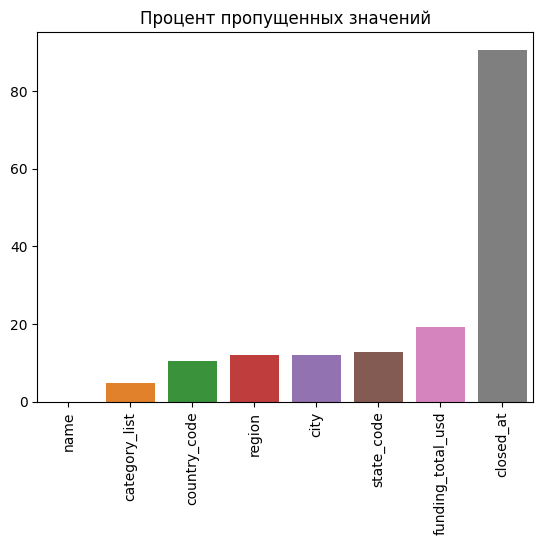

In [8]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);
plt.title('–ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π');

**–í—ã–≤–æ–¥:**   
* –í —Ç–∞–±–ª–∏—Ü–µ startups —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è 52516 —Å—Ç—Ä–æ–∫, 13 —Å—Ç–æ–ª–±—Ü–æ–≤. –ù–∞–∑–≤–∞–Ω–∏—è —Å—Ç–æ–ª–±—Ü–æ–≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –∑–º–µ–∏–Ω–æ–º—É —Å—Ç–∏–ª—é.
* –í 8 —Å—Ç–æ–ª–±—Ü–∞—Ö –µ—Å—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è.
* –î–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤ (name, category_list, country_code, state_code, region, city) –≤–≤–∏–¥—É –Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∑–∞–≥–ª—É—à–∫—É.
* –î–ª—è —á–∏—Å–ª–æ–≤–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞ funding_total_usd (—Å—É–º–º–∞ –ø—Ä–∏–≤–ª–µ—á–µ–Ω–Ω—ã—Ö –∏–Ω–≤–µ—Å—Ç–∏—Ü–∏–π) –±—É–¥–µ—Ç –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –Ω–µ–∫–æ—Ç–æ—Ä—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º, —á–µ–º –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ –±—É–¥–µ—Ç –≤—ã–±—Ä–∞–Ω–æ –ø—Ä–∏ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–∏ –¥–∞–Ω–Ω—ã—Ö.
* –°—Ç–æ–ª–±—Ü—ã founded_at, first_funding_at, last_funding_at, closed_at –ø—Ä–∏–≤–µ–¥–µ–º –∫ —Ñ–æ—Ä–º–∞—Ç—É —Å –¥–∞—Ç–æ–π.
* –°—Ç–æ–ª–±–µ—Ü cloased_at —Å–æ–¥–µ—Ä–∂–∏—Ç –ø—Ä–æ–ø—É—Å–∫–∏ —Ç–æ–ª—å–∫–æ –¥–ª—è –¥–µ–π—Å—Ç–≤—É—é—â–∏—Ö —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤, –ø–æ—ç—Ç–æ–º—É –¥–∞–Ω–Ω—ã–µ –º–æ–∂–Ω–æ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–∏—Ç—å, –∑–∞–ø–æ–ª–Ω–∏–≤ –¥–∞—Ç–æ–π –≤—ã–≥—Ä—É–∑–∫–∏ –¥–∞–Ω–Ω—ã—Ö (–ø–æ—Å–ª–µ–¥–Ω—è—è –¥–∞—Ç–∞ –ø–æ —Å—Ç–æ–ª–±—Ü—É).   
* –í–µ—Å –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ 5.2+ –ú–±.

#### –î–∞—Ç–∞—Ñ—Ä–µ–π–º "kaggle_test"

**–í—ã–≤–µ–¥–µ–º –ø–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ—á–µ–∫ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ `kaggle_test` –∏ –æ–±—â—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –Ω–µ–º.**

In [9]:
kaggle_test.head()

name                   category_list  funding_total_usd  \
0              Crystalsol                Clean Technology          2819200.0   
1        JBI Fish & Wings                     Hospitality                NaN   
2                COINPLUS                         Finance           428257.0   
3  Imagine Communications  Software|Video|Video Streaming         34700000.0   
4                   DNA13                        Software          4530000.0   

  country_code state_code            region              city  funding_rounds  \
0          NIC         17               NaN               NaN               1   
1          USA         TN        TN - Other          Humboldt               1   
2          LUX          3  Esch-sur-alzette  Esch-sur-alzette               2   
3          USA         CA         San Diego         San Diego               4   
4          CAN         ON            Ottawa            Ottawa               1   

  first_funding_at last_funding_at  lifetime  
0       2009-07-01      2009-07-01      3501  
1       2010-07-28      2010-07-28      2717  
2       2014-05-15      2014-09-18      1295  
3       2005-01-01      2010-04-20      4748  
4       2007-05-08      2007-05-08      6209

In [10]:
kaggle_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      12534 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       11743 non-null  object 
 4   state_code         11430 non-null  object 
 5   region             11536 non-null  object 
 6   city               11538 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   first_funding_at   13125 non-null  object 
 9   last_funding_at    13125 non-null  object 
 10  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB


In [11]:
percent_nan = percent_missing(kaggle_test)
percent_nan

6 —Å—Ç–æ–ª–±—Ü–æ–≤ –∏–º–µ—é—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
–ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º


category_list         4.50
country_code         10.53
city                 12.09
region               12.11
state_code           12.91
funding_total_usd    19.64
dtype: float64

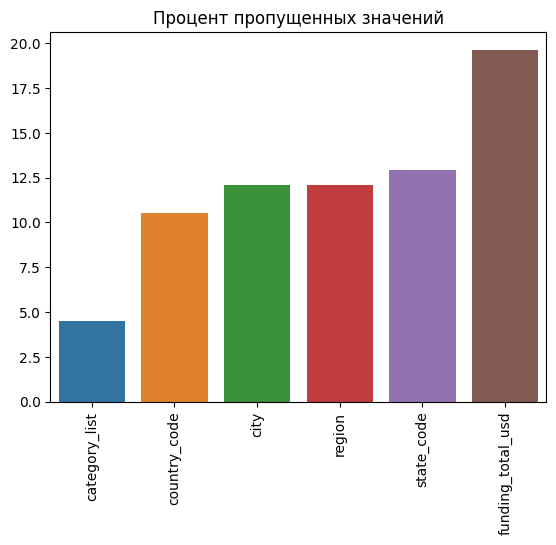

In [12]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);
plt.title('–ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π');

**–í—ã–≤–æ–¥:**   
* –í —Ç–∞–±–ª–∏—Ü–µ kaggle_test —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è  13125 —Å—Ç—Ä–æ–∫, 11 —Å—Ç–æ–ª–±—Ü–æ–≤.  –ù–∞–∑–≤–∞–Ω–∏—è —Å—Ç–æ–ª–±—Ü–æ–≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –∑–º–µ–∏–Ω–æ–º—É —Å—Ç–∏–ª—é.
* –í 6 —Å—Ç–æ–ª–±—Ü–∞—Ö –µ—Å—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è.
* –î–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤ (category_list, country_code, state_code, region, city) –≤–≤–∏–¥—É –Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∑–∞–≥–ª—É—à–∫—É, —Ç–∞–∫—É—é –∂–µ, –∫–∞–∫ –¥–ª—è –¥–∞–Ω–Ω—ã—Ö —Ç–∞–±–ª–∏—Ü—ã startups.
* –î–ª—è —á–∏—Å–ª–æ–≤–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞ funding_total_usd (—Å—É–º–º–∞ –ø—Ä–∏–≤–ª–µ—á–µ–Ω–Ω—ã—Ö –∏–Ω–≤–µ—Å—Ç–∏—Ü–∏–π) –±—É–¥–µ—Ç –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –Ω–µ–∫–æ—Ç–æ—Ä—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º, –ø–æ –∞–Ω–∞–ª–æ–≥–∏–∏ —Å —Ç–∞–±–ª–∏—Ü–µ–π startups.
* –°—Ç–æ–ª–±—Ü—ã founded_at, first_funding_at, last_funding_at, closed_at –ø—Ä–∏–≤–µ–¥–µ–º –∫ —Ñ–æ—Ä–º–∞—Ç—É —Å –¥–∞—Ç–æ–π.
* –°—Ç–æ–ª–±—Ü—ã founded_at, closed_at –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ kggle_test. –í–º–µ—Å—Ç–æ –Ω–∏—Ö –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç —Å—Ç–æ–ª–±–µ—Ü lifetime (—Å—Ä–æ–∫ –∂–∏–∑–Ω–∏ –ø—Ä–æ–µ–∫—Ç–∞ –≤ –¥–Ω—è—Ö).
* –û—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç —Å—Ç–æ–ª–±–µ—Ü status, —Ç–∞–∫ –∫–∞–∫ —ç—Ç–æ —Ç–µ—Å—Ç–æ–≤—ã–π —Ñ–∏–Ω–∞–ª—å–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç.   
* –í–µ—Å –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ 1.1+ –ú–±.

–î–∞—Ç–∞—Ñ—Ä–µ–π–º—ã –¥–æ–ª–∂–Ω—ã —Å–æ–¥–µ—Ä–∂–∞—Ç—å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã –ø—Ä–∏ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–∏, –ø–æ—ç—Ç–æ–º—É –¥–ª—è –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ **startups** –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Å–æ–∑–¥–∞—Ç—å —Å—Ç–æ–ª–±–µ—Ü **lifetime**.

**–û–±—Ä–∞—Ç–∏–º –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤–æ –≤ –æ–±–æ–∏—Ö –¥–∞—Ç–∞—Å–µ—Ç–∞—Ö. –ü–æ—ç—Ç–æ–º—É –∏—Ö –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –Ω–∞–¥–µ–µ–º—Å—è —Å–∏–ª—å–Ω–æ –Ω–µ –∏—Å–∫–∞–∑–∏—Ç –¥–∞–Ω–Ω—ã–µ.**

#### –ü–µ—Ä–≤–æ–Ω–∞—á–∞–ª—å–Ω–æ–µ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –¥–∞–Ω–Ω—ã—Ö –≤ –¥–∞—Ç–∞—Å–µ—Ç–∞—Ö startups –∏ kaggle_test

In [13]:
startups.describe()

funding_total_usd  funding_rounds
count       4.244700e+04    52516.000000
mean        1.824748e+07        1.740670
std         1.871173e+08        1.374522
min         1.000000e+00        1.000000
25%         3.360275e+05        1.000000
50%         2.000000e+06        1.000000
75%         1.000000e+07        2.000000
max         3.007950e+10       19.000000

In [14]:
kaggle_test.describe()

funding_total_usd  funding_rounds      lifetime
count       1.054700e+04    13125.000000  13125.000000
mean        1.654910e+07        1.714438   3097.609524
std         9.217283e+07        1.318800   2128.356554
min         1.000000e+00        1.000000     52.000000
25%         3.200000e+05        1.000000   1726.000000
50%         2.000000e+06        1.000000   2526.000000
75%         1.000000e+07        2.000000   3866.000000
max         4.715000e+09       15.000000  17167.000000

**–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –≤ —á–∏—Å–ª–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö.**

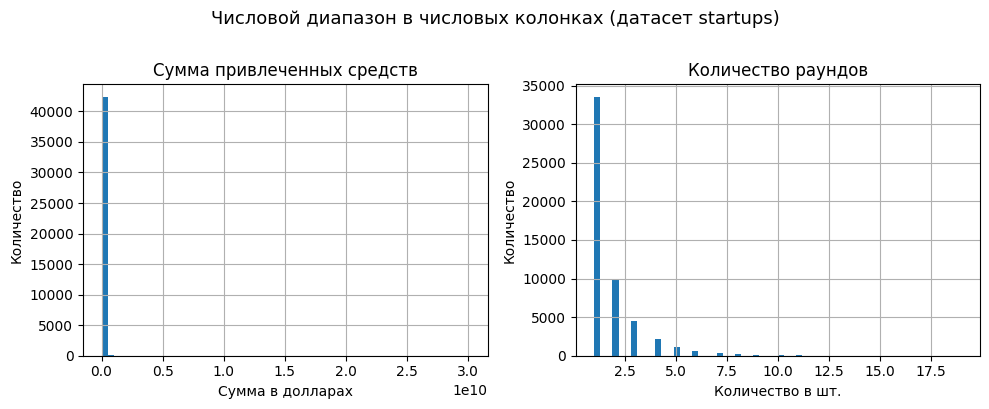

In [15]:
axes = startups.hist(figsize=(10,4), bins=60);
# –û–±—â–∏–π –∑–∞–≥–æ–ª–æ–≤–æ–∫ –¥–ª—è –≤—Å–µ—Ö –∫–æ–ª–æ–Ω–æ–∫
plt.suptitle('–ß–∏—Å–ª–æ–≤–æ–π –¥–∏–∞–ø–∞–∑–æ–Ω –≤ —á–∏—Å–ª–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö (–¥–∞—Ç–∞—Å–µ—Ç startups)', fontsize=13, y=1.01);
# —Å–ø–∏—Å–∫–∏ –¥–ª—è –∑–∞–≥–æ–ª–æ–≤–∫–æ–≤ –∏ –ø–æ–¥–ø–∏—Å–µ–π –æ—Å–µ–π
titles = ['–°—É–º–º–∞ –ø—Ä–∏–≤–ª–µ—á–µ–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤','–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞—É–Ω–¥–æ–≤']
xlabel = ['–°—É–º–º–∞ –≤ –¥–æ–ª–ª–∞—Ä–∞—Ö','–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤ —à—Ç.']
ylabel = ['–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ']*2
for i, ax in enumerate(axes.flat):
    ax.set_title(titles[i]);
    ax.set_xlabel(xlabel[i]);
    ax.set_ylabel(ylabel[i]);

# —á—Ç–æ–±—ã –æ—Å–∏ –Ω–µ –ø–µ—Ä–µ—Å–µ–∫–∞–ª–∏—Å—å —Å —Å–æ—Å–µ–¥–Ω–∏–º–∏ –≥—Ä–∞—Ñ–∏–∫–∞–º–∏
plt.tight_layout();

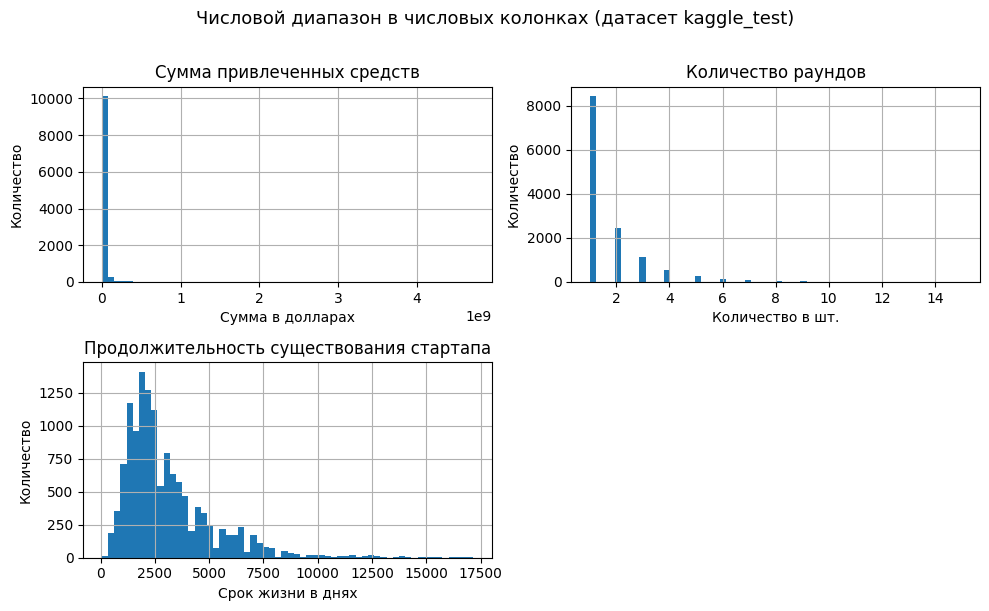

In [16]:
axes = kaggle_test.hist(figsize=(10,6), bins=60);
# –û–±—â–∏–π –∑–∞–≥–æ–ª–æ–≤–æ–∫ –¥–ª—è –≤—Å–µ—Ö –∫–æ–ª–æ–Ω–æ–∫
plt.suptitle('–ß–∏—Å–ª–æ–≤–æ–π –¥–∏–∞–ø–∞–∑–æ–Ω –≤ —á–∏—Å–ª–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö (–¥–∞—Ç–∞—Å–µ—Ç kaggle_test)', fontsize=13, y=1.01);
# —Å–ø–∏—Å–∫–∏ –¥–ª—è –∑–∞–≥–æ–ª–æ–≤–∫–æ–≤ –∏ –ø–æ–¥–ø–∏—Å–µ–π –æ—Å–µ–π
titles = ['–°—É–º–º–∞ –ø—Ä–∏–≤–ª–µ—á–µ–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤','–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞—É–Ω–¥–æ–≤', '–ü—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å—É—â–µ—Å—Ç–≤–æ–≤–∞–Ω–∏—è —Å—Ç–∞—Ä—Ç–∞–ø–∞', '']
xlabel = ['–°—É–º–º–∞ –≤ –¥–æ–ª–ª–∞—Ä–∞—Ö','–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤ —à—Ç.', '–°—Ä–æ–∫ –∂–∏–∑–Ω–∏ –≤ –¥–Ω—è—Ö', '']
ylabel = ['–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ']*4
for i, ax in enumerate(axes.flat):
    ax.set_title(titles[i]);
    ax.set_xlabel(xlabel[i]);
    ax.set_ylabel(ylabel[i]);

# —á—Ç–æ–±—ã –æ—Å–∏ –Ω–µ –ø–µ—Ä–µ—Å–µ–∫–∞–ª–∏—Å—å —Å —Å–æ—Å–µ–¥–Ω–∏–º–∏ –≥—Ä–∞—Ñ–∏–∫–∞–º–∏
plt.tight_layout();

–í–∏–¥–∏–º, —á—Ç–æ –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¥–ª—è –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ –ø–æ —Å—É–º–º–µ –ø—Ä–∏–≤–ª–µ—á–µ–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤ –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Ä–∞—É–Ω–¥–æ–≤ –Ω–µ —Å–∏–ª—å–Ω–æ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è, –∑–∞ –∏—Å–∫–ª—é—á–µ–Ω–∏–µ–º –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è —Å—É–º–º—ã –ø—Ä–∏–≤–ª–µ—á–µ–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤ –∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π —Å—É–º–º—ã –ø—Ä–∏–≤–ª–µ—á–µ–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤. –¢–∞–∫ –∫–∞–∫ –º–µ–¥–∏–∞–Ω–∞ –ø—Ä–∏–≤–ª–µ—á–µ–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤ –æ–¥–∏–Ω–∞–∫–æ–≤–∞ –¥–ª—è –æ–±–æ–∏—Ö –¥–∞—Ç–∞—Å–µ—Ç–æ–≤, —Ç–æ –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ  —Ç–∞–∫–æ–µ –æ—Ç–ª–∏—á–∏–µ –≤ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã—Ö –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è—Ö —Å–≤—è–∑–∞–Ω–æ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏ –≤ –¥–∞–Ω–Ω—ã—Ö –û–± —ç—Ç–æ–º —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞ –ø—Ä–∏–≤–ª–µ—á–µ–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤: –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ startups –æ–Ω–∞ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –≤—ã—à–µ.

**–ù–µ–æ–±—Ö–æ–¥–∏–º–æ —É—á–∏—Ç—ã–≤–∞—Ç—å —ç—Ç–æ –ø—Ä–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–∏ –º–æ–¥–µ–ª–µ–π. –¢–∞–∫ –∫–∞–∫ —ç—Ç–æ –æ–±—Å—Ç–æ—è—Ç–µ–ª—å—Å—Ç–≤–æ –º–æ–∂–µ—Ç –ø–æ–≤–ª–∏—è—Ç—å –Ω–∞ –∏—Ö —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å.**

## –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

### –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö

#### –î–∞—Ç–∞—Å–µ—Ç startups

In [17]:
percent_missing(startups)

8 —Å—Ç–æ–ª–±—Ü–æ–≤ –∏–º–µ—é—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
–ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º


name                  0.00
category_list         4.69
country_code         10.48
region               12.11
city                 12.11
state_code           12.88
funding_total_usd    19.17
closed_at            90.64
dtype: float64

**–ó–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ `startups`.**

–î–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤ (name, category_list, country_code, state_code, region, city) –≤–≤–∏–¥—É –Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∑–∞–≥–ª—É—à–∫—É "None".

In [18]:
startups[['name', 'category_list', 'country_code', 'region', 'city', 'state_code']] = \
startups[['name','category_list', 'country_code', 'region', 'city', 'state_code']].fillna('Unknown')

In [19]:
startups[['name','category_list', 'country_code', 'region', 'city', 'state_code']].isna().sum()

name             0
category_list    0
country_code     0
region           0
city             0
state_code       0
dtype: int64

**–ó–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –∫–æ–ª–æ–Ω–∫–µ `closed_at`. –í–º–µ—Å—Ç–æ NaN —É–∫–∞–∂–µ–º –¥–∞—Ç—É –≤—ã–≥—Ä—É–∑–∫–∏ '2018-01-01'. –ò–∑–º–µ–Ω–µ–Ω–∏–µ —Ç–∏–ø–∞ –¥–∞–Ω–Ω—ã—Ö –≤—ã–ø–æ–ª–Ω–∏–º –ø–æ–∑–∂–µ.**

In [20]:
startups['closed_at'] = startups['closed_at'].fillna('2018-01-01')

In [21]:
startups['closed_at'].fillna('2018-01-01').dtype

dtype('O')

#### –î–∞—Ç–∞—Å–µ—Ç kaggle_test

**–ó–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ `kaggle_test`.**

In [22]:
percent_missing(kaggle_test)

6 —Å—Ç–æ–ª–±—Ü–æ–≤ –∏–º–µ—é—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
–ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º


category_list         4.50
country_code         10.53
city                 12.09
region               12.11
state_code           12.91
funding_total_usd    19.64
dtype: float64

In [23]:
kaggle_test[['category_list', 'country_code', 'region', 'city', 'state_code']] = \
kaggle_test[['category_list', 'country_code', 'region', 'city', 'state_code']].fillna('Unknown')

In [24]:
kaggle_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      13125 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       13125 non-null  object 
 4   state_code         13125 non-null  object 
 5   region             13125 non-null  object 
 6   city               13125 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   first_funding_at   13125 non-null  object 
 9   last_funding_at    13125 non-null  object 
 10  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB


### –ò–∑–º–µ–Ω–µ–Ω–∏–µ —Ç–∏–ø–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –∫–æ–ª–æ–Ω–æ–∫ —Å –¥–∞—Ç–∞–º–∏

#### –î–∞—Ç–∞—Å–µ—Ç startups

In [25]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52516 non-null  object 
 1   category_list      52516 non-null  object 
 2   funding_total_usd  42447 non-null  float64
 3   status             52516 non-null  object 
 4   country_code       52516 non-null  object 
 5   state_code         52516 non-null  object 
 6   region             52516 non-null  object 
 7   city               52516 non-null  object 
 8   funding_rounds     52516 non-null  int64  
 9   founded_at         52516 non-null  object 
 10  first_funding_at   52516 non-null  object 
 11  last_funding_at    52516 non-null  object 
 12  closed_at          52516 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ MB


**–ò–∑–º–µ–Ω–µ–Ω–∏–º —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö `founded_at`, `first_funding_at`, `last_funding_at`, `closed_at`.**
–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ñ–æ—Ä–º–∞—Ç –¥–∞—Ç—ã –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö.

In [26]:
startups[['founded_at', 'first_funding_at', 'last_funding_at', 'closed_at']].sample(5)

founded_at first_funding_at last_funding_at   closed_at
35516  1992-01-01       2005-12-19      2005-12-19  2018-01-01
12646  2013-01-01       2013-03-22      2013-03-22  2018-01-01
13633  2004-01-01       2005-05-16      2005-05-16  2018-01-01
40046  2010-05-14       2012-12-26      2012-12-26  2018-01-01
42292  2015-02-20       2015-06-01      2015-06-01  2018-01-01

In [27]:
# –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤ —Ñ–æ—Ä–º–∞—Ç datetime
startups['founded_at'] = pd.to_datetime(startups['founded_at'], format='%Y-%m-%d')
startups['first_funding_at'] = pd.to_datetime(startups['first_funding_at'], format='%Y-%m-%d')
startups['last_funding_at'] = pd.to_datetime(startups['last_funding_at'], format='%Y-%m-%d')
startups['closed_at'] = pd.to_datetime(startups['closed_at'], format='%Y-%m-%d')

In [28]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52516 non-null  object        
 1   category_list      52516 non-null  object        
 2   funding_total_usd  42447 non-null  float64       
 3   status             52516 non-null  object        
 4   country_code       52516 non-null  object        
 5   state_code         52516 non-null  object        
 6   region             52516 non-null  object        
 7   city               52516 non-null  object        
 8   funding_rounds     52516 non-null  int64         
 9   founded_at         52516 non-null  datetime64[ns]
 10  first_funding_at   52516 non-null  datetime64[ns]
 11  last_funding_at    52516 non-null  datetime64[ns]
 12  closed_at          52516 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(7)
memory 

–ö–æ–ª–æ–Ω–∫–∏ `founded_at`, `first_funding_at`, `last_funding_at`, `closed_at` –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω—ã –∫ —Ñ–æ—Ä–º–∞—Ç—É `datetime`.

#### –î–∞—Ç–∞—Å–µ—Ç kaggle_test

**–ê–Ω–∞–ª–æ–≥–∏—á–Ω—ã–µ –∏–∑–º–µ–Ω–µ–Ω–∏—è –ø—Ä–æ–∏–∑–≤–µ–¥–µ–º –¥–ª—è –¥–∞—Ç–∞—Å–µ—Ç–∞ kaggle_test.**

In [29]:
kaggle_test['first_funding_at'] = pd.to_datetime(kaggle_test['first_funding_at'], format='%Y-%m-%d')
kaggle_test['last_funding_at'] = pd.to_datetime(kaggle_test['last_funding_at'], format='%Y-%m-%d')

In [30]:
kaggle_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               13125 non-null  object        
 1   category_list      13125 non-null  object        
 2   funding_total_usd  10547 non-null  float64       
 3   country_code       13125 non-null  object        
 4   state_code         13125 non-null  object        
 5   region             13125 non-null  object        
 6   city               13125 non-null  object        
 7   funding_rounds     13125 non-null  int64         
 8   first_funding_at   13125 non-null  datetime64[ns]
 9   last_funding_at    13125 non-null  datetime64[ns]
 10  lifetime           13125 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 1.1+ MB


–ö–æ–ª–æ–Ω–∫–∏ `first_funding_at`, `last_funding_at` –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω—ã –∫ —Ñ–æ—Ä–º–∞—Ç—É `datetime`.

### –£–º–µ–Ω—å—à–µ–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö

#### –î–∞—Ç–∞—Å–µ—Ç startups

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤.

In [31]:
rez = []
    #–¥–æ–±–∞–≤–ª—è–µ–º –≤ —Å–ø–∏—Å–æ–∫ –∫–æ—Ä—Ç–µ–∂ –∏–∑ –Ω–∞–∑–≤–∞–Ω–∏–π –≤—Å–µ—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤ –∏ –∏—Ö —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
for col in startups.select_dtypes(include='object').columns.tolist():
    rez.append((col, startups[col].nunique()))

In [32]:
print(rez)

[('name', 52516), ('category_list', 22106), ('status', 2), ('country_code', 135), ('state_code', 301), ('region', 1037), ('city', 4478)]


**–í–∏–¥–∏–º –æ–≥—Ä–æ–º–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö. –≠—Ç–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —É—á–µ—Å—Ç—å –ø—Ä–∏ –≤—ã–±–æ—Ä–µ –º–æ–¥–µ–ª–∏ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è. –í–µ—Ä–æ—è—Ç–Ω–æ, –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –ª—É—à–µ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –¥–µ—Ä–µ–≤—è–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏ –∏ –∫–æ–¥–∏—Ä–æ–≤–∞—Ç—å –Ω–æ–º–∏–Ω–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–µ —á–µ—Ä–µ–∑ OneHotEncoder, –∫–∞–∫ —Ç—Ä–µ–±—É–µ—Ç—Å—è, –∞ OrdinalEncoder, —á—Ç–æ–±—ã –Ω–µ –ø–ª–æ–¥–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –û–¥–Ω–∞–∫–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –±—É–¥—É—Ç —É–ø–æ—Ä—è–¥–æ—á–µ–Ω—ã. –ò —ç—Ç–æ –º–æ–∂–µ—Ç –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ –ø–æ–≤–ª–∏—è—Ç—å –Ω–∞ –ø—Ä–æ–≥–Ω–æ–∑ –º–æ–¥–µ–ª–∏, –Ω–æ –¥–ª—è –¥–µ—Ä–µ–≤—è–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π —ç—Ç–æ –Ω–µ –∏–º–µ–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è.**

–ü–æ—Ä–æ–±—É–µ–º —É–º–µ–Ω—å—à–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π.

In [33]:
startups.head(5)

name                          category_list  \
0               Lunchgate        Online Reservations|Restaurants   
1                 EarLens  Manufacturing|Medical|Medical Devices   
2  Reviva Pharmaceuticals                          Biotechnology   
3    Sancilio and Company                            Health Care   
4     WireTough Cylinders                          Manufacturing   

   funding_total_usd     status country_code state_code       region  \
0           828626.0  operating          CHE         25       Zurich   
1         42935019.0  operating          USA         CA  SF Bay Area   
2         35456381.0  operating          USA         CA  SF Bay Area   
3         22250000.0  operating      Unknown    Unknown      Unknown   
4                NaN  operating          USA         VA   VA - Other   

           city  funding_rounds founded_at first_funding_at last_funding_at  \
0        Z√ºrich               2 2009-10-17       2011-05-01      2014-12-01   
1  Redwood City               4 2005-01-01       2010-05-04      2014-02-25   
2      San Jose               3 2006-01-01       2012-08-20      2014-07-02   
3       Unknown               3 2004-01-01       2011-09-01      2014-07-18   
4       Bristol               1 2010-05-12       2012-02-01      2012-02-01   

   closed_at  
0 2018-01-01  
1 2018-01-01  
2 2018-01-01  
3 2018-01-01  
4 2018-01-01

**–î–æ–±–∞–≤–∏–º —Å—Ç–æ–ª–±–µ—Ü `category_list_new` —Å –æ—Å–Ω–æ–≤–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–µ–π –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏.**

In [34]:
startups['category_list_new'] = startups['category_list'].str.split('|').str[0] 

In [35]:
startups[['category_list', 'category_list_new']].head(3)

category_list    category_list_new
0        Online Reservations|Restaurants  Online Reservations
1  Manufacturing|Medical|Medical Devices        Manufacturing
2                          Biotechnology        Biotechnology

In [36]:
print(f'–î–æ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –≤ –∫–æ–ª–æ–Ω–∫–µ category_list - {startups["category_list"].nunique()} —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π.')
print(f'–ü–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –≤ –∫–æ–ª–æ–Ω–∫–µ category_list_new - {startups["category_list_new"].nunique()} —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π.')

–î–æ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –≤ –∫–æ–ª–æ–Ω–∫–µ category_list - 22106 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π.
–ü–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –≤ –∫–æ–ª–æ–Ω–∫–µ category_list_new - 708 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π.


**–ü–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞ `category_list` –∑–Ω–∞—á–µ–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π —Å–Ω–∏–∂–µ–Ω–æ —Å 22105 –¥–æ 707. –°–æ–∑–¥–∞–Ω –Ω–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü —Å –æ—Å–Ω–æ–≤–Ω—ã–º–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ `category_list_new`. –≠—Ç–æ –±–ª–∞–≥–æ—Ç–≤–æ—Ä–Ω–æ –ø–æ–≤–ª–∏—è–µ—Ç –Ω–∞ –º–æ–¥–µ–ª–∏ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è.**

#### –î–∞—Ç–∞—Å–µ—Ç kaggle_test

In [37]:
kaggle_test['category_list_new'] = kaggle_test['category_list'].str.split('|').str[0] 

In [38]:
kaggle_test[['category_list', 'category_list_new']].nunique()

category_list        6207
category_list_new     560
dtype: int64

### –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –æ–±—É—á–∞—é—â–µ–≥–æ –∏ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ –∫ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫–æ–≤–æ–º—É –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤—É

**–î–æ–±–∞–≤–∏–º —Å—Ç–æ–ª–±–µ—Ü "lifetime" –≤ startups.**

In [39]:
startups['lifetime'] = startups['closed_at']-startups['founded_at']

In [40]:
startups['lifetime'] = startups['lifetime'].astype(str).str.split(' ').str[0].astype(int)
startups['lifetime'].sample()

38065    3228
Name: lifetime, dtype: int32

–¢–µ–ø–µ—Ä—å –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å —Å—Ç–æ–ª–±—Ü—ã 'closed_at' –∏ 'founded_at' –∏–∑ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ 'startups'. 

In [41]:
startups = startups.drop(['closed_at', 'founded_at'], axis=1)

**–î–ª—è —É–¥–æ–±—Å—Ç–≤–∞ –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Ü–µ–ª–µ–≤—É—é –∫–æ–ª–æ–Ω–∫—É —Å–∞–º–∏ –≤ 0 –∏ 1, —Ö–æ—Ç—è —ç—Ç–æ –º–æ–∂–Ω–æ –∏ –Ω–µ –¥–µ–ª–∞—Ç—å.**

In [42]:
startups['status_new'] = startups['status'].map({'operating': 0, 'closed':1})    
startups.sample(1)

name category_list  funding_total_usd     status country_code  \
27613  Greencart    E-Commerce          1500000.0  operating          IND   

      state_code  region    city  funding_rounds first_funding_at  \
27613         16  Mumbai  Mumbai               1       2014-03-28   

      last_funding_at category_list_new  lifetime  status_new  
27613      2014-03-28        E-Commerce      1826           0

In [43]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52516 non-null  object        
 1   category_list      52516 non-null  object        
 2   funding_total_usd  42447 non-null  float64       
 3   status             52516 non-null  object        
 4   country_code       52516 non-null  object        
 5   state_code         52516 non-null  object        
 6   region             52516 non-null  object        
 7   city               52516 non-null  object        
 8   funding_rounds     52516 non-null  int64         
 9   first_funding_at   52516 non-null  datetime64[ns]
 10  last_funding_at    52516 non-null  datetime64[ns]
 11  category_list_new  52516 non-null  object        
 12  lifetime           52516 non-null  int32         
 13  status_new         52516 non-null  int64         
dtypes: dat

In [44]:
kaggle_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               13125 non-null  object        
 1   category_list      13125 non-null  object        
 2   funding_total_usd  10547 non-null  float64       
 3   country_code       13125 non-null  object        
 4   state_code         13125 non-null  object        
 5   region             13125 non-null  object        
 6   city               13125 non-null  object        
 7   funding_rounds     13125 non-null  int64         
 8   first_funding_at   13125 non-null  datetime64[ns]
 9   last_funding_at    13125 non-null  datetime64[ns]
 10  lifetime           13125 non-null  int64         
 11  category_list_new  13125 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(7)
memory usage: 1.2+ MB


**–¢–µ–ø–µ—Ä—å startups –∏ kaggle_test —Å–æ–¥–µ—Ä–∂–∞—Ç –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã –∑–∞ –∏—Å–∫–ª—é—á–µ–Ω–∏–µ–º —Ü–µ–ª–µ–≤–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞ (status –ª–∏–±–æ status_new).**

**–ü—Ä–æ–≤–µ—Ä–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ —è–≤–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã.**

In [45]:
kaggle_test.duplicated().sum()

0

In [46]:
startups.duplicated().sum()

0

**–Ø–≤–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω—ã.***

### –ü–æ–¥–≥–æ–Ω–∫–∞ —Å—Ç—Ä—É–∫—Ç—É—Ä—ã —á–∏—Å–ª–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö startups –∫ kaggle_test

In [47]:
startups.describe()

funding_total_usd  funding_rounds      lifetime    status_new
count       4.244700e+04    52516.000000  52516.000000  52516.000000
mean        1.824748e+07        1.740670   3140.828129      0.093629
std         1.871173e+08        1.374522   2147.821070      0.291314
min         1.000000e+00        1.000000     19.000000      0.000000
25%         3.360275e+05        1.000000   1739.000000      0.000000
50%         2.000000e+06        1.000000   2557.000000      0.000000
75%         1.000000e+07        2.000000   4018.000000      0.000000
max         3.007950e+10       19.000000  17378.000000      1.000000

In [48]:
kaggle_test.describe()

funding_total_usd  funding_rounds      lifetime
count       1.054700e+04    13125.000000  13125.000000
mean        1.654910e+07        1.714438   3097.609524
std         9.217283e+07        1.318800   2128.356554
min         1.000000e+00        1.000000     52.000000
25%         3.200000e+05        1.000000   1726.000000
50%         2.000000e+06        1.000000   2526.000000
75%         1.000000e+07        2.000000   3866.000000
max         4.715000e+09       15.000000  17167.000000

–í –¥–∞—Ç–∞—Å–µ—Ç–∞—Ö startups –∏ kaggle_test –µ—Å—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –æ—Ç–ª–∏—á–∏—è –≤ —Å—Ç—Ä—É–∫—Ç—É—Ä–µ —á–∏—Å–ª–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö: –≤ —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö –∏  —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã—Ö –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è—Ö —Å—É–º–º—ã –ø—Ä–∏–≤–ª–µ—á–µ–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤, –∏ –∏—Ö –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö.  

In [49]:
# —Å–∫–æ–ª—å–∫–æ —Å—Ç—Ä–æ–∫ –ø—Ä–µ–≤—ã—à–∞–µ—Ç –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É—é —Å—É–º–º—É —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è kaggle_test
(startups['funding_total_usd'] > 4.715000e+09).sum() 

9

**–ü–æ—Å–º–æ—Ç—Ä–∏–º, –µ—Å—Ç—å –ª–∏ —Å—Ä–µ–¥–∏ —ç—Ç–∏—Ö —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤, –∑–∞–∫—Ä—ã—Ç—ã–µ.**

In [50]:
startups.query('status_new==1 and funding_total_usd >= 4.715000e+09').shape[0]

0

–í –¥–∞—Ç–∞—Å–µ—Ç–µ kaggle_test –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞ –ø—Ä–∏–≤–ª–µ—á–µ–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤ 4.715000e+09 –¥–æ–ª–ª–∞—Ä–æ–≤, –∞ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ startups - 3.007950e+10 –¥–æ–ª–ª–∞—Ä–æ–≤. –ü—Ä–∏ —ç—Ç–æ–º –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ startups 9 –∫–æ–º–ø–∞–Ω–∏–π-—Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ (–¥–µ–π—Å—Ç–≤—É—é—â–∏—Ö) –∏–º–µ—é—Ç —Å—É–º–º—É –ø—Ä–∏–≤–ª–µ—á–µ–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤ –±–æ–ª–µ–µ 4.715000e+09 –¥–æ–ª–ª–∞—Ä–æ–≤.   
–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –∏ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–∏ —Å—É–º–º—ã –ø—Ä–∏–≤–ª–µ—á–µ–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤, –µ—Å–ª–∏ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å —Å—Ç–∞—Ä—Ç–∞–ø—ã —Å —Å—É–º–º–æ–π —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è –Ω–µ –±–æ–ª–µ–µ 4.715000e+09 –¥–æ–ª–ª–∞—Ä–æ–≤. 

In [51]:
startups[startups['funding_total_usd']<=4.715000e+09].drop(columns='status_new').describe()

funding_total_usd  funding_rounds      lifetime
count       4.243800e+04    42438.000000  42438.000000
mean        1.635584e+07        1.888826   3212.315990
std         7.468336e+07        1.474093   2136.003422
min         1.000000e+00        1.000000     19.000000
25%         3.360000e+05        1.000000   1804.250000
50%         2.000000e+06        1.000000   2557.000000
75%         1.000000e+07        2.000000   4018.000000
max         4.630000e+09       19.000000  17167.000000

In [52]:
kaggle_test.describe()

funding_total_usd  funding_rounds      lifetime
count       1.054700e+04    13125.000000  13125.000000
mean        1.654910e+07        1.714438   3097.609524
std         9.217283e+07        1.318800   2128.356554
min         1.000000e+00        1.000000     52.000000
25%         3.200000e+05        1.000000   1726.000000
50%         2.000000e+06        1.000000   2526.000000
75%         1.000000e+07        2.000000   3866.000000
max         4.715000e+09       15.000000  17167.000000

**–°—Ç—Ä—É–∫—Ç—É—Ä—ã –¥–∞–Ω–Ω—ã—Ö —Å—Ç–∞–ª–∏ –±–æ–ª–µ–µ –ø–æ—Ö–æ–∂–∏. –ü–æ–ø—Ä–æ–±—É–µ–º –≤—ã—Ä–æ–≤–Ω–∏—Ç—å —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –µ—â–µ –ª—É—á—à–µ.**

In [53]:
startups[(startups['funding_total_usd']<=4.815000e+09) & (startups['lifetime']>=52)].\
    drop(columns='status_new').describe()

funding_total_usd  funding_rounds      lifetime
count       4.243900e+04    42439.000000  42439.000000
mean        1.658065e+07        1.888946   3212.434294
std         8.152504e+07        1.474284   2136.009447
min         1.000000e+00        1.000000     57.000000
25%         3.360000e+05        1.000000   1804.500000
50%         2.000000e+06        1.000000   2557.000000
75%         1.000000e+07        2.000000   4018.000000
max         4.812000e+09       19.000000  17167.000000

In [54]:
kaggle_test.describe()

funding_total_usd  funding_rounds      lifetime
count       1.054700e+04    13125.000000  13125.000000
mean        1.654910e+07        1.714438   3097.609524
std         9.217283e+07        1.318800   2128.356554
min         1.000000e+00        1.000000     52.000000
25%         3.200000e+05        1.000000   1726.000000
50%         2.000000e+06        1.000000   2526.000000
75%         1.000000e+07        2.000000   3866.000000
max         4.715000e+09       15.000000  17167.000000

**–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ —Å—Ç—Ä—É–∫—Ç—É—Ä–∞ —á–∏—Å–ª–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Ç–µ–ø–µ—Ä—å –æ—á–µ–Ω—å –ø–æ—Ö–æ–∂–∞.**

–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ, –µ—Å–ª–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –æ—Ç—Å–µ—á–µ–Ω–∏–µ –ø–æ —Å—É–º–º–µ —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è 4.815000e+09 –¥–æ–ª–ª–∞—Ä–æ–≤ –∏ –≤—Ä–µ–º—è –∂–∏–∑–Ω–∏ –ø—Ä–æ–µ–∫—Ç–∞ >= 52 –¥–Ω—è, —Ç–æ –¥–∞–Ω–Ω—ã–µ —Å—Ç—Ä—É–∫—Ç—É—Ä–Ω–æ —Å—Ç–∞–Ω–æ–≤—è—Ç—Å—è –±–æ–ª–µ–µ –ø–æ—Ö–æ–∂–∏. –ü–æ—ç—Ç–æ–º—É —É–¥–∞–ª–∏–º –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞ startups —Å—Ç—Ä–æ–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –¥–µ–ª–∞—é—Ç —Å—Ç—Ä—É–∫—Ç—É—Ä—É –¥–∞–Ω–Ω—ã—Ö –º–µ–Ω–µ–µ –ø–æ—Ö–æ–∂–µ–π –Ω–∞ kaggle_test.

In [55]:
startups = startups.query('funding_total_usd <= 4.815000e+09 and lifetime>52 or funding_total_usd.isnull()')

In [56]:
startups.shape

(52508, 14)

### –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ —Å—É–º–º—ã –ø—Ä–∏–≤–ª–µ—á–µ–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤

#### –î–∞—Ç–∞—Å–µ—Ç startups

–ó–∞–ø–æ–ª–Ω–∏–º –º–µ–¥–∏–∞–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ —Å—Ç–æ–ª–±—Ü–µ —Å —Å—É–º–º–æ–π —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è –ø–æ –¥–∞–Ω–Ω—ã–º, —Å–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∞–Ω–Ω—ã–º –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º —Å–æ —Å—Ç—Ä–∞–Ω–æ–π –∏ –æ—Å–Ω–æ–≤–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–µ–π –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏. –û—Å—Ç–∞—Ç–∫–∏ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –∑–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ—Å—Ç–æ –º–µ–¥–∏–∞–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º —Å—É–º–º—ã –ø—Ä–∏–≤–ª–µ—á–µ–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤.

In [57]:
#–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –ø–æ —Å—Ç—Ä–∞–Ω–µ –∏ –æ—Å–Ω–æ–≤–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏
# –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –º–µ–¥–∏–∞–Ω–æ–π –ø—Ä–æ–ø—É—Å–∫–æ–≤ —Å —Å—É–º–º–∞–º–∏ —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è
temp = pd.DataFrame(startups.groupby(['country_code', 'category_list_new'])['funding_total_usd'].agg('median'))
temp = temp.reset_index().rename(columns = {'funding_total_usd':'temp_sum'})
temp

country_code      category_list_new      temp_sum
0             ALB            Agriculture           NaN
1             ALB              Consumers  2.767441e+05
2             ARE                     3D           NaN
3             ARE            Advertising  7.000000e+05
4             ARE  Advertising Platforms           NaN
...           ...                    ...           ...
6372          ZAF                Unknown  7.441770e+05
6373          ZAF            Web Hosting  2.033961e+07
6374          ZMB            Communities  2.000000e+04
6375          ZWE                Bitcoin  3.000000e+04
6376          ZWE       Clean Technology           NaN

[6377 rows x 3 columns]

In [58]:
#–º–µ–¥–∏–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞ —Å—É–º–º—ã —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è
funding_total_usd_median = startups['funding_total_usd'].median()
funding_total_usd_median

2000000.0

In [59]:
# –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–æ–≤ startups –∏ temp –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º 'country_code', 'category_list_new'
startups = startups.merge(temp, on = ['country_code', 'category_list_new'], how = 'inner')

In [60]:
#–≤—Ä–µ–º–µ–Ω–Ω–æ–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –Ω—É–ª—è–º–∏
startups['funding_total_usd'] = startups['funding_total_usd'].fillna(0)

In [61]:
# –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ —Å—É–º–º—ã —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è
def func_total(funding_total_usd, temp_sum):
    if funding_total_usd == 0:
        total = temp_sum
    else:
        total = funding_total_usd
    return total

In [62]:
# –≤–µ–∫—Ç–æ—Ä–∏–∑—É–µ–º —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é func_total() —Å –ø–æ–º–æ—â—å—é np.vectorize()
startups['funding_total_usd'] = np.vectorize(func_total)(startups['funding_total_usd'], startups['temp_sum'])

In [63]:
# –æ—Å—Ç–∞—Ç–æ–∫ –Ω–µ–∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã—Ö –ø—Ä–æ–ø—É—Å–∫–æ–≤
startups['funding_total_usd'].isna().sum()

868

In [64]:
# –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –ø—Ä–æ–ø—É—Å–∫–æ–≤ –º–µ–¥–∏–∞–Ω.–∑–Ω–∞—á–µ–Ω–∏–µ–º —Å—É–º–º—ã —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è
startups['funding_total_usd'] = startups['funding_total_usd'].fillna(funding_total_usd_median)

In [65]:
startups['funding_total_usd'].isna().sum()

0

In [66]:
startups = startups.drop('temp_sum', axis=1) # —É–¥–∞–ª—è–µ–º –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—É—é –∫–æ–ª–æ–Ω–∫—É

In [67]:
startups.isna().sum() # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤

name                 0
category_list        0
funding_total_usd    0
status               0
country_code         0
state_code           0
region               0
city                 0
funding_rounds       0
first_funding_at     0
last_funding_at      0
category_list_new    0
lifetime             0
status_new           0
dtype: int64

**–ü—Ä–æ–ø—É—Å–∫–∏ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ `startups` –æ–±—Ä–∞–±–æ—Ç–∞–Ω—ã.**

**–ü—Ä–æ–≤–µ—Ä–∏–º —è–≤–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã.**

In [68]:
 # –ø–æ–¥—Å—á—ë—Ç —è–≤–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤
startups.duplicated().sum()

0

#### –î–∞—Ç–∞—Å–µ—Ç kaggle_test

In [69]:
kaggle_test.isna().sum() # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤

name                    0
category_list           0
funding_total_usd    2578
country_code            0
state_code              0
region                  0
city                    0
funding_rounds          0
first_funding_at        0
last_funding_at         0
lifetime                0
category_list_new       0
dtype: int64

In [70]:
# –º–µ–¥–∏–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Å—É–º–º—ã —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è
funding_total_usd_kaggle_test_median = kaggle_test['funding_total_usd'].median()
funding_total_usd_kaggle_test_median 

2000000.0

In [71]:
#–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –ø–æ —Å—Ç—Ä–∞–Ω–µ –∏ –æ—Å–Ω–æ–≤–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏
# –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –º–µ–¥–∏–∞–Ω–æ–π –ø—Ä–æ–ø—É—Å–∫–æ–≤ —Å —Å—É–º–º–∞–º–∏ —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è
temp = pd.DataFrame(kaggle_test.groupby(['country_code', 'category_list_new'])['funding_total_usd'].agg('median'))
temp = temp.reset_index().rename(columns = {'funding_total_usd':'temp_sum'})
kaggle_test = kaggle_test.merge(temp, on = ['country_code', 'category_list_new'], how = 'outer')
kaggle_test['funding_total_usd'] = kaggle_test['funding_total_usd'].fillna(0)

In [72]:
kaggle_test['funding_total_usd'] = np.vectorize(func_total)(kaggle_test['funding_total_usd'], kaggle_test['temp_sum'])

In [73]:
kaggle_test['funding_total_usd'].isna().sum()

380

In [74]:
kaggle_test['funding_total_usd'] = kaggle_test['funding_total_usd'].fillna(funding_total_usd_median)

In [75]:
kaggle_test = kaggle_test.drop('temp_sum', axis=1) # —É–¥–∞–ª—è–µ–º –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—É—é –∫–æ–ª–æ–Ω–∫—É

In [76]:
kaggle_test.isna().sum() # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤

name                 0
category_list        0
funding_total_usd    0
country_code         0
state_code           0
region               0
city                 0
funding_rounds       0
first_funding_at     0
last_funding_at      0
lifetime             0
category_list_new    0
dtype: int64

**–ü—Ä–æ–≤–µ—Ä–∏–º —è–≤–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã.**

In [77]:
 # –ø–æ–¥—Å—á—ë—Ç —è–≤–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤
kaggle_test.duplicated().sum()

0

### –í—Å—è –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –∫–æ—Ä–æ—Ç–∫–æ –∏ –ø—Ä–æ—Å—Ç–æ

**–í—Å—è –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –≤—ã—à–µ –∫–∞–∂–µ—Ç—Å—è –æ—á–µ–Ω—å –±–æ–ª—å—à–æ–π –∏ —Ç—Ä—É–¥–æ–µ–º–∫–æ–π. –ß—Ç–æ–±—ã —Å–¥–µ–ª–∞—Ç—å –µ–µ –±–æ–ª–µ–µ —É–¥–æ–±–Ω–æ–π, –º–æ–∂–Ω–æ –æ–ø–∏—Å–∞—Ç—å –∫–æ—Ä–æ—Ç–∫–æ –≤–µ—Å—å –ø—Ä–æ—Ü–µ—Å—Å –≤ –≤–∏–¥–µ —Ñ—É–Ω–∫—Ü–∏–π.**

**–í—ã–Ω–µ—Å–µ–º –≤ –æ—Ç–¥–µ–ª—å–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é –æ–¥–∏–Ω–∞–∫–æ–≤—É—é –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É –¥–ª—è –æ–±—É—á–∞—é—â–µ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–æ–∫. –¢–∞–∫–∂–µ –≤ –æ—Ç–¥–µ–ª—å–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É —Ç–æ–ª—å–∫–æ –¥–ª—è –æ–±—É—á–∞—é—â–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞.** –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –≤ –¥–∞—Ç–∞—Å–µ—Ç–∞—Ö –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è —É–¥–∞–ª–µ–Ω–∏–µ–º —Å—Ç—Ä–æ–∫ –≤ –æ–±—É—á–∞—é—â–µ–º –¥–∞—Ç–∞—Å–µ—Ç–µ, —á—Ç–æ –¥–µ–ª–∞–µ—Ç—Å—è, —á—Ç–æ–±—ã —Å—Ç—Ä—É–∫—Ç—É—Ä–∞ –¥–∞–Ω–Ω—ã—Ö –±—ã–ª–∞ –±–æ–ª–µ–µ –ø–æ—Ö–æ–∂–µ–π –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã–π –¥–∞—Ç–∞—Å–µ—Ç. –û–¥–Ω–∞–∫–æ –º–æ–∂–Ω–æ –ø–æ—ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å –∏ –±–µ–∑ —É–¥–∞–ª–µ–Ω–∏—è —ç—Ç–∏—Ö —Å—Ç—Ä–æ–∫. –¢–∞–∫–∂–µ –æ—Ç–ª–∏—á–∏—è –µ—Å—Ç—å –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö 'closed_at', 'founded_at', 'lifetime', —á—Ç–æ –±—É–¥–µ—Ç –≤—ã–Ω–µ—Å–µ–Ω–æ –≤ –æ—Ç–¥–µ–ª—å–Ω—É—é –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É –≤ –≤–∏–¥–µ —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è –æ–±—É—á–∞—é—â–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞

**–û—Ç–¥–µ–ª—å–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–µ–π del_row(data, data2) –≤—ã–Ω–µ—Å–µ–Ω –∫–æ–¥ —Å —É–¥–∞–ª–µ–Ω–∏–µ–º —Å—Ç—Ä–æ–∫ —Å—É–º–º —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è –≤ startups, –ø—Ä–µ–≤—ã—à–∞—é—â–∏—Ö —Å—É–º–º—ã —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è –≤ —Ç–µ—Å—Ç–æ–≤–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ.**

In [78]:
# –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫–æ–≤–æ–º—É –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤—É –æ–±—É—á–∞—é—â–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ (startups)
def same_structure(data):
    #–ó–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –∫–æ–ª–æ–Ω–∫–µ closed_at. –í–º–µ—Å—Ç–æ NaN —É–∫–∞–∂–µ–º –¥–∞—Ç—É –≤—ã–≥—Ä—É–∑–∫–∏ ¬´2018-01-01¬ª. 
    data['closed_at'] = data['closed_at'].fillna('2018-01-01')
    # –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤ —Ñ–æ—Ä–º–∞—Ç datetime
    data['founded_at'] = pd.to_datetime(data['founded_at'], format='%Y-%m-%d')
    data['closed_at'] = pd.to_datetime(data['closed_at'], format='%Y-%m-%d')
    data['lifetime'] = data['closed_at']-data['founded_at']
    data['lifetime'] = data['lifetime'].astype(str).str.split(' ').str[0].astype(int)
    #—É–¥–∞–ª–µ–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–æ–≤ 'closed_at' –∏ 'founded_at' –∏–∑ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ 'startups'.
    data = data.drop(['closed_at', 'founded_at'], axis=1)
    #—Å–æ–∑–¥–∞–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –∫–æ–ª–æ–Ω–∫–∏ —Å 0 –∏ 1, –º–æ–∂–Ω–æ –∏ –Ω–µ –¥–µ–ª–∞—Ç—å, –Ω–æ —ç—Ç–æ –¥–∞–µ—Ç –Ω–∞–º —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å –≤ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–∏,
    #—á—Ç–æ–±—ã –Ω–µ –ø—Ä–æ–≤–µ—Ä—è—Ç—å, —á—Ç–æ –∏ –∫–∞–∫ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–æ
    data['status_new'] = data['status'].map({'operating': 0, 'closed':1}) 
    return data

In [79]:
def start_preprocessing(data):
    #–ó–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö 
    data[['name', 'category_list', 'country_code', 'region', 'city', 'state_code']] = \
    data[['name','category_list', 'country_code', 'region', 'city', 'state_code']].fillna('Unknown')
    
    # –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤ —Ñ–æ—Ä–º–∞—Ç datetime
    data['first_funding_at'] = pd.to_datetime(data['first_funding_at'], format='%Y-%m-%d')
    data['last_funding_at'] = pd.to_datetime(data['last_funding_at'], format='%Y-%m-%d')
   
    #–î–æ–±–∞–≤–∏–º —Å—Ç–æ–ª–±–µ—Ü category_list_new —Å –æ—Å–Ω–æ–≤–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–µ–π –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏.
    data['category_list_new'] = data['category_list'].str.split('|').str[0] 
    #–∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ —Å —É—á–µ—Ç–æ–º —Å—Ç—Ä–∞–Ω—ã –∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏
    temp = pd.DataFrame(data.groupby(['country_code', 'category_list_new'])['funding_total_usd'].agg('median'))
    temp = temp.reset_index().rename(columns = {'funding_total_usd':'temp_sum'})
    funding_total_usd_median = data['funding_total_usd'].median()
    data = data.merge(temp, on = ['country_code', 'category_list_new'], how = 'outer')
    data['funding_total_usd'] = data['funding_total_usd'].fillna(0)
    def func_total(funding_total_usd, temp_sum):
        if funding_total_usd == 0:
            total = temp_sum
        else:
            total = funding_total_usd
        return total
    data['funding_total_usd'] = np.vectorize(func_total)(data['funding_total_usd'], data['temp_sum'])
    data['funding_total_usd'] = data['funding_total_usd'].fillna(funding_total_usd_median)
    data = data.drop('temp_sum', axis=1) # —É–¥–∞–ª—è–µ–º –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—É—é –∫–æ–ª–æ–Ω–∫—É
    return data

**–£–¥–∞–ª–∏–º —Å—É—â–Ω–æ—Å—Ç–∏ startups, kaggle_test –∏–∑ –ø–∞–º—è—Ç–∏ –∏ –≤—ã–ø–æ–ª–Ω–∏–º –≤—Å—é –æ–ø–∏—Å–∞–Ω–Ω—É—é –≤—ã—à–µ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É —á–µ—Ä–µ–∑ —Ñ—É–Ω–∫—Ü–∏–∏.**

In [80]:
del startups, kaggle_test

**–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –≤—Å–µ –æ–ø–∏—Å–∞–Ω–Ω—ã–µ –≤—ã—à–µ —à–∞–≥–∏ –ø–æ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–µ –¥–∞–Ω–Ω—ã—Ö –º–æ–∂–Ω–æ –≤—ã–ø–æ–ª–Ω–∏—Ç—å —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º.**

In [81]:
startups, kaggle_test = func_read() # –∑–∞–≥—Ä—É–∑–∫–∞ –æ–±—É—á–∞—é—â–µ–≥–æ –∏ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤
startups = same_structure(startups) # –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º
# –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ç–æ–ª—å–∫–æ –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è —Å—Ç—Ä–æ–∫ –≤ –æ–±—É—á–∞—é—â–µ–º –¥–∞—Ç–∞—Å–µ—Ç–µ (startups)
# –º–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –∏ –±–µ–∑ —É–¥–∞–ª–µ–Ω–∏—è
startups = startups.query('funding_total_usd <= 4.815000e+09 and lifetime>52 or funding_total_usd.isnull()')
startups = start_preprocessing(startups) # –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –æ–±—É—á–∞—é—â–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞
kaggle_test = start_preprocessing(kaggle_test) # –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞
print('–û–±—É—á–∞—é—â–∏–π –∏ —Ç–µ—Å—Ç–æ–≤—ã–π –¥–∞—Ç–∞—Å–µ—Ç—ã –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω—ã.')
if startups.duplicated().sum() == 0:
    print('–Ø–≤–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –≤ –æ–±—É—á–∞—é—â–µ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ.')

–û–±—É—á–∞—é—â–∏–π –∏ —Ç–µ—Å—Ç–æ–≤—ã–π –¥–∞—Ç–∞—Å–µ—Ç—ã –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω—ã.
–Ø–≤–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –≤ –æ–±—É—á–∞—é—â–µ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ.


In [82]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52508 entries, 0 to 52507
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52508 non-null  object        
 1   category_list      52508 non-null  object        
 2   funding_total_usd  52508 non-null  float64       
 3   status             52508 non-null  object        
 4   country_code       52508 non-null  object        
 5   state_code         52508 non-null  object        
 6   region             52508 non-null  object        
 7   city               52508 non-null  object        
 8   funding_rounds     52508 non-null  int64         
 9   first_funding_at   52508 non-null  datetime64[ns]
 10  last_funding_at    52508 non-null  datetime64[ns]
 11  lifetime           52508 non-null  int32         
 12  status_new         52508 non-null  int64         
 13  category_list_new  52508 non-null  object        
dtypes: dat

In [83]:
kaggle_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13125 entries, 0 to 13124
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               13125 non-null  object        
 1   category_list      13125 non-null  object        
 2   funding_total_usd  13125 non-null  float64       
 3   country_code       13125 non-null  object        
 4   state_code         13125 non-null  object        
 5   region             13125 non-null  object        
 6   city               13125 non-null  object        
 7   funding_rounds     13125 non-null  int64         
 8   first_funding_at   13125 non-null  datetime64[ns]
 9   last_funding_at    13125 non-null  datetime64[ns]
 10  lifetime           13125 non-null  int64         
 11  category_list_new  13125 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(7)
memory usage: 1.3+ MB


### –ü—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–π –≤—ã–≤–æ–¥ –ø–æ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–µ –¥–∞–Ω–Ω—ã—Ö

**–í —Ö–æ–¥–µ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö –±—ã–ª–∏ —É—Å—Ç—Ä–∞–Ω–µ–Ω—ã —Å–ª–µ–¥—É—é—â–∏–µ –ø—Ä–æ–±–ª–µ–º—ã:**
* –ó–∞–ø–æ–ª–Ω–µ–Ω—ã –ø—Ä–æ–ø—É—Å–∫–∏. –î–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –ø—Ä–æ–ø—É—Å–∫–∏ –æ–±—Ä–∞–±–æ—Ç–∞–Ω—ã –∑–∞–≥–ª—É—à–∫–æ–π "Unknown". –ü—Ä–æ–ø—É—Å–∫–∏ –ø–æ —Å—É–º–º–µ —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è –∑–∞–ø–æ–ª–Ω–µ–Ω—ã –º–µ–¥–∏–∞–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –∫–∞—Ç–µ–≥–æ—Ä–∏–µ–π –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –∏ —Å—Ç—Ä–∞–Ω–æ–π –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏. –í —Å–ª—É—á–∞–µ –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –æ–Ω–∏ –∑–∞–ø–æ–ª–Ω–µ–Ω—ã –º–µ–¥–∏–∞–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –ø–æ —Å—É–º–º–µ —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è.       
* –î–æ–±–∞–≤–ª–µ–Ω —Å—Ç–æ–ª–±–µ—Ü —Å –æ—Å–Ω–æ–≤–Ω—ã–º–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏.    
* –°—Ç–æ–ª–±—Ü—ã —Å –¥–∞—Ç–∞–º–∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω—ã –∫ —Ç–∏–ø—É datetime.
* –î–∞–Ω–Ω—ã–µ –≤ –¥–∞—Ç–∞—Å–µ—Ç–∞—Ö –ø—Ä–∏–≤–µ–¥–µ–Ω—ã –∫ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫–æ–≤–æ–º—É –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤—É.       
* –Ø–≤–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã –≤ –¥–∞–Ω–Ω—ã—Ö –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω—ã.
* –£–¥–∞–ª–µ–Ω–æ 8 —Å—Ç—Ä–æ–∫ –≤ –æ–±—É—á–∞—é—â–µ–º –¥–∞—Ç–∞—Å–µ—Ç–µ, —á—Ç–æ —É–≤–µ–ª–∏—á–∏–ª–æ —Å—Ö–æ–∂–µ—Å—Ç—å —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –¥–∞–Ω–Ω—ã—Ö —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–≥–æ –∏ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤.

## –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

### –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–æ–≤ startups –∏ kaggle_test 

#### –ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ —á–∏—Å–ª–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–æ–∫

**–í–Ω–∞—á–∞–ª–µ —Å–¥–µ–ª–∞–µ–º –Ω–µ–±–æ–ª—å—à–æ–π —Å—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ —á–∏—Å–ª–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–æ–∫ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ startups –∏ kaggle_test. –ó–∞—Ç–µ–º –∏–∑—É—á–∏–º –¥–∞–Ω–Ω—ã–µ –≤ —Ä–∞–∑—Ä–µ–∑–µ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –¥–ª—è startups.**

**–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å—É–º–º —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è**

In [84]:
# –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ —Å —Å—É–º–º–∞–º–∏ —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è –∏–∑ startups —Å –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–æ–º, 
# —Å–æ–¥–µ—Ä–∂–∞—â–∏–º —Å—É–º–º—ã —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è –∏–∑ kaggle_test –ø–æ –∏–Ω–¥–µ–∫—Å—É –∏–∑ –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω—ã—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫
pd.DataFrame(startups['funding_total_usd'].describe()).\
    rename(columns={'funding_total_usd':'funding_total_usd_startups'}).\
        join(
          pd.DataFrame(kaggle_test['funding_total_usd'].describe()).\
             rename(columns={'funding_total_usd':'funding_total_usd_kaggle_test'})  
        )

funding_total_usd_startups  funding_total_usd_kaggle_test
count                5.250800e+04                   1.312500e+04
mean                 1.417867e+07                   1.399649e+07
std                  7.452140e+07                   8.288095e+07
min                  1.000000e+00                   1.000000e+00
25%                  4.550000e+05                   4.589120e+05
50%                  2.000000e+06                   2.000000e+06
75%                  7.684971e+06                   7.500000e+06
max                  4.812000e+09                   4.715000e+09

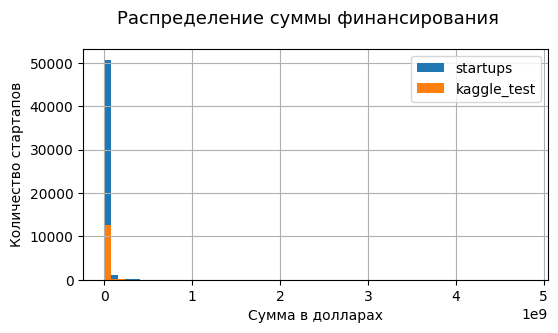

In [85]:
#–ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã
axes = startups['funding_total_usd'].hist(figsize=(7,3), bins=60);
axes = kaggle_test['funding_total_usd'].hist(figsize=(6,3), bins=60);
# –û–±—â–∏–π –∑–∞–≥–æ–ª–æ–≤–æ–∫ –¥–ª—è –≤—Å–µ—Ö –∫–æ–ª–æ–Ω–æ–∫
plt.suptitle('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—É–º–º—ã —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è', fontsize=13, y=1.01);
plt.legend(['startups','kaggle_test'])
# –ø–æ–¥–ø–∏—Å—å –æ—Å–µ–π
axes.set_xlabel('–°—É–º–º–∞ –≤ –¥–æ–ª–ª–∞—Ä–∞—Ö');
axes.set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤');

**–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–∞–Ω–Ω—ã–µ –≤ –¥—Ä—É–≥–æ–º –º–∞—Å—à—Ç–∞–±–µ.**

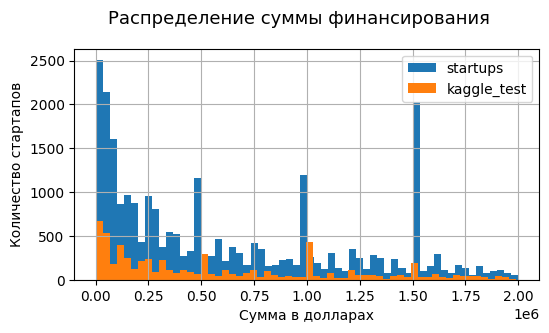

In [86]:
#–ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã
axes = startups.query('funding_total_usd < 0.2e+7')['funding_total_usd'].hist(figsize=(7,3), bins=60);
axes = kaggle_test.query('funding_total_usd < 0.2e+7')['funding_total_usd'].hist(figsize=(6,3), bins=60);
# –∑–∞–≥–æ–ª–æ–≤–æ–∫ 
plt.suptitle('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—É–º–º—ã —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è', fontsize=13, y=1.01);
plt.legend(['startups','kaggle_test'])
# –ø–æ–¥–ø–∏—Å—å –æ—Å–µ–π
axes.set_xlabel('–°—É–º–º–∞ –≤ –¥–æ–ª–ª–∞—Ä–∞—Ö');
axes.set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤');

**–°—Ç—Ä—É–∫—Ç—É—Ä–∞ –¥–∞–Ω–Ω—ã—Ö –ø–æ —Å—É–º–º–µ —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è –∏–º–µ–µ—Ç –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –æ—Ç–ª–∏—á–∏—è, –æ–¥–Ω–∞–∫–æ –≤–æ–æ–±—â–µ–º –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω–æ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ —Å—Ö–æ–∂–∏.**

**–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ä–∞—É–Ω–¥–æ–≤**

In [87]:
# –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —Ä–∞—É–Ω–¥–æ–≤ –∏–∑ startups —Å –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–æ–º, 
# —Å–æ–¥–µ—Ä–∂–∞—â–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ä–∞—É–Ω–¥–æ–≤ –∏–∑ kaggle_test –ø–æ –∏–Ω–¥–µ–∫—Å—É –∏–∑ –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω—ã—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫
pd.DataFrame(startups['funding_rounds'].describe()).\
    rename(columns={'funding_rounds':'funding_rounds_startups'}).\
        join(
          pd.DataFrame(kaggle_test['funding_rounds'].describe()).\
             rename(columns={'funding_rounds':'funding_rounds_kaggle_test'})  
        )

funding_rounds_startups  funding_rounds_kaggle_test
count             52508.000000                13125.000000
mean                  1.740344                    1.714438
std                   1.373537                    1.318800
min                   1.000000                    1.000000
25%                   1.000000                    1.000000
50%                   1.000000                    1.000000
75%                   2.000000                    2.000000
max                  19.000000                   15.000000

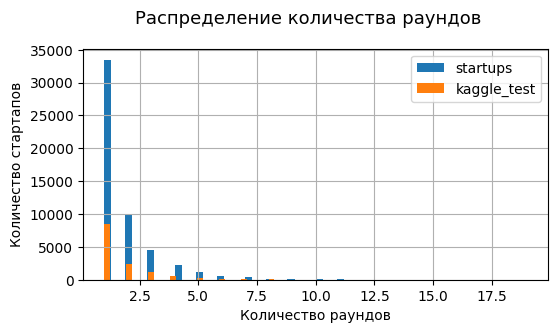

In [88]:
#–ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã
axes = startups['funding_rounds'].hist(figsize=(7,3), bins=60);
axes = kaggle_test['funding_rounds'].hist(figsize=(6,3), bins=60);
# –∑–∞–≥–æ–ª–æ–≤–æ–∫ 
plt.suptitle('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ä–∞—É–Ω–¥–æ–≤', fontsize=13, y=1.01);
plt.legend(['startups','kaggle_test'])
# –ø–æ–¥–ø–∏—Å—å –æ—Å–µ–π
axes.set_xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞—É–Ω–¥–æ–≤');
axes.set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤');

**–í —Ç–µ—Å—Ç–æ–≤–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞—É–Ω–¥–æ–≤ —Å–ª–µ–¥—É–µ—Ç –ø–æ—Ö–æ–∂–µ–π –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç–∏.**

**–ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω–æ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ —Å—Ö–æ–∂–∏.**

**–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ –∂–∏–∑–Ω–∏ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤**

In [89]:
# –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ —Å–æ —Å—Ä–æ–∫–∞–º–∏ –∂–∏–∑–Ω–∏ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ –∏–∑ startups —Å –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–æ–º, 
# —Å–æ–¥–µ—Ä–∂–∞—â–∏–º —Å—Ä–æ–∫–∏ –∂–∏–∑–Ω–∏ –∏–∑ kaggle_test –ø–æ –∏–Ω–¥–µ–∫—Å—É –∏–∑ –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω—ã—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫
pd.DataFrame(startups['lifetime'].describe()).\
    rename(columns={'lifetime':'lifetime_startups'}).\
        join(
          pd.DataFrame(kaggle_test['lifetime'].describe()).\
             rename(columns={'lifetime':'lifetime_kaggle_test'})  
        )

lifetime_startups  lifetime_kaggle_test
count       52508.000000          13125.000000
mean         3140.297059           3097.609524
std          2146.872879           2128.356554
min            57.000000             52.000000
25%          1739.000000           1726.000000
50%          2557.000000           2526.000000
75%          4018.000000           3866.000000
max         17378.000000          17167.000000

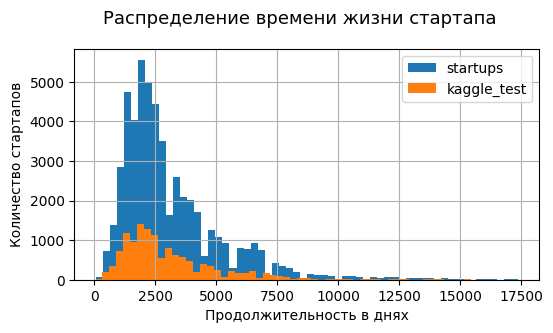

In [90]:
#–ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã
axes = startups['lifetime'].hist(figsize=(7,3), bins=60);
axes = kaggle_test['lifetime'].hist(figsize=(6,3), bins=60);
# –∑–∞–≥–æ–ª–æ–≤–æ–∫ 
plt.suptitle('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ –∂–∏–∑–Ω–∏ —Å—Ç–∞—Ä—Ç–∞–ø–∞', fontsize=13, y=1.01);
plt.legend(['startups','kaggle_test'])
# –ø–æ–¥–ø–∏—Å—å –æ—Å–µ–π
axes.set_xlabel('–ü—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –≤ –¥–Ω—è—Ö');
axes.set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤');

**–§–æ—Ä–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –≤—Ä–µ–º–µ–Ω–∏ –∂–∏–∑–Ω–∏ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ –≤ startups –∏ kaggle_test –ø–æ—Ö–æ–∂–∞ (–µ—Å—Ç—å –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–µ —Å–¥–≤–∏–≥–∏), –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω–æ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ —Å—Ö–æ–∂–∏.**

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–∏ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ –æ—Ç–¥–µ–ª—å–Ω–æ.

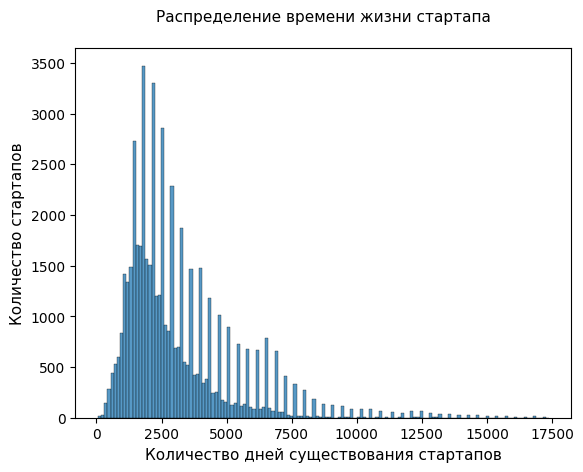

In [91]:
sns.histplot(x='lifetime', data=startups); 
# –∑–∞–≥–æ–ª–æ–≤–æ–∫
plt.title(
    '–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ –∂–∏–∑–Ω–∏ —Å—Ç–∞—Ä—Ç–∞–ø–∞',\
    y=1.05, fontsize=11);
# –ø–æ–¥–ø–∏—Å—å –æ—Å–∏
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–Ω–µ–π —Å—É—â–µ—Å—Ç–≤–æ–≤–∞–Ω–∏—è —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤', fontsize=11);
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤', fontsize=11);

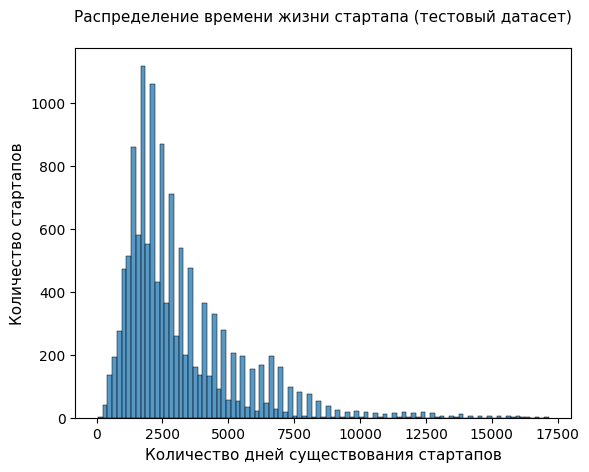

In [92]:
sns.histplot(x='lifetime', data=kaggle_test); 
# –∑–∞–≥–æ–ª–æ–≤–æ–∫
plt.title(
    '–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ –∂–∏–∑–Ω–∏ —Å—Ç–∞—Ä—Ç–∞–ø–∞ (—Ç–µ—Å—Ç–æ–≤—ã–π –¥–∞—Ç–∞—Å–µ—Ç)',\
    y=1.05, fontsize=11);
# –ø–æ–¥–ø–∏—Å—å –æ—Å–∏
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–Ω–µ–π —Å—É—â–µ—Å—Ç–≤–æ–≤–∞–Ω–∏—è —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤', fontsize=11);
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤', fontsize=11);

**–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–∞–Ω–Ω—ã–µ –≤ —á–∏—Å–ª–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö –≤–æ –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏ –º–µ–∂–¥—É —Å–æ–±–æ–π.**

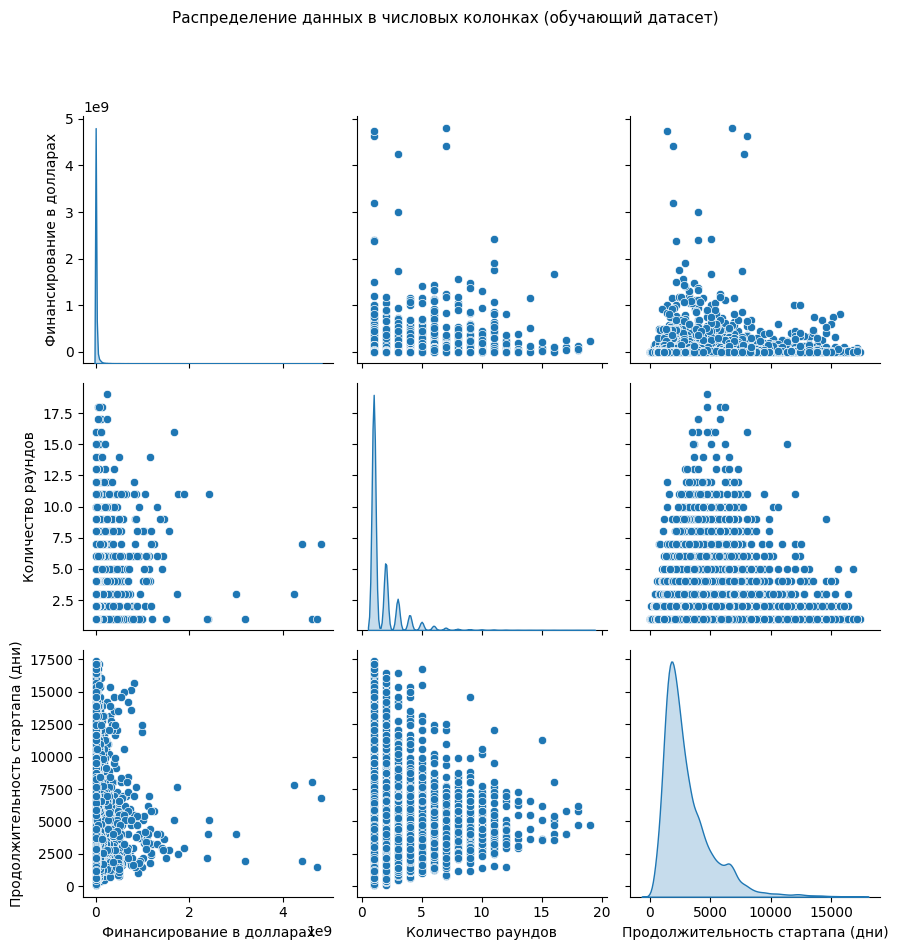

In [93]:
# –¥–≤—É—Ö–º–µ—Ä–Ω—ã–π –≥—Ä–∞—Ñ–∏–∫ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
# –ø–∞—Ä–∞–º–µ—Ç—Ä—ã height –∏ aspect –¥–ª—è —Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞–Ω–∏—è —Ä–∞–∑–º–µ—Ä–∞
# –ø–∞—Ä–∞–º–µ—Ç—Ä hue –¥–ª—è –¥–µ–ª–µ–Ω–∏—è –Ω–∞ –ø–æ–¥–∫–∞—Ç–µ–≥–æ—Ä–∏–∏
# corner=True - —É–±–∏—Ä–∞–µ–º –¥—É–±–ª–∏—Ä—É—é—â–∏–µ –≥—Ä–∞—Ñ–∏–∫–∏
 # —Ä–∞–∑–º–µ—Ä, –ø—Ä–æ–∑—Ä–∞—á–Ω–æ—Å—Ç—å, –≤–∏–¥ —Ç–æ—á–∫–∏ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ scatter
g = sns.pairplot(data=startups[['funding_total_usd', 'funding_rounds', 'lifetime']], \
             height=3,  aspect=1, diag_kind='kde');

# –ó–∞–≥–æ–ª–æ–≤–æ–∫ –º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å, –∏—Å–ø–æ–ª—å–∑—É—è plt.gcf().suptitle()
plt.gcf().suptitle("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –≤ —á–∏—Å–ª–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö (–æ–±—É—á–∞—é—â–∏–π –¥–∞—Ç–∞—Å–µ—Ç)", y=1.05, fontsize=11);

# –ü–µ—Ä–µ–∏–º–µ–Ω—É–µ–º –º–µ—Ç–∫–∏ –æ—Å–µ–π –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º ._add_axis_labels()
labels=["–§–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏–µ –≤ –¥–æ–ª–ª–∞—Ä–∞—Ö","–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞—É–Ω–¥–æ–≤", "–ü—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å—Ç–∞—Ä—Ç–∞–ø–∞ (–¥–Ω–∏)" ]
g.x_vars = labels
g.y_vars = labels
g._add_axis_labels()
plt.tight_layout()

In [94]:
startups.drop(columns={'status_new'}).corr() #–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è

funding_total_usd  funding_rounds  lifetime
funding_total_usd           1.000000        0.236363  0.114489
funding_rounds              0.236363        1.000000  0.145807
lifetime                    0.114489        0.145807  1.000000

In [95]:
startups['funding_total_usd'].describe()

count    5.250800e+04
mean     1.417867e+07
std      7.452140e+07
min      1.000000e+00
25%      4.550000e+05
50%      2.000000e+06
75%      7.684971e+06
max      4.812000e+09
Name: funding_total_usd, dtype: float64

**–í–∏–∑—É–∞–ª—å–Ω–æ –≤–∏–¥–Ω–æ, —á—Ç–æ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å—Ç–∞—Ä—Ç–∞–ø–∞, —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏–µ –≤ –¥–æ–ª–ª–∞—Ä–∞—Ö, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞—É–Ω–¥–æ–≤ –Ω–µ —Å–≤—è–∑–∞–Ω—ã –ª–∏–Ω–µ–π–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å—é (—ç—Ç–æ —Ç–∞–∫–∂–µ –≤–∏–¥–Ω–æ –ø–æ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏).**   
**–ü–æ–ª–æ–≤–∏–Ω–∞ –ø—Ä–æ–µ–∫—Ç–æ–≤ –∏–º–µ–µ—Ç —Å—É–º–º—É —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è –¥–æ 2 –º–ª–Ω.—Ä—É–±.**  

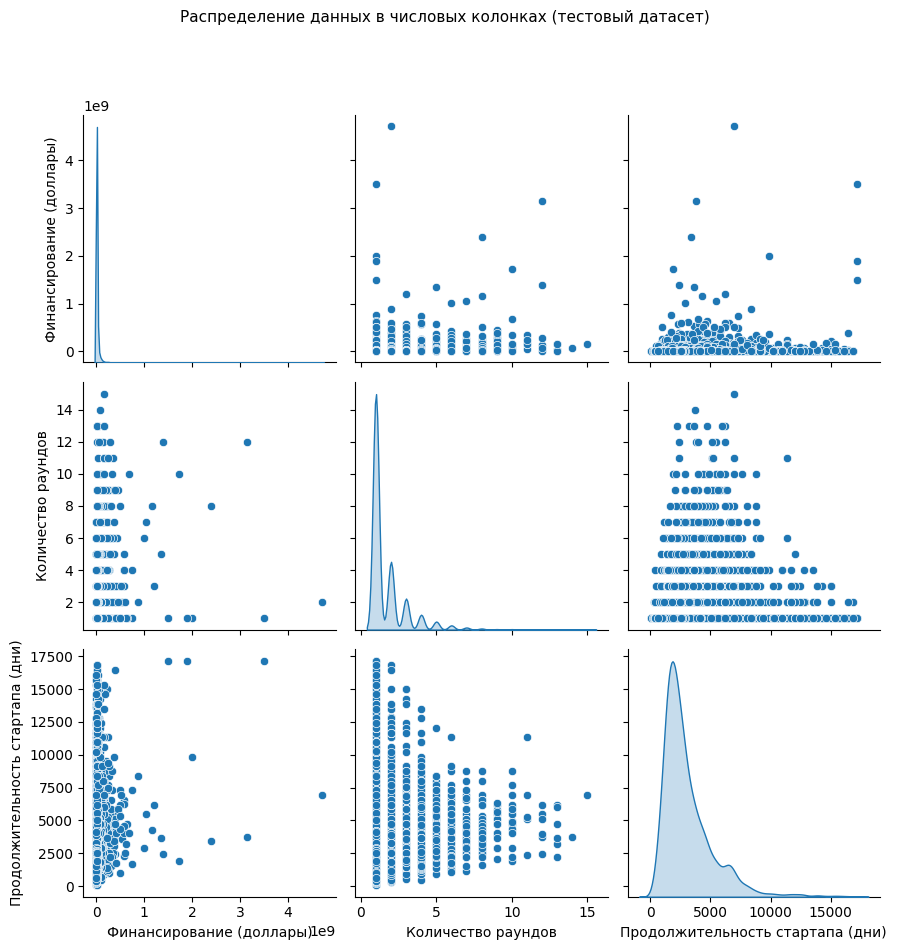

In [96]:
# –¥–≤—É—Ö–º–µ—Ä–Ω—ã–π –≥—Ä–∞—Ñ–∏–∫ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
# –ø–∞—Ä–∞–º–µ—Ç—Ä—ã height –∏ aspect –¥–ª—è —Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞–Ω–∏—è —Ä–∞–∑–º–µ—Ä–∞
# –ø–∞—Ä–∞–º–µ—Ç—Ä hue –¥–ª—è –¥–µ–ª–µ–Ω–∏—è –Ω–∞ –ø–æ–¥–∫–∞—Ç–µ–≥–æ—Ä–∏–∏
# corner=True - —É–±–∏—Ä–∞–µ–º –¥—É–±–ª–∏—Ä—É—é—â–∏–µ –≥—Ä–∞—Ñ–∏–∫–∏
# —Ä–∞–∑–º–µ—Ä, –ø—Ä–æ–∑—Ä–∞—á–Ω–æ—Å—Ç—å, –≤–∏–¥ —Ç–æ—á–∫–∏ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ scatter
g = sns.pairplot(data=kaggle_test[['funding_total_usd', 'funding_rounds', 'lifetime']], \
             height=3, aspect=1, diag_kind='kde');

# –ó–∞–≥–æ–ª–æ–≤–æ–∫ –º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å, –∏—Å–ø–æ–ª—å–∑—É—è plt.gcf().suptitle()
plt.gcf().suptitle("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –≤ —á–∏—Å–ª–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö (—Ç–µ—Å—Ç–æ–≤—ã–π –¥–∞—Ç–∞—Å–µ—Ç)", y=1.05, fontsize=11);

# –ü–µ—Ä–µ–∏–º–µ–Ω—É–µ–º –º–µ—Ç–∫–∏ –æ—Å–µ–π –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º ._add_axis_labels()
labels=["–§–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏–µ (–¥–æ–ª–ª–∞—Ä—ã)","–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞—É–Ω–¥–æ–≤", "–ü—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å—Ç–∞—Ä—Ç–∞–ø–∞ (–¥–Ω–∏)" ]
g.x_vars = labels
g.y_vars = labels
g._add_axis_labels()
plt.tight_layout()

**–ù–∞–±–ª—é–¥–∞–µ–º —Å—Ö–æ–∂–µ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –≤ —Ç–µ—Å—Ç–æ–≤–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ.**

#### –ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∫–æ–ª–æ–Ω–æ–∫

**–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º –∫–æ–ª–æ–Ω–∫–∞–º**

In [97]:
# —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∫–æ–ª–æ–Ω–æ–∫
startups[startups.select_dtypes(include='object').columns.tolist()].drop(columns=['name', 'status']).describe()

category_list country_code state_code       region     city  \
count          52508        52508      52508        52508    52508   
unique         22100          135        301         1037     4478   
top         Software          USA         CA  SF Bay Area  Unknown   
freq            3207        29697      10218         6969     6357   

       category_list_new  
count              52508  
unique               708  
top        Biotechnology  
freq                3592

In [98]:
# —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∫–æ–ª–æ–Ω–æ–∫
kaggle_test[kaggle_test.select_dtypes(include='object').columns.tolist()].drop(columns=['name']).describe()

category_list country_code state_code       region     city  \
count          13125        13125      13125        13125    13125   
unique          6207           97        236          689     2118   
top         Software          USA         CA  SF Bay Area  Unknown   
freq             775         7428       2552         1750     1587   

       category_list_new  
count              13125  
unique               560  
top        Biotechnology  
freq                 855

**–í –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–∞—è –∫–∞—Ç–µ–≥–æ—Ä–∏—è –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞—Ö startups –∏ kaggle_test —Å–æ–≤–ø–∞–¥–∞—é—Ç. –ß–∞—Å—Ç–æ—Ç–∞ –ø—Ä–∏–º–µ—Ä–Ω–æ –ø—Ä–æ–ø–æ—Ä—Ü–∏–Ω–∞–ª—å–Ω–∞ –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å —Ä–∞–∑–º–µ—Ä–∞–º–∏ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–æ–≤.**

**–ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏**

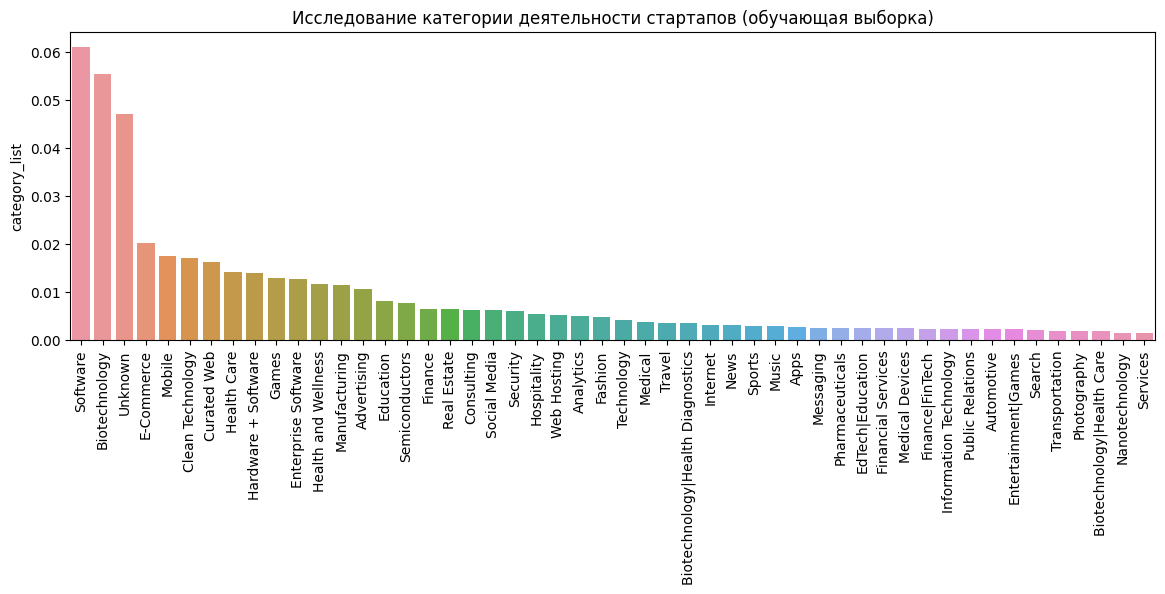

In [99]:
plt.figure(figsize=(14,4))
dd = pd.DataFrame(startups['category_list'].value_counts(normalize=True)).head(50) # –¥–æ–ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–π
sns.barplot(x=dd.index, y=dd['category_list'])
plt.xticks(rotation=90);
plt.title('–ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ (–æ–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞)');

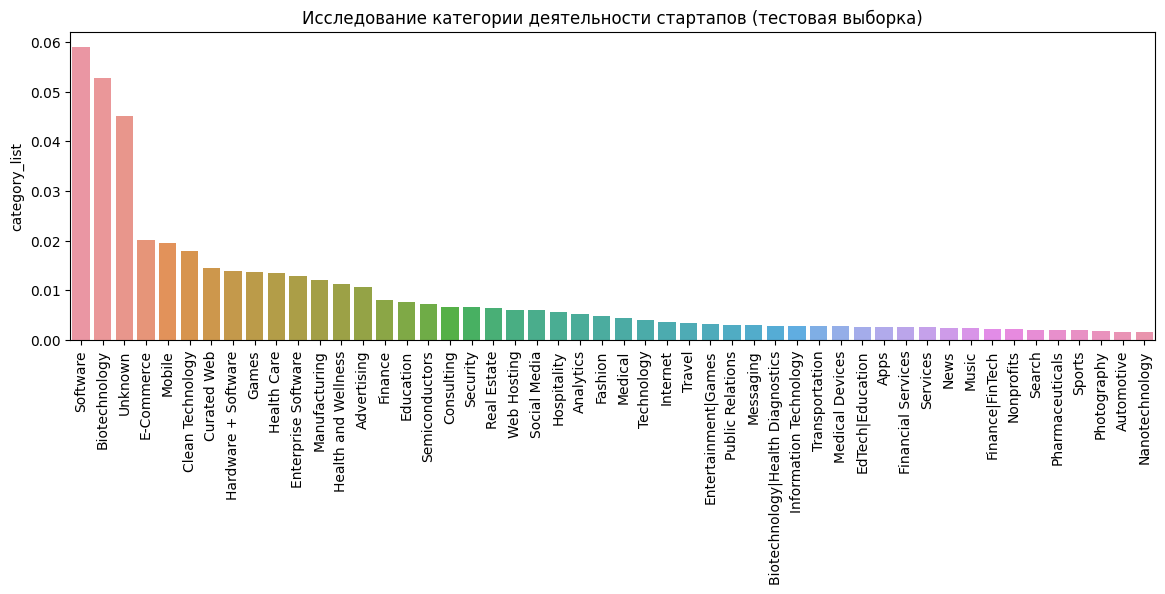

In [100]:
plt.figure(figsize=(14,4))
dd = pd.DataFrame(kaggle_test['category_list'].value_counts(normalize=True)).head(50) # –¥–æ–ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–π
sns.barplot(x=dd.index, y=dd['category_list'])
plt.xticks(rotation=90);
plt.title('–ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ (—Ç–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞)');

**–ö–∞—Ç–µ–≥–æ—Ä–∏–∏ –¥–ª—è –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ startups –∏ kaggle_test –≤ –æ—Å–Ω–æ–≤–Ω–æ–º —Å–ª–µ–¥—É—é—Ç –≤ —Ç–æ–º –∂–µ –ø–æ—Ä—è–¥–∫–µ, —Ö–æ—Ç—è –∏ –µ—Å—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Ä–∞–∑–ª–∏—á–∏—è.**

**–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø—Ä–æ–ø–æ—Ä—Ü–∏–∏ –≤ –ø–µ—Ä–≤—ã—Ö –¥–µ—Å—è—Ç–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏—è—Ö.**

In [101]:
ss = pd.DataFrame(startups['category_list'].value_counts(normalize=True)).head(10) # –¥–æ–ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–π
ss = ss.rename(columns={'category_list':'category_list_startups'})
kk = pd.DataFrame(kaggle_test['category_list'].value_counts(normalize=True)).head(10) # –¥–æ–ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–π
kk = kk.rename(columns={'category_list':'category_list_kaggle_test'})
ss.join(kk)

category_list_startups  category_list_kaggle_test
Software                           0.061076                   0.059048
Biotechnology                      0.055325                   0.052800
Unknown                            0.046945                   0.045029
E-Commerce                         0.020264                   0.020038
Mobile                             0.017521                   0.019429
Clean Technology                   0.016988                   0.017829
Curated Web                        0.016245                   0.014552
Health Care                        0.014169                   0.013410
Hardware + Software                0.013960                   0.013790
Games                              0.012969                   0.013714

**–≠—Ç–æ –æ–±—â–µ–µ –≤ —Å—Ç—Ä—É–∫—Ç—É—Ä–µ –ø–æ–∑–≤–æ–ª—è–µ—Ç –Ω–∞–º —Å–¥–µ–ª–∞—Ç—å –ø–µ—Ä–µ—Ö–æ–¥ –æ—Ç –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∫ —á–∏—Å–ª–æ–≤—ã–º. –í–º–µ—Å—Ç–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –∏—Ö –¥–æ–ª–∏. –¢–∞–∫–∂–µ –º–æ–∂–Ω–æ –±—ã–ª–æ –±—ã –ø–µ—Ä–µ–π—Ç–∏ –∫ –∫–æ–≥–æ—Ä—Ç–∞–º.** 

**–ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –æ—Å—Ç–∞–ª—å–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã.**

**–ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ —Å—Ç—Ä–∞–Ω—ã —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ —Å—Ç–∞—Ä—Ç–∞–ø–∞**

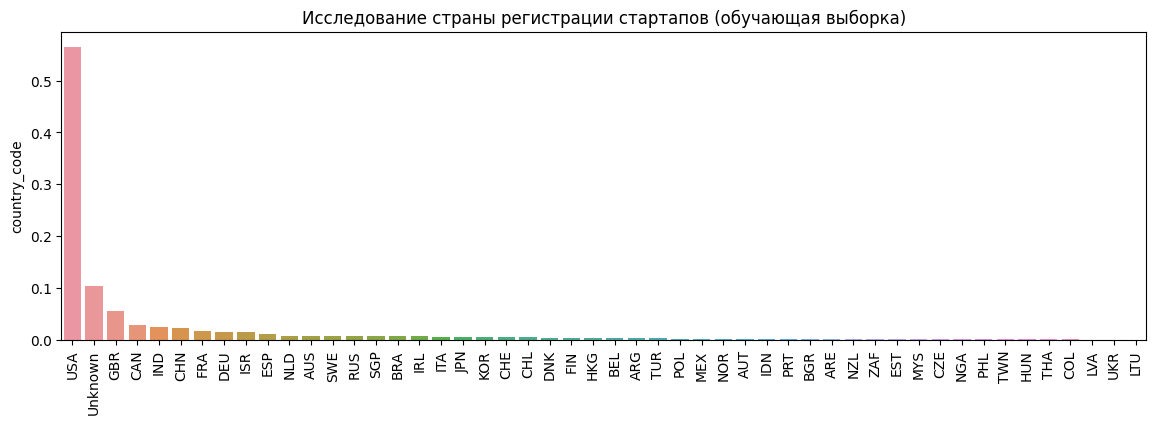

In [102]:
plt.figure(figsize=(14,4))
dd = pd.DataFrame(startups['country_code'].value_counts(normalize=True)).head(50) # –¥–æ–ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–π
sns.barplot(x=dd.index, y=dd['country_code'])
plt.xticks(rotation=90);
plt.title('–ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ —Å—Ç—Ä–∞–Ω—ã —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ (–æ–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞)');

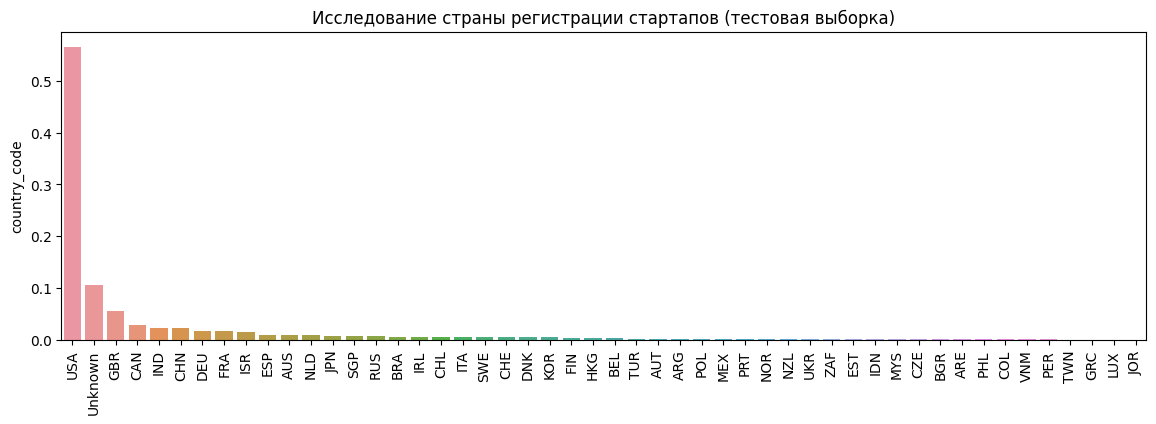

In [103]:
plt.figure(figsize=(14,4))
dd = pd.DataFrame(kaggle_test['country_code'].value_counts(normalize=True)).head(50) # –¥–æ–ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–π
sns.barplot(x=dd.index, y=dd['country_code'])
plt.xticks(rotation=90);
plt.title('–ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ —Å—Ç—Ä–∞–Ω—ã —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ (—Ç–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞)');

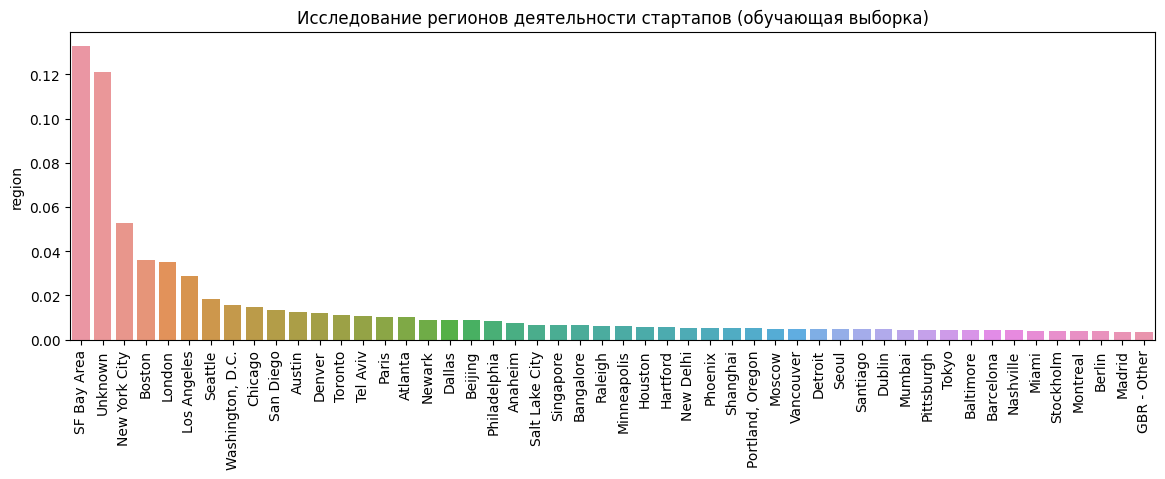

In [104]:
plt.figure(figsize=(14,4))
dd = pd.DataFrame(startups['region'].value_counts(normalize=True)).head(50) # –¥–æ–ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–π
sns.barplot(x=dd.index, y=dd['region'])
plt.xticks(rotation=90);
plt.title('–ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ —Ä–µ–≥–∏–æ–Ω–æ–≤ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ (–æ–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞)');

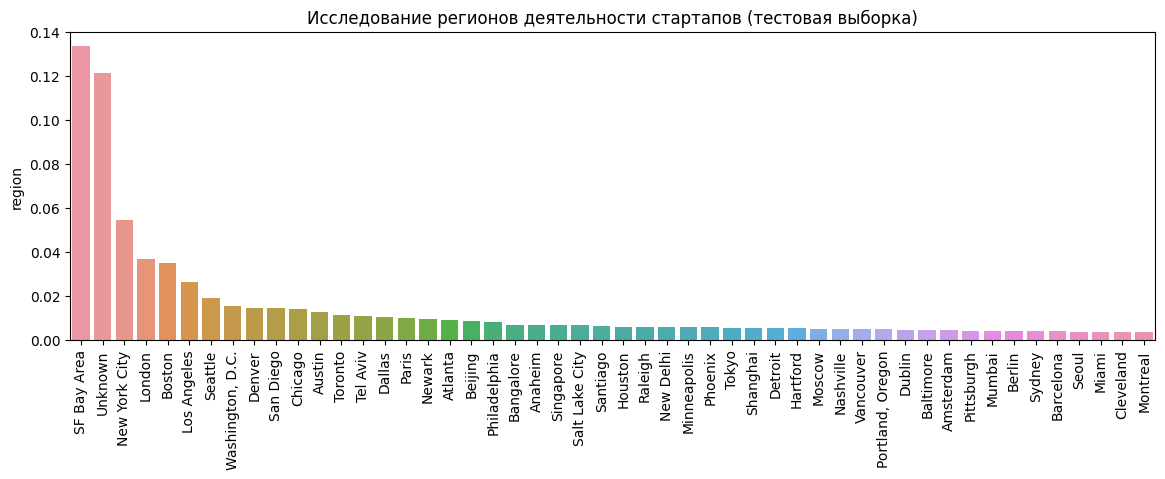

In [105]:
plt.figure(figsize=(14,4))
dd = pd.DataFrame(kaggle_test['region'].value_counts(normalize=True)).head(50) # –¥–æ–ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–π
sns.barplot(x=dd.index, y=dd['region'])
plt.xticks(rotation=90);
plt.title('–ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ —Ä–µ–≥–∏–æ–Ω–æ–≤ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ (—Ç–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞)');

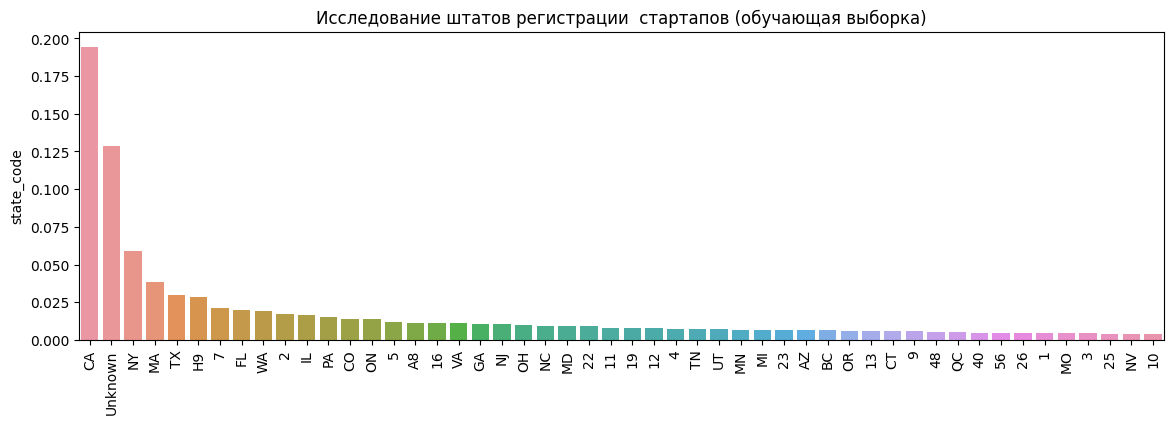

In [106]:
plt.figure(figsize=(14,4))
dd = pd.DataFrame(startups['state_code'].value_counts(normalize=True)).head(50) # –¥–æ–ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–π
sns.barplot(x=dd.index, y=dd['state_code'])
plt.xticks(rotation=90);
plt.title('–ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ —à—Ç–∞—Ç–æ–≤ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏  —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ (–æ–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞)');

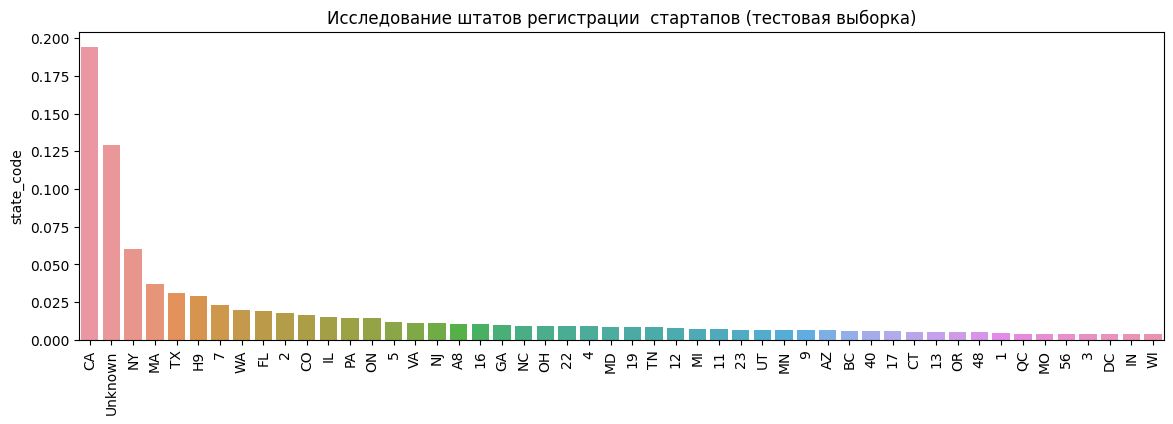

In [107]:
plt.figure(figsize=(14,4))
dd = pd.DataFrame(kaggle_test['state_code'].value_counts(normalize=True)).head(50) # –¥–æ–ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–π
sns.barplot(x=dd.index, y=dd['state_code'])
plt.xticks(rotation=90);
plt.title('–ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ —à—Ç–∞—Ç–æ–≤ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏  —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ (—Ç–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞)');

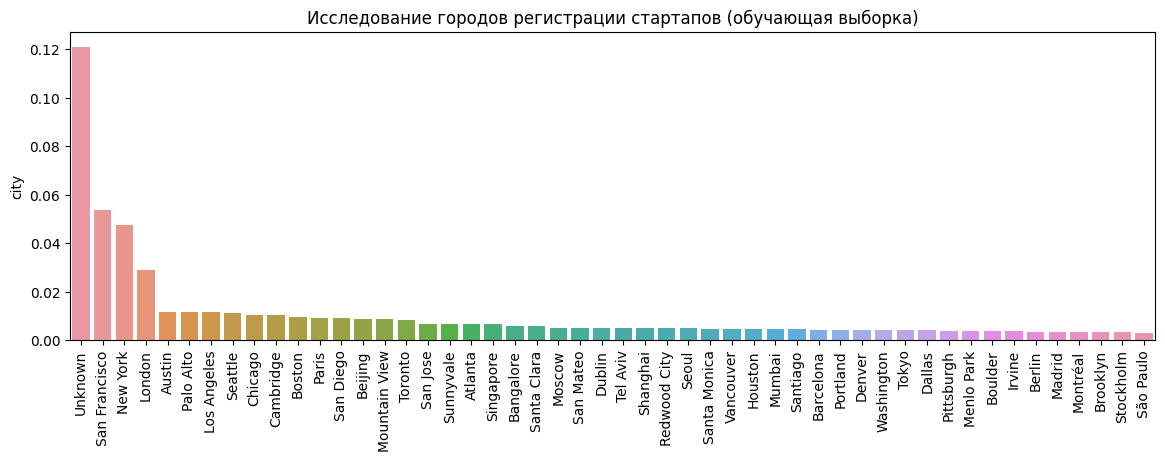

In [108]:
plt.figure(figsize=(14,4))
dd = pd.DataFrame(startups['city'].value_counts(normalize=True)).head(50) # –¥–æ–ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–π
sns.barplot(x=dd.index, y=dd['city'])
plt.xticks(rotation=90);
plt.title('–ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –≥–æ—Ä–æ–¥–æ–≤ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ (–æ–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞)');

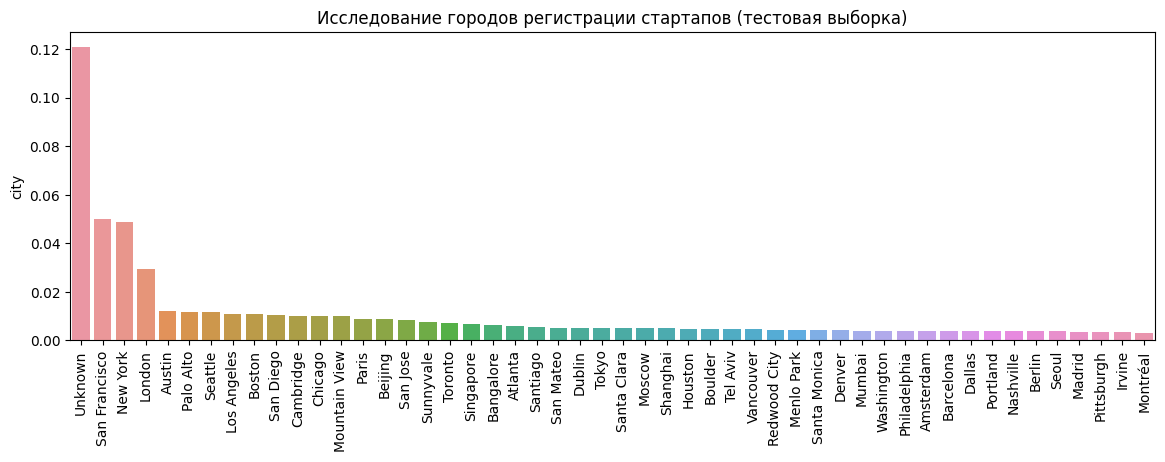

In [109]:
plt.figure(figsize=(14,4))
dd = pd.DataFrame(kaggle_test['city'].value_counts(normalize=True)).head(50) # –¥–æ–ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–π
sns.barplot(x=dd.index, y=dd['city'])
plt.xticks(rotation=90);
plt.title('–ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –≥–æ—Ä–æ–¥–æ–≤ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ (—Ç–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞)');

**–ü—Ä–æ—Å–ª–µ–∂–∏–≤–∞–µ—Ç—Å—è –æ–±—â–µ–µ –≤ —Å—Ç—Ä—É–∫—Ç—É—Ä–µ –≤—Å–µ—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –æ–±—É—á–∞—é—â–µ–≥–æ –∏ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤.**

### –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –æ–±—É—á–∞—é—â–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ (startups)

**–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫.**

In [110]:
startups['status'].value_counts(normalize=True)

operating    0.906376
closed       0.093624
Name: status, dtype: float64

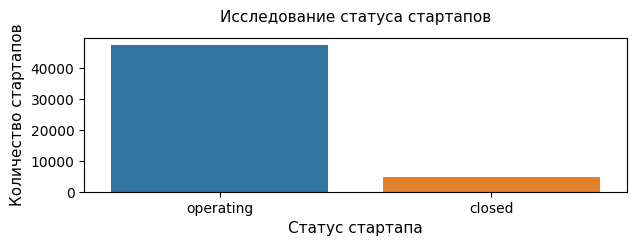

In [111]:
plt.figure(figsize=(7,2))
sns.countplot(data=startups, x='status');
# –Ω–∞–∑–≤–∞–Ω–∏—è –æ—Å–µ–π
plt.xlabel('–°—Ç–∞—Ç—É—Å —Å—Ç–∞—Ä—Ç–∞–ø–∞', fontsize=11);
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤', fontsize=11);
# –∑–∞–≥–æ–ª–æ–≤–æ–∫
plt.title('–ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ —Å—Ç–∞—Ç—É—Å–∞ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤', y=1.05, fontsize=11);

**–í–∏–¥–∏–º, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –Ω–µ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω—ã: –∑–∞–∫—Ä—ã—Ç—ã—Ö —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ - 9.4%, –æ—Ç–∫—Ä—ã—Ç—ã—Ö - 90.6%.**

**–ò—Å—Å–ª–µ–¥—É–µ–º –¥–∞–Ω–Ω—ã–µ –≤ —Ä–∞–∑—Ä–µ–∑–µ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞.**

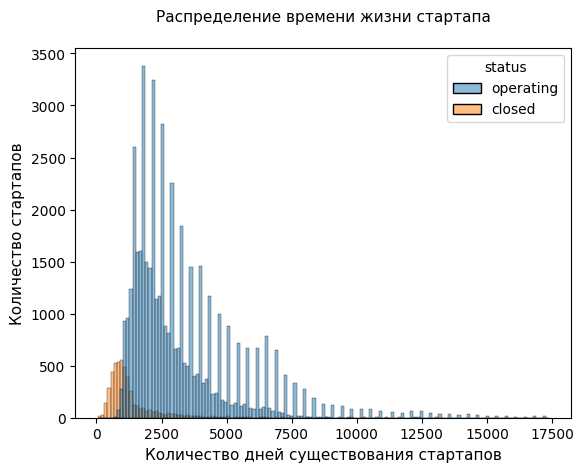

In [112]:
sns.histplot(x='lifetime', data=startups, hue='status'); 
# –∑–∞–≥–æ–ª–æ–≤–æ–∫
plt.title(
    '–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ –∂–∏–∑–Ω–∏ —Å—Ç–∞—Ä—Ç–∞–ø–∞',\
    y=1.05, fontsize=11);
# –ø–æ–¥–ø–∏—Å—å –æ—Å–∏
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–Ω–µ–π —Å—É—â–µ—Å—Ç–≤–æ–≤–∞–Ω–∏—è —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤', fontsize=11);
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤', fontsize=11);

* **–§–æ—Ä–º—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω–∏ –∂–∏–∑–Ω–∏ —Å—Ç–∞—Ä—Ç–∞–ø–∞ –¥–ª—è –∑–∞–∫—Ä—ã—Ç—ã—Ö –∏ –æ—Ç–∫—Ä—ã—Ç—ã—Ö —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ –ø–æ—Ö–æ–∂–∏, –æ–¥–Ω–∞–∫–æ –µ—Å—Ç—å –æ—Ç–¥–µ–ª—å–Ω—ã–µ –ø–∏–∫–∏ –¥–ª—è –æ—Ç–∫—Ä—ã—Ç—ã—Ö —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤.**   
* **–í–ø–æ–ª–Ω–µ –ª–æ–≥–∏—á–Ω–æ, —á—Ç–æ –∑–∞–∫—Ä—ã—Ç—ã–µ —Å—Ç–∞—Ä—Ç–∞–ø—ã –∏–º–µ—é—Ç –º–µ–Ω—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–Ω–µ–π —Å—É—â–µ—Å—Ç–≤–∞–Ω–∏—è.**

**–í–∏–¥–∏–º, —á—Ç–æ —Ñ–æ—Ä–º—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –≤—Ä–µ–º–µ–Ω–∏ –∂–∏–∑–Ω–∏ —Å—Ç–∞—Ä—Ç–∞–ø–∞ –¥–ª—è –æ–±—É—á–∞—é—â–µ–≥–æ –∏ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ –æ—á–µ–Ω—å –ø–æ—Ö–æ–∂–∏.**

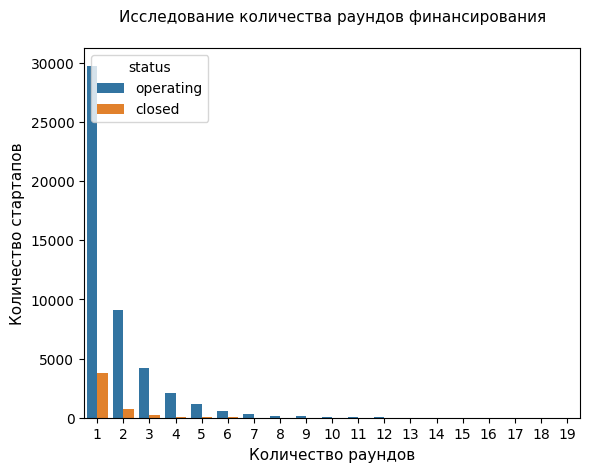

In [113]:
sns.countplot(x='funding_rounds', data=startups, hue='status'); 
# –∑–∞–≥–æ–ª–æ–≤–æ–∫
plt.title(
    '–ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ä–∞—É–Ω–¥–æ–≤ —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è',\
    y=1.05, fontsize=11);
# –ø–æ–¥–ø–∏—Å—å –æ—Å–∏
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞—É–Ω–¥–æ–≤', fontsize=11);
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤', fontsize=11);

**–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞—É–Ω–¥–æ–≤ –¥–ª—è –∑–∞–∫—Ä—ã—Ç—ã—Ö –∏ –æ—Ç–∫—Ä—ã—Ç—ã—Ö —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ –∏–∑–º–µ–Ω—è–µ—Ç—Å—è –≤ —Å—Ö–æ–∂–∏—Ö –ø—Ä–æ–ø–æ—Ä—Ü–∏—è—Ö.**

**–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–∞–Ω–Ω—ã–µ –≤ —á–∏—Å–ª–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö –≤–æ –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏ –º–µ–∂–¥—É —Å–æ–±–æ–π.**

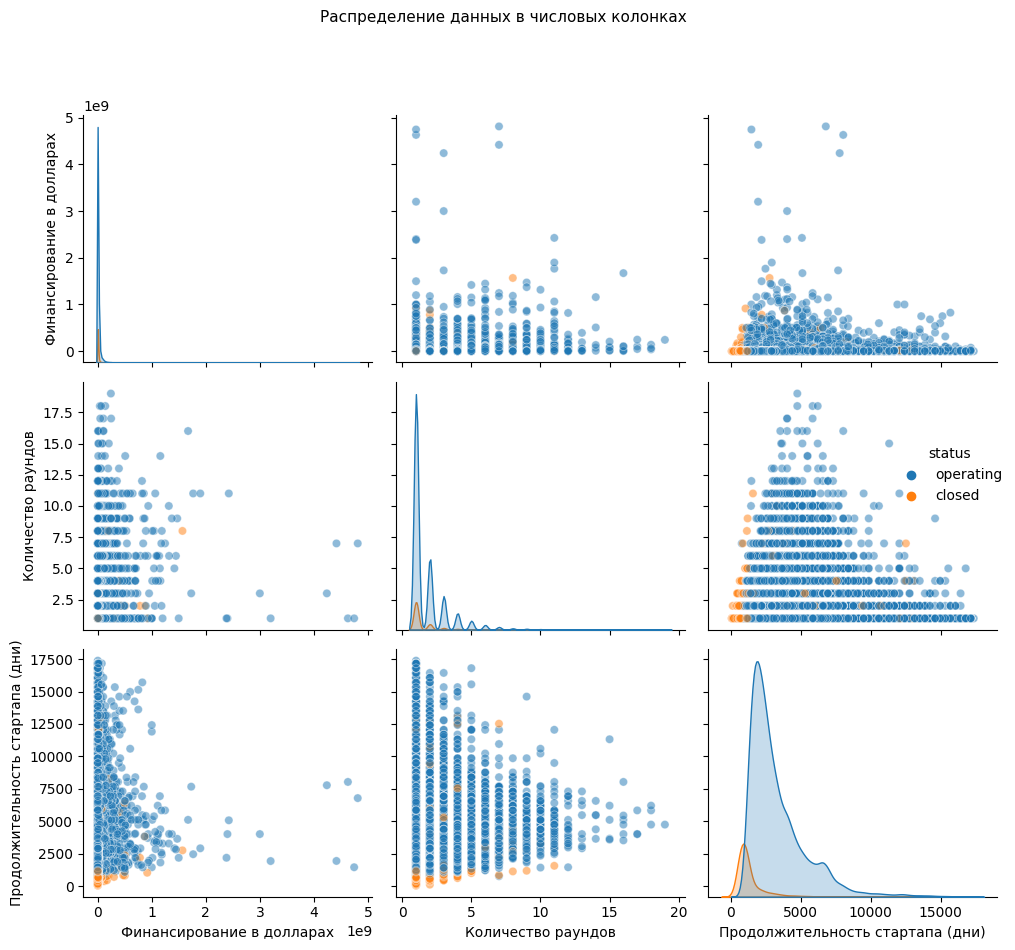

In [114]:
# –¥–≤—É—Ö–º–µ—Ä–Ω—ã–π –≥—Ä–∞—Ñ–∏–∫ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
# –ø–∞—Ä–∞–º–µ—Ç—Ä—ã height –∏ aspect –¥–ª—è —Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞–Ω–∏—è —Ä–∞–∑–º–µ—Ä–∞
# –ø–∞—Ä–∞–º–µ—Ç—Ä hue –¥–ª—è –¥–µ–ª–µ–Ω–∏—è –Ω–∞ –ø–æ–¥–∫–∞—Ç–µ–≥–æ—Ä–∏–∏
# corner=True - —É–±–∏—Ä–∞–µ–º –¥—É–±–ª–∏—Ä—É—é—â–∏–µ –≥—Ä–∞—Ñ–∏–∫–∏
scatter_kws = {'alpha': 0.5} # —Ä–∞–∑–º–µ—Ä, –ø—Ä–æ–∑—Ä–∞—á–Ω–æ—Å—Ç—å, –≤–∏–¥ —Ç–æ—á–∫–∏ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ scatter
data = startups[['funding_total_usd', 'funding_rounds', 'lifetime', 'status']]    
g = sns.pairplot(data=data, height=3, hue='status', aspect=1, diag_kind='kde', plot_kws=scatter_kws);

# –ó–∞–≥–æ–ª–æ–≤–æ–∫ –º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å, –∏—Å–ø–æ–ª—å–∑—É—è plt.gcf().suptitle()
plt.gcf().suptitle("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –≤ —á–∏—Å–ª–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö", y=1.05, fontsize=11);

# –ü–µ—Ä–µ–∏–º–µ–Ω—É–µ–º –º–µ—Ç–∫–∏ –æ—Å–µ–π –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º ._add_axis_labels()
labels=["–§–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏–µ –≤ –¥–æ–ª–ª–∞—Ä–∞—Ö","–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞—É–Ω–¥–æ–≤", "–ü—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å—Ç–∞—Ä—Ç–∞–ø–∞ (–¥–Ω–∏)" ]
g.x_vars = labels
g.y_vars = labels
g._add_axis_labels()
plt.tight_layout()

In [115]:
startups.drop(columns={'status_new'}).corr() #–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è

funding_total_usd  funding_rounds  lifetime
funding_total_usd           1.000000        0.236363  0.114489
funding_rounds              0.236363        1.000000  0.145807
lifetime                    0.114489        0.145807  1.000000

In [116]:
startups['funding_total_usd'].describe()

count    5.250800e+04
mean     1.417867e+07
std      7.452140e+07
min      1.000000e+00
25%      4.550000e+05
50%      2.000000e+06
75%      7.684971e+06
max      4.812000e+09
Name: funding_total_usd, dtype: float64

**–ù–∞ –≥—Ä–∞—Ñ–∏–∫–∞—Ö –≤–∏–¥–Ω–æ, —á—Ç–æ –∑–∞–∫—Ä—ã—Ç—ã–µ –ø—Ä–æ–µ–∫—Ç—ã –∏–º–µ—é—Ç –º–µ–Ω—å—à—É—é –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å. –≠—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫, –≤–µ—Ä–æ—è—Ç–Ω–æ, –±—É–¥–µ—Ç –æ–±–ª–∞–¥–∞—Ç—å –≤—ã—Å–æ–∫–æ–π –≤–∞–∂–Ω–æ—Å—Ç—å—é –ø—Ä–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å—Ç–∞—Ä—Ç–∞–ø–∞.**  

**–ò—Å—Å–ª–µ–¥—É–µ–º –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –≤ —Ä–∞–∑—Ä–µ–∑–µ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞.**

**–ü–æ—Å–º–æ—Ç—Ä–∏–º, –≤ –∫–∞–∫–∏—Ö —Å—Ç—Ä–∞–Ω–∞—Ö –Ω–∞–∏–±–æ–ª—å—à–∞—è –¥–æ–ª—è –∑–∞–∫—Ä—ã—Ç—ã—Ö —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ –∏ –≤ –∫–∞–∫–∏—Ö –Ω–∞–∏–±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ.**

In [117]:
def func_status(sort_column='–î–æ–ª—è –∫–ª–∞—Å—Å–∞ –ó–∞–∫—Ä—ã—Ç', index='country_code'):
    plt.figure(dpi=100, figsize=(10,3)) # —Ä–∞–∑–º–µ—Ä, —á–µ—Ç–∫–æ—Å—Ç—å
    # –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞: –≤ —Å—Ç—Ä–æ–∫–∞—Ö - index, –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö - 'status', –∞–≥—Ä–µ–≥–∏—Ä—É—é—â–∞—è —Ñ—É–Ω–∫—Ü–∏—è - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ
    data = startups.pivot_table(
        index = index, 
        columns = 'status', 
        aggfunc='count', 
        values='name')
    data['–î–æ–ª—è –∫–ª–∞—Å—Å–∞ –û—Ç–∫—Ä—ã—Ç'] = (
        data['operating'] / (data['operating'] + data['closed'])
    ).round(2)
    data['–î–æ–ª—è –∫–ª–∞—Å—Å–∞ –ó–∞–∫—Ä—ã—Ç'] = 1 - data['–î–æ–ª—è –∫–ª–∞—Å—Å–∞ –û—Ç–∫—Ä—ã—Ç']
    data = data.fillna(0).query('closed > 0').sort_values(by=sort_column, ascending=False)
    data = data.head(10)
    display(data);

In [118]:
'''
–§—É–Ω–∫—Ü–∏—è —Å—Ç—Ä–æ–∏—Ç —Ç–µ–ø–ª–æ–≤—É—é –∫–∞—Ä—Ç—É –¥–ª—è –æ—Ç–∫—Ä—ã—Ç—ã—Ö –∏ –∑–∞–∫—Ä—ã—Ç—ã—Ö —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ –≤ —Ä–∞–∑—Ä–µ–∑–µ
–≥–æ—Ä–æ–¥–æ–≤, —Ä–µ–≥–∏–æ–Ω–æ–≤, —à—Ç–∞—Ç–æ–≤
–í–æ–∑–º–æ–∂–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è sort_column: '–î–æ–ª—è –∫–ª–∞—Å—Å–∞ –ó–∞–∫—Ä—ã—Ç','–î–æ–ª—è –∫–ª–∞—Å—Å–∞ –û—Ç–∫—Ä—ã—Ç'.

–í–æ–∑–º–æ–∂–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è index: 'country_code', 'state_code',	'region', 'city'.	
'''
def func_country_status(sort_column='–î–æ–ª—è –∫–ª–∞—Å—Å–∞ –ó–∞–∫—Ä—ã—Ç', index='country_code'):
    plt.figure(dpi=100, figsize=(10,3)) # —Ä–∞–∑–º–µ—Ä, —á–µ—Ç–∫–æ—Å—Ç—å

    data = startups.pivot_table(
        index = index, 
        columns = 'status', 
        aggfunc='count', 
        values='name')
    data['–î–æ–ª—è –∫–ª–∞—Å—Å–∞ –û—Ç–∫—Ä—ã—Ç'] = (
        data['operating'] / (data['operating'] + data['closed'])
    ).round(2)
    data['–î–æ–ª—è –∫–ª–∞—Å—Å–∞ –ó–∞–∫—Ä—ã—Ç'] = 1 - data['–î–æ–ª—è –∫–ª–∞—Å—Å–∞ –û—Ç–∫—Ä—ã—Ç']
    data = data.fillna(0).query('closed > 0').sort_values(by=sort_column, ascending=False)
    data = data.head(10)
    # –ó–∞–≥–æ–ª–æ–≤–æ–∫
    plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ–ª–∏ –∫–ª–∞—Å—Å–æ–≤', y=1.05, fontsize=11);
    # –ø–æ–¥–ø–∏—Å–∏ –Ω–∞ –æ—Å—è—Ö
    # —Ç–µ–ø–ª–æ–≤–∞—è –∫–∞—Ä—Ç–∞. "—É–¥–∞–ª–µ–Ω–∏–µ" –º–µ—Ç–æ–∫ –æ—Å–µ–π —Å–¥–µ–ª–∞–ª–∏ —Å –ø–æ–º–æ—â—å—é .set(xlabel='', ylabel='')
    
    sns.heatmap(
        data=data[
        ['–î–æ–ª—è –∫–ª–∞—Å—Å–∞ –û—Ç–∫—Ä—ã—Ç', '–î–æ–ª—è –∫–ª–∞—Å—Å–∞ –ó–∞–∫—Ä—ã—Ç']
        ], linewidth=0.5, cmap='Reds', annot=True, fmt='.3').set(xlabel='', ylabel='');
    


In [119]:
func_status(sort_column='–î–æ–ª—è –∫–ª–∞—Å—Å–∞ –ó–∞–∫—Ä—ã—Ç', index='country_code')

status        closed  operating  –î–æ–ª—è –∫–ª–∞—Å—Å–∞ –û—Ç–∫—Ä—ã—Ç  –î–æ–ª—è –∫–ª–∞—Å—Å–∞ –ó–∞–∫—Ä—ã—Ç
country_code                                                           
MKD              1.0        1.0                0.50                0.50
RUS            130.0      238.0                0.65                0.35
BLR              1.0        2.0                0.67                0.33
GEO              1.0        2.0                0.67                0.33
PRI              1.0        2.0                0.67                0.33
SLV              1.0        2.0                0.67                0.33
LIE              1.0        2.0                0.67                0.33
PER              9.0       25.0                0.74                0.26
SAU              2.0        6.0                0.75                0.25
GTM              1.0        3.0                0.75                0.25

<Figure size 1000x300 with 0 Axes>

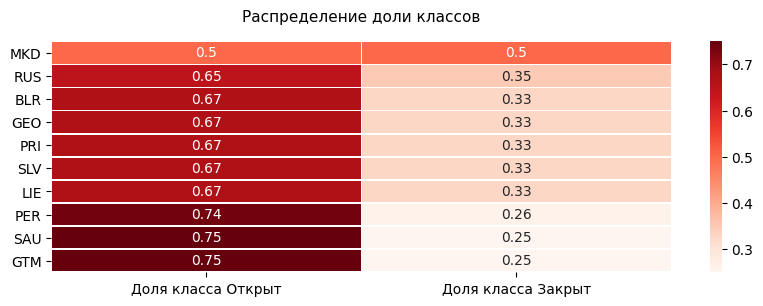

In [120]:
func_country_status(sort_column='–î–æ–ª—è –∫–ª–∞—Å—Å–∞ –ó–∞–∫—Ä—ã—Ç', index='country_code')

**–ù–∞–∏–±–æ–ª—å—à–∞—è –¥–æ–ª—è –∑–∞–∫—Ä—ã—Ç—ã—Ö —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ –≤ —Å—Ç—Ä–∞–Ω–∞—Ö —Å —Ç–∏–∫–µ—Ä–∞–º–∏ MKD, RUS, BLR –∏ —Ç.–¥. –û–¥–Ω–∞–∫–æ —É –Ω–∞—Å –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —ç—Ç–∏—Ö —Å—Ç—Ä–∞–Ω, —Ç–∞–∫ —á—Ç–æ —ç—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –ø—Ä–æ—Å—Ç–æ —à—É–º, —Å–ª—É—á–∞–π–Ω–æ—Å—Ç—å.**

In [121]:
func_status(sort_column='closed', index='country_code')

status        closed  operating  –î–æ–ª—è –∫–ª–∞—Å—Å–∞ –û—Ç–∫—Ä—ã—Ç  –î–æ–ª—è –∫–ª–∞—Å—Å–∞ –ó–∞–∫—Ä—ã—Ç
country_code                                                           
USA           2283.0    27414.0                0.92                0.08
Unknown       1286.0     4214.0                0.77                0.23
GBR            234.0     2691.0                0.92                0.08
RUS            130.0      238.0                0.65                0.35
CAN            128.0     1412.0                0.92                0.08
FRA             71.0      845.0                0.92                0.08
ISR             64.0      703.0                0.92                0.08
DEU             61.0      773.0                0.93                0.07
CHN             54.0     1186.0                0.96                0.04
IND             53.0     1223.0                0.96                0.04

<Figure size 1000x300 with 0 Axes>

**–ù–∞–∏–±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫—Ä—ã—Ç—ã—Ö —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ –≤ –°–®–ê, –æ–¥–Ω–∞–∫–æ –≤ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—ã—Ö –≤–µ–ª–∏—á–∏–Ω–∞—Ö —ç—Ç–æ –Ω–µ–±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ.**

In [122]:
func_status(sort_column='–î–æ–ª—è –∫–ª–∞—Å—Å–∞ –û—Ç–∫—Ä—ã—Ç', index='country_code')

status        closed  operating  –î–æ–ª—è –∫–ª–∞—Å—Å–∞ –û—Ç–∫—Ä—ã—Ç  –î–æ–ª—è –∫–ª–∞—Å—Å–∞ –ó–∞–∫—Ä—ã—Ç
country_code                                                           
PRT              1.0       85.0                0.99                0.01
CHL              8.0      244.0                0.97                0.03
TUR              6.0      137.0                0.96                0.04
IND             53.0     1223.0                0.96                0.04
HUN              2.0       43.0                0.96                0.04
CHN             54.0     1186.0                0.96                0.04
THA              2.0       43.0                0.96                0.04
ARE              3.0       75.0                0.96                0.04
POL              6.0      114.0                0.95                0.05
SVN              1.0       18.0                0.95                0.05

<Figure size 1000x300 with 0 Axes>

**–ù–∞–∏–±–æ–ª—å—à–∞—è –¥–æ–ª—è –æ—Ç–∫—Ä—ã—Ç—ã—Ö —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ –≤ PRT, CHL, TUR. –û–¥–Ω–∞–∫–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ –≤ —ç—Ç–∏—Ö —Å—Ç—Ä–∞–Ω–∞—Ö –º–∞–ª–æ –≤ –æ–±—â–µ–º –æ–±—ä–µ–º–µ –¥–∞–Ω–Ω—ã—Ö.**

In [123]:
func_status(sort_column='operating', index='country_code')

status        closed  operating  –î–æ–ª—è –∫–ª–∞—Å—Å–∞ –û—Ç–∫—Ä—ã—Ç  –î–æ–ª—è –∫–ª–∞—Å—Å–∞ –ó–∞–∫—Ä—ã—Ç
country_code                                                           
USA           2283.0    27414.0                0.92                0.08
Unknown       1286.0     4214.0                0.77                0.23
GBR            234.0     2691.0                0.92                0.08
CAN            128.0     1412.0                0.92                0.08
IND             53.0     1223.0                0.96                0.04
CHN             54.0     1186.0                0.96                0.04
FRA             71.0      845.0                0.92                0.08
DEU             61.0      773.0                0.93                0.07
ISR             64.0      703.0                0.92                0.08
ESP             45.0      562.0                0.93                0.07

<Figure size 1000x300 with 0 Axes>

**–ù–∞–∏–±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∫—Ä—ã—Ç—ã—Ö —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ –≤ —Ä–∞–∑—Ä–µ–∑–µ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤ USA, Unknown (–Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–∞—è –∫–∞—Ç–µ–≥–æ—Ä–∏—è), GBR.**

**–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ–ª–∏ –∫–ª–∞—Å—Å–æ–≤ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –≤ –∞–±—Å–æ–ª—é—Ç–Ω—ã—Ö –∏ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—ã—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞—Ö.**

In [124]:
func_status(sort_column='–î–æ–ª—è –∫–ª–∞—Å—Å–∞ –ó–∞–∫—Ä—ã—Ç', index='category_list_new')

status                      closed  operating  –î–æ–ª—è –∫–ª–∞—Å—Å–∞ –û—Ç–∫—Ä—ã—Ç  \
category_list_new                                                   
Interest Graph                 4.0        1.0                0.20   
Internet TV                    2.0        1.0                0.33   
Intelligent Systems            4.0        4.0                0.50   
In-Flight Entertainment        1.0        1.0                0.50   
Portals                        1.0        1.0                0.50   
Promotional                    1.0        1.0                0.50   
Logistics Company              1.0        1.0                0.50   
Q&A                            1.0        1.0                0.50   
Anything Capital Intensive     1.0        1.0                0.50   
Independent Pharmacies         1.0        1.0                0.50   

status                      –î–æ–ª—è –∫–ª–∞—Å—Å–∞ –ó–∞–∫—Ä—ã—Ç  
category_list_new                               
Interest Graph                            0.80  
Internet TV                               0.67  
Intelligent Systems                       0.50  
In-Flight Entertainment                   0.50  
Portals                                   0.50  
Promotional                               0.50  
Logistics Company                         0.50  
Q&A                                       0.50  
Anything Capital Intensive                0.50  
Independent Pharmacies                    0.50

<Figure size 1000x300 with 0 Axes>

**–ù–∞–∏–±–æ–ª—å—à–∞—è –¥–æ–ª—è –∑–∞–∫—Ä—ã—Ç—ã—Ö —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ –≤ —Ä–∞–∑—Ä–µ–∑–µ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º Interest Graph, Internet TV, Intelligent Systems. –û–¥–Ω–∞–∫–æ –≤ –∞–±—Å–æ–ª—é—Ç–Ω—ã—Ö –≤–µ–ª–∏—á–∏–Ω–∞—Ö –≤ —ç—Ç–∏—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏—è—Ö –Ω–µ–±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤.**

In [125]:
func_status(sort_column='closed', index='category_list_new')

status             closed  operating  –î–æ–ª—è –∫–ª–∞—Å—Å–∞ –û—Ç–∫—Ä—ã—Ç  –î–æ–ª—è –∫–ª–∞—Å—Å–∞ –ó–∞–∫—Ä—ã—Ç
category_list_new                                                           
Unknown             729.0     1736.0                0.70                0.30
Curated Web         332.0     1415.0                0.81                0.19
Software            282.0     3040.0                0.92                0.08
Biotechnology       207.0     3385.0                0.94                0.06
Advertising         181.0     1745.0                0.91                0.09
E-Commerce          179.0     1994.0                0.92                0.08
Mobile              133.0     1263.0                0.90                0.10
Games               118.0      896.0                0.88                0.12
Apps                115.0     1069.0                0.90                0.10
Clean Technology    100.0     1006.0                0.91                0.09

<Figure size 1000x300 with 0 Axes>

**–ù–∞–∏–±–æ–ª—å—à–µ–µ –∞–±—Å–æ–ª—é—Ç–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫—Ä—ã—Ç—ã—Ö —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ –ø–æ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ Unknown, –¥–∞–ª–µ–µ Curated Web, Software.**  

**–í—ã–≤–æ–¥:**     
* –ü—Ä–æ–≤–µ–¥—è –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö, –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –æ–ø—Ä–µ–¥–µ–ª—è—é—â–∏–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ —è–≤–ª—è–µ—Ç—Å—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å—É—â–µ—Å—Ç–≤–æ–≤–∞–Ω–∏—è —Å—Ç–∞—Ä—Ç–∞–ø–∞.   
* –¢–∞–∫–∂–µ –±—ã–ª–æ –∑–∞–º–µ—á–µ–Ω–æ, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –≤ –æ–±—É—á–∞—é—â–µ–º –∏ —Ç–µ—Å—Ç–æ–≤–æ–º –¥–∞—Ç–∞—Å–µ—Ç–∞—Ö –æ—á–µ–Ω—å —Å—Ö–æ–∂–µ.   
* –ö–∞—Ç–µ–≥–æ—Ä–∏–π –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö –æ—á–µ–Ω—å –º–Ω–æ–≥–æ, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –∂–µ–ª–∞—Ç–µ–ª—å–Ω–æ –ø–µ—Ä–µ–π—Ç–∏ –æ—Ç –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∫ —á–∏—Å–ª–æ–≤—ã–º. –í —Å–≤—è–∑–∏ —Å —ç—Ç–∏–º, –≤–æ–∑–Ω–∏–∫–∞–µ—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å —Å–æ–∑–¥–∞–Ω–∏—è –Ω–æ–≤—ã—Ö —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏—Ö —Å—Ç–æ–ª–±—Ü–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ —Å—É—â–µ—Å—Ç–≤—É—é—â–∏—Ö.  

## –°–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–µ —Å—Ç–æ–ª–±—Ü—ã

**–°–æ–∑–¥–∞–¥–∏–º –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã:**       
1. **data['dur_rounds']** - –ü—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Ä–∞—É–Ω–¥–æ–≤ (–ø–æ –∞–Ω–∞–ª–æ–≥–∏–∏ —Å lifetime).   
2.  **data['first_funding_at_num']** - –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –¥–∞—Ç—É –≤ —Å—Ç–æ–ª–±—Ü–µ 'first_funding_at' –≤ —á–∏—Å–ª–∞, –æ–±–æ–∑–Ω–∞—á–∞—é—â–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–Ω–µ–π —Å 1 —è–Ω–≤–∞—Ä—è 1970 –≥–æ–¥–∞. –î–ª—è 'last_funding_at' —Ç–∞–∫ –¥–µ–ª–∞—Ç—å –Ω–µ –±—É–¥–µ–º, —Ç–∞–∫ –∫–∞–∫ –µ—Å—Ç—å —Å—Ç–æ–ª–±–µ—Ü —Å –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å—é —Ä–∞—É–Ω–¥–æ–≤ (–∏–Ω–∞—á–µ –ø–æ–ª—É—á–∏—Ç—Å—è –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å, —Ç–∞–∫ –∫–∞–∫ –µ—Å—Ç—å –ª–∏–Ω–µ–π–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É 'first_funding_at_num' –∏ 'last_funding_at_num').   
4. **data['count_category_list']**- –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –≤ –∫–æ–ª–æ–Ω–∫–µ 'category_list'.   
5. **data['country_code_share']**,  **data['city_share']**,  **data['category_list_share']** - –ù–∞–π–¥–µ–º –¥–æ–ª—é –∫–∞–∂–¥–æ–π —Å—Ç—Ä–∞–Ω—ã, –∫–∞–∂–¥–æ–≥–æ –≥–æ—Ä–æ–¥–∞, –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –≤ –¥–∞–Ω–Ω—ã—Ö.   
6. **data['total_1day_lifetime']** - –°—É–º–º–∞ –Ω–∞ 1 –¥–µ–Ω—å –∂–∏–∑–Ω–∏ —Å—Ç–∞—Ç–∞–ø–∞ (–≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è –∫–∞–∫ data['funding_total_usd'] / data['lifetime']).
   
**–ò—Ç–æ–≥–æ 8 –Ω–æ–≤—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤.**

**–í—Å–µ —ç—Ç–æ –æ—Ñ–æ—Ä–º–∏–º –≤–≤–∏–¥–µ —Ñ—É–Ω–∫—Ü–∏–∏ columns_new(data), —Ç–∞–∫ –∫–∞–∫ –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ –Ω–∞–¥–æ –ø—Ä–æ–¥–µ–ª–∞—Ç—å —Ç–æ–∂–µ —Å–∞–º–æ–µ.** –≠—Ç–∞ —Ñ—É–Ω–∫—Ü–∏—è –≤–Ω—É—Ç—Ä–∏ —Å–µ–±—è —Å–æ–¥–µ—Ä–∂–∏—Ç –ø–æ–¥—Ñ—É–Ω–∫—Ü–∏—é func_merge(data, col).

**–°–æ–∑–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏—é func_merge(data, col), —Å –ø–æ–º–æ—â—å—é –∫–æ—Ç–æ—Ä–æ–π –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –¥–æ–±–∞–≤–ª—è–µ—Ç—Å—è –Ω–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü —Å –¥–æ–ª—è–º–∏ –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, –≤—ã—á–∏—Å–ª–µ–Ω–Ω—ã–º–∏ –ø–æ –Ω—É–∂–Ω–æ–º—É –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–º—É —Å—Ç–æ–ª–±—Ü—É.** –≠—Ç—É —Ñ—É–Ω–∫—Ü–∏—è –≤—ã–∑—ã–≤–∞–µ—Ç—Å—è –≤–Ω—É—Ç—Ä–∏ —Ñ—É–Ω–∫—Ü–∏–∏ columns_new(data).

In [126]:
'''
–§—É–Ω–∫—Ü–∏—è —Å–æ–∑–¥–∞–µ—Ç —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–µ —Å—Ç–æ–ª–±—Ü—ã 'dur_rounds', 'av_dur_rounds', 'first_funding_at_num',
'last_funding_at_num'
–ü—Ä–∏–º–µ—Ä –≤—ã–∑–æ–≤–∞:
startups = columns_new(startups)
'''
def columns_new(data):

    def func_merge(data, col):
        #col - —Å—Ç–æ–ª–±–µ—Ü —Å –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏
        #col_share - —Å—Ç–æ–ª–±–µ—Ü, –ø–æ–ª—É—á–µ–Ω–Ω—ã–π –∏–∑ col, —Å–æ–¥–µ—Ä–∂–∏—Ç –¥–æ–ª—é –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
        #–ü—Ä–∏–º–µ—Ä –≤—ã–∑–æ–≤–∞ —Ñ—É–Ω–∫—Ü–∏–∏:
        #func_merge(startups,'country_code')
        #–í–æ–∑–≤—Ä–∞—â–∞–µ—Ç –¥–∞—Ç–∞—Ñ—Ä–µ–π–º, –≤ –∫–æ—Ç–æ—Ä–æ–º –¥–æ–±–∞–≤–ª–µ–Ω –Ω–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü col_share
        tt = pd.DataFrame(data[col].value_counts(normalize=True)).rename(columns={col:col+'_share'})
        tt = tt.reset_index()
        tt = tt.rename(columns={'index':col})
        data = data.merge(tt, how='inner', on=col)
        return data

    #–≤—ã—á–∏—Å–ª—è–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –≤ —Å—Ç–æ–ª–±—Ü–µ 'category_list'
    data['count_category_list'] = data['category_list'].str.count('|') + 1
    #–°–æ–∑–¥–∞–¥–∏–º —Å—Ç–æ–ª–±–µ—Ü –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Ä–∞—É–Ω–¥–æ–≤ (–ø–æ –∞–Ω–∞–ª–æ–≥–∏–∏ —Å lifetime).
    # —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –¥–∞–ª–µ–µ –¥–µ–ª–µ–Ω–∏—è –Ω–∞ –Ω–æ–ª—å, –ø—Ä–∏–±–∞–≤–ª—è–µ–º 1
    data['dur_rounds'] = data['last_funding_at'] - data['first_funding_at'] 
    data['dur_rounds'] = data['dur_rounds'].astype(str).str.split(' ').str[0].astype(int) + 1
    #–°–æ–∑–¥–∞–¥–∏–º –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü - —Å—Ä–µ–¥–Ω—è—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Ä–∞—É–Ω–¥–∞ –≤ –¥–Ω—è—Ö.
 
    #–¢–µ–ø–µ—Ä—å –Ω–∞–¥–æ —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –∏–∑ –¥–∞—Ç - –¥–ª—è —ç—Ç–æ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –¥–∞—Ç—ã –≤ —á–∏—Å–ª–∞
    data['first_funding_at_num'] = data['first_funding_at'] - datetime.datetime(1970,1,1)
    data['first_funding_at_num'] = data['first_funding_at_num'].astype(str).str.split(' ').str[0].astype(int)
    #data['last_funding_at_num'] = data['last_funding_at'] - datetime.datetime(1970,1,1)
    #data['last_funding_at_num'] = data['last_funding_at_num'].astype(str).str.split(' ').str[0].astype(int)
    #–≤—ã—á–∏—Å–ª—è–µ–º –¥–æ–ª—é –∫–∞–∂–¥–æ–π —Å—Ç—Ä–∞–Ω—ã –≤ –¥–∞–Ω–Ω—ã—Ö
    data = func_merge(data,'country_code')
    #data = func_merge(data,'region')
    data = func_merge(data,'city')
    #data = func_merge(data,'category_list_new')
    data = func_merge(data,'category_list')

    # —Å—É–º–º–∞ –Ω–∞ 1 –¥–µ–Ω—å –∂–∏–∑–Ω–∏ –ø—Ä–æ–µ–∫—Ç–∞
    data['total_1day_lifetime'] = data['funding_total_usd'] / data['lifetime']

    # —Å–¥–µ–ª–∞–µ–º –∏–Ω–¥–µ–∫—Å–æ–º —Å—Ç–æ–ª–±–µ—Ü 'name'
    data = data.set_index('name')
    return data
    

In [127]:
startups = columns_new(startups)
kaggle_test = columns_new(kaggle_test)

In [128]:
startups.head(3)

category_list  \
name                                                                                       
Lunchgate                                                Online Reservations|Restaurants   
42matters AG                          Advertising|Android|Curated Web|Mobile|Promotional   
Doodle        Advertising|Curated Web|Events|Internet|Meeting Software|Online Scheduling   

              funding_total_usd     status country_code state_code  region  \
name                                                                         
Lunchgate              828626.0  operating          CHE         25  Zurich   
42matters AG           138000.0  operating          CHE         25  Zurich   
Doodle                 138000.0  operating          CHE         25  Zurich   

                city  funding_rounds first_funding_at last_funding_at  \
name                                                                    
Lunchgate     Z√ºrich               2       2011-05-01      2014-12-01   
42matters AG  Z√ºrich               2       2011-09-12      2014-02-09   
Doodle        Z√ºrich               1       2008-01-01      2008-01-01   

              lifetime  status_new    category_list_new  count_category_list  \
name                                                                           
Lunchgate         2998           0  Online Reservations                   33   
42matters AG      2414           0          Advertising                   52   
Doodle            3959           0          Advertising                   76   

              dur_rounds  first_funding_at_num  country_code_share  \
name                                                                 
Lunchgate           1311                 15095             0.00499   
42matters AG         882                 15229             0.00499   
Doodle                 1                 13879             0.00499   

              city_share  category_list_share  total_1day_lifetime  
name                                                                
Lunchgate       0.001447             0.000019           276.392929  
42matters AG    0.001447             0.000019            57.166529  
Doodle          0.001447             0.000019            34.857287

**–ú—ã —Å–æ–∑–¥–∞–ª–∏ –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ, —Å–æ–±—Ä–∞–≤ –≤ —á–∏—Å–ª–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –∏–∑ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö.**

In [129]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º —Ç–æ–ª—å–∫–æ –Ω–∞ —á–∏—Å–ª–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã
startups[startups.select_dtypes(include='number').columns.tolist()].head(3)

funding_total_usd  funding_rounds  lifetime  status_new  \
name                                                                    
Lunchgate              828626.0               2      2998           0   
42matters AG           138000.0               2      2414           0   
Doodle                 138000.0               1      3959           0   

              count_category_list  dur_rounds  first_funding_at_num  \
name                                                                  
Lunchgate                      33        1311                 15095   
42matters AG                   52         882                 15229   
Doodle                         76           1                 13879   

              country_code_share  city_share  category_list_share  \
name                                                                
Lunchgate                0.00499    0.001447             0.000019   
42matters AG             0.00499    0.001447             0.000019   
Doodle                   0.00499    0.001447             0.000019   

              total_1day_lifetime  
name                               
Lunchgate              276.392929  
42matters AG            57.166529  
Doodle                  34.857287

In [130]:
# –§—É–Ω–∫—Ü–∏—è –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Ç–æ–ª—å–∫–æ —Å —á–∏—Å–ª–∞–º–∏
def func_data_number(data):
    return data[data.select_dtypes(include='number').columns.tolist()] #–¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Ç–æ–ª—å–∫–æ —Å —á–∏—Å–ª–∞–º–∏

**–°–æ–∑–¥–∞–¥–∏–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º df –∏–∑ startups, —Å–æ–¥–µ—Ä–∂–∞—â–∏–π —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã–µ –∫–æ–ª–æ–Ω–∫–∏.**

In [131]:
df = func_data_number(startups)
df.sample()

funding_total_usd  funding_rounds  lifetime  status_new  \
name                                                                           
Snippit Media, Inc.           500000.0               1      1696           0   

                     count_category_list  dur_rounds  first_funding_at_num  \
name                                                                         
Snippit Media, Inc.                    7           1                 16071   

                     country_code_share  city_share  category_list_share  \
name                                                                       
Snippit Media, Inc.            0.565571    0.000457             0.002876   

                     total_1day_lifetime  
name                                      
Snippit Media, Inc.           294.811321

**–°–æ–∑–¥–∞–¥–∏–º –ø–æ–ª–Ω–æ—Å—Ç—å—é —á–∏—Å–ª–æ–≤–æ–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º kaggle_test_number –Ω–∞ –æ—Å–Ω–æ–≤–µ kaggle_test. –° –ø–æ–º–æ—â—å—é kaggle_test_number –±—É–¥–µ–º –¥–µ–ª–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∏—Ä—É—é—â–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –æ—Ç–ø—Ä–∞–≤–∏—Ç—å –≤ kaggle.**

In [132]:
# –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ –Ω–∞ –æ—Å–Ω–æ–≤–µ kaggle_test —Å–æ–∑–¥–∞–µ–º –ø–æ–ª–Ω–æ—Å—Ç—å—é —á–∏—Å–ª–æ–≤–æ–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
kaggle_test_number = func_data_number(kaggle_test)
kaggle_test_number.head(3)

funding_total_usd  funding_rounds  lifetime  count_category_list  \
name                                                                           
Crystalsol          2819200.0               1      3501                   18   
ALUHEAT             2486835.0               1      3267                   18   
Airsynergy          2573200.0               1      2034                   18   

            dur_rounds  first_funding_at_num  country_code_share  city_share  \
name                                                                           
Crystalsol           1                 14426            0.000076    0.120914   
ALUHEAT              1                 14848            0.105295    0.120914   
Airsynergy           1                 16128            0.105295    0.120914   

            category_list_share  total_1day_lifetime  
name                                                  
Crystalsol             0.017829           805.255641  
ALUHEAT                0.017829           761.198347  
Airsynergy             0.017829          1265.093412

**–ú—ã –ø–æ–¥–≥–æ—Ç–æ–≤–∏–ª–∏ –∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–ª–∏ –¥–∞–Ω–Ω—ã–µ. –¢–µ–ø–µ—Ä—å –Ω–∞ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö (–¥–∞—Ç–∞—Ñ—Ä–µ–π–º df) –æ–±—É—á–∏–º 2 –º–æ–¥–µ–ª–∏ - RandomForestClassifier() –∏ CatBoostClassifier().**

## –í–µ—Å—å –∫–æ–¥ –¥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è 

**–í —ç—Ç–æ–º –ø–∞—Ä–∞–≥—Ä–∞—Ñ–µ —Å–æ–±—Ä–∞–Ω –≤–µ—Å—å –∫–æ–¥, –∫–æ—Ç–æ—Ä—ã–π –º—ã –¥–µ–ª–∞–ª–∏, –¥–æ –ø—Ä–æ—Ü–µ—Å—Å–∞ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è.**

``` python
def func_read():
    # —Å—á–∏—Ç—ã–≤–∞–µ–º csv-—Ñ–∞–π–ª—ã
    try:
        startups = pd.read_csv('kaggle_startups_train_28062024.csv')
        kaggle_test = pd.read_csv('kaggle_startups_test_28062024.csv')
    except:
        try:
            startups = pd.read_csv('kaggle_startups_train_28062024.csv')
            kaggle_test = pd.read_csv('kaggle_startups_test_28062024.csv')
        except:
            startups = pd.read_csv('kaggle_startups_train_28062024.csv')
            kaggle_test = pd.read_csv('kaggle_startups_test_28062024.csv')
    return startups, kaggle_test
#---------------    
startups, kaggle_test = func_read() # –∑–∞–≥—Ä—É–∑–∫–∞ –æ–±—É—á–∞—é—â–µ–≥–æ –∏ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤
#---------------
# –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫–æ–≤–æ–º—É –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤—É –æ–±—É—á–∞—é—â–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ (startups)
def same_structure(data):
    #–ó–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –∫–æ–ª–æ–Ω–∫–µ closed_at. –í–º–µ—Å—Ç–æ NaN —É–∫–∞–∂–µ–º –¥–∞—Ç—É –≤—ã–≥—Ä—É–∑–∫–∏ ¬´2018-01-01¬ª. 
    data['closed_at'] = data['closed_at'].fillna('2018-01-01')
    # –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤ —Ñ–æ—Ä–º–∞—Ç datetime
    data['founded_at'] = pd.to_datetime(data['founded_at'], format='%Y-%m-%d')
    data['closed_at'] = pd.to_datetime(data['closed_at'], format='%Y-%m-%d')
    data['lifetime'] = data['closed_at']-data['founded_at']
    data['lifetime'] = data['lifetime'].astype(str).str.split(' ').str[0].astype(int)
    #—É–¥–∞–ª–µ–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–æ–≤ 'closed_at' –∏ 'founded_at' –∏–∑ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ 'startups'.
    data = data.drop(['closed_at', 'founded_at'], axis=1)
    #—Å–æ–∑–¥–∞–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –∫–æ–ª–æ–Ω–∫–∏ —Å 0 –∏ 1, –º–æ–∂–Ω–æ –∏ –Ω–µ –¥–µ–ª–∞—Ç—å, –Ω–æ —ç—Ç–æ –¥–∞–µ—Ç –Ω–∞–º —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å –≤ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–∏,
    #—á—Ç–æ–±—ã –Ω–µ –ø—Ä–æ–≤–µ—Ä—è—Ç—å, —á—Ç–æ –∏ –∫–∞–∫ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–æ
    data['status_new'] = data['status'].map({'operating': 0, 'closed':1}) 
    return data
#--------------
startups = same_structure(startups) # –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º
#--------------
# –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ç–æ–ª—å–∫–æ –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è —Å—Ç—Ä–æ–∫ –≤ –æ–±—É—á–∞—é—â–µ–º –¥–∞—Ç–∞—Å–µ—Ç–µ (startups)
# —É–¥–∞–ª–µ–Ω–∏–µ, –Ω–æ –º–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –∏ –±–µ–∑ —É–¥–∞–ª–µ–Ω–∏—è
startups = startups.query('funding_total_usd <= 4.815000e+09 and lifetime>52 or funding_total_usd.isnull()')
#--------------
def start_preprocessing(data):
    #–ó–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö 
    data[['name', 'category_list', 'country_code', 'region', 'city', 'state_code']] = \
    data[['name','category_list', 'country_code', 'region', 'city', 'state_code']].fillna('None')
    
    # –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤ —Ñ–æ—Ä–º–∞—Ç datetime
    data['first_funding_at'] = pd.to_datetime(data['first_funding_at'], format='%Y-%m-%d')
    data['last_funding_at'] = pd.to_datetime(data['last_funding_at'], format='%Y-%m-%d')
   
    #–î–æ–±–∞–≤–∏–º —Å—Ç–æ–ª–±–µ—Ü category_list_new —Å –æ—Å–Ω–æ–≤–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–µ–π –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏.
    data['category_list_new'] = data['category_list'].str.split('|').str[0] 
    #–∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ —Å —É—á–µ—Ç–æ–º —Å—Ç—Ä–∞–Ω—ã –∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏
    temp = pd.DataFrame(data.groupby(['country_code', 'category_list_new'])['funding_total_usd'].agg('median'))
    temp = temp.reset_index().rename(columns = {'funding_total_usd':'temp_sum'})
    funding_total_usd_median = data['funding_total_usd'].median()
    data = data.merge(temp, on = ['country_code', 'category_list_new'], how = 'outer')
    data['funding_total_usd'] = data['funding_total_usd'].fillna(0)
    def func_total(funding_total_usd, temp_sum):
        if funding_total_usd == 0:
            total = temp_sum
        else:
            total = funding_total_usd
        return total
    data['funding_total_usd'] = np.vectorize(func_total)(data['funding_total_usd'], data['temp_sum'])
    data['funding_total_usd'] = data['funding_total_usd'].fillna(funding_total_usd_median)
    data = data.drop('temp_sum', axis=1) # —É–¥–∞–ª—è–µ–º –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—É—é –∫–æ–ª–æ–Ω–∫—É
    return data
#--------------
startups = start_preprocessing(startups) # –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –æ–±—É—á–∞—é—â–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞
kaggle_test = start_preprocessing(kaggle_test) # –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞
print('–û–±—É—á–∞—é—â–∏–π –∏ —Ç–µ—Å—Ç–æ–≤—ã–π –¥–∞—Ç–∞—Å–µ—Ç—ã –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω—ã.')
if startups.duplicated().sum() == 0:
    print('–Ø–≤–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –≤ –æ–±—É—á–∞—é—â–µ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ.')
#--------------
def columns_new(data):

    def func_merge(data, col):
        #col - —Å—Ç–æ–ª–±–µ—Ü —Å –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏
        #col_share - —Å—Ç–æ–ª–±–µ—Ü, –ø–æ–ª—É—á–µ–Ω–Ω—ã–π –∏–∑ col, —Å–æ–¥–µ—Ä–∂–∏—Ç –¥–æ–ª—é –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
        #–ü—Ä–∏–º–µ—Ä –≤—ã–∑–æ–≤–∞ —Ñ—É–Ω–∫—Ü–∏–∏:
        #func_merge(startups,'country_code')
        #–í–æ–∑–≤—Ä–∞—â–∞–µ—Ç –¥–∞—Ç–∞—Ñ—Ä–µ–π–º, –≤ –∫–æ—Ç–æ—Ä–æ–º –¥–æ–±–∞–≤–ª–µ–Ω –Ω–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü col_share
        tt = pd.DataFrame(data[col].value_counts(normalize=True)).rename(columns={col:col+'_share'})
        tt = tt.reset_index()
        tt = tt.rename(columns={'index':col})
        data = data.merge(tt, how='inner', on=col)
        return data

    #–≤—ã—á–∏—Å–ª—è–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –≤ —Å—Ç–æ–ª–±—Ü–µ 'category_list'
    data['count_category_list'] = data['category_list'].str.count('|') + 1
    #–°–æ–∑–¥–∞–¥–∏–º —Å—Ç–æ–ª–±–µ—Ü –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Ä–∞—É–Ω–¥–æ–≤ (–ø–æ –∞–Ω–∞–ª–æ–≥–∏–∏ —Å lifetime).
    # —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –¥–∞–ª–µ–µ –¥–µ–ª–µ–Ω–∏—è –Ω–∞ –Ω–æ–ª—å, –ø—Ä–∏–±–∞–≤–ª—è–µ–º 1
    data['dur_rounds'] = data['last_funding_at'] - data['first_funding_at'] 
    data['dur_rounds'] = data['dur_rounds'].astype(str).str.split(' ').str[0].astype(int) + 1
    #–°–æ–∑–¥–∞–¥–∏–º –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü - —Å—Ä–µ–¥–Ω—è—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Ä–∞—É–Ω–¥–∞ –≤ –¥–Ω—è—Ö.
 
    #–¢–µ–ø–µ—Ä—å –Ω–∞–¥–æ —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –∏–∑ –¥–∞—Ç - –¥–ª—è —ç—Ç–æ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –¥–∞—Ç—ã –≤ —á–∏—Å–ª–∞
    data['first_funding_at_num'] = data['first_funding_at'] - datetime.datetime(1970,1,1)
    data['first_funding_at_num'] = data['first_funding_at_num'].astype(str).str.split(' ').str[0].astype(int)
    #data['last_funding_at_num'] = data['last_funding_at'] - datetime.datetime(1970,1,1)
    #data['last_funding_at_num'] = data['last_funding_at_num'].astype(str).str.split(' ').str[0].astype(int)
    #–≤—ã—á–∏—Å–ª—è–µ–º –¥–æ–ª—é –∫–∞–∂–¥–æ–π —Å—Ç—Ä–∞–Ω—ã, —Ä–µ–≥–∏–æ–Ω–∞, –≥–æ—Ä–æ–¥–∞, –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, –æ—Å–Ω–æ–≤–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –≤ –¥–∞–Ω–Ω—ã—Ö
    data = func_merge(data,'country_code')
    #data = func_merge(data,'region')
    data = func_merge(data,'city')
    #data = func_merge(data,'category_list_new')
    data = func_merge(data,'category_list')

   # —Å—É–º–º–∞ –Ω–∞ 1 –¥–µ–Ω—å –∂–∏–∑–Ω–∏ –ø—Ä–æ–µ–∫—Ç–∞
    data['total_1day_lifetime'] = data['funding_total_usd'] / data['lifetime']

    # —Å–¥–µ–ª–∞–µ–º –∏–Ω–¥–µ–∫—Å–æ–º —Å—Ç–æ–ª–±–µ—Ü 'name'
    data = data.set_index('name')
    return data
#--------------
# —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–µ —Å—Ç–æ–ª–±—Ü—ã  –¥–ª—è startups –∏ kaggle_test
startups = columns_new(startups)
kaggle_test = columns_new(kaggle_test)
#--------------
# –§—É–Ω–∫—Ü–∏—è –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Ç–æ–ª—å–∫–æ —Å —á–∏—Å–ª–∞–º–∏
def func_data_number(data):
    return data[data.select_dtypes(include='number').columns.tolist()] #–¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Ç–æ–ª—å–∫–æ —Å —á–∏—Å–ª–∞–º–∏
# —Å–æ–∑–¥–∞–Ω–∏–µ –ø–æ–ª–Ω–æ—Å—Ç—å—é —á–∏—Å–ª–æ–≤—ã—Ö –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–æ–≤
df = func_data_number(startups)
kaggle_test_number = func_data_number(kaggle_test)

```


## –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

**–ü—Ä–æ–≤–µ—Ä–∏–º —Ö–∞—Ä–∞–∫—Ç–µ—Ä —Å–≤—è–∑–∏ –º–µ–∂–¥—É —Ü–µ–ª–µ–≤—ã–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º ('status_new') –∏ –æ—Å—Ç–∞–ª—å–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏. –≠—Ç–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å —Å –ø–æ–º–æ—â—å—é –º–∞—Ç—Ä–∏—Ü—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –∏ –¥–∏–∞–≥—Ä–∞–º–º —Ä–∞—Å—Å–µ—è–Ω–∏—è.**    
**–¢–∞–∫–∂–µ –æ–ø—Ä–µ–¥–µ–ª–∏–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –º–µ–∂–¥—É –≤—Ö–æ–¥–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏, —á—Ç–æ–±—ã —É–≤–∏–¥–µ—Ç—å –µ—Å—Ç—å –ª–∏ [–º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å](https://www.dmitrymakarov.ru/opt/mlr-04/#10-4-otsutstvie-multikollinearnosti) - –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –∑–∞–≤–∏—Å–∏–º—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏.** –° –ø–æ–º–æ—â—å—é –º–æ–¥—É–ª—è phik (—Ñ—É–Ω–∫—Ü–∏–∏ phik_matrix()) –≤—ã—á–∏—Å–ª–∏–º –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏. phi_K - –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏, –æ—Å–Ω–æ–≤–∞–Ω–Ω—ã–π –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —É—Ç–æ—á–Ω–µ–Ω–∏—è—Ö –ø—Ä–æ–≤–µ—Ä–∫–∏ –≥–∏–ø–æ—Ç–µ–∑—ã –ü–∏—Ä—Å–æ–Ω–∞ –æ –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –¥–≤—É—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö. –û–±—ä–µ–¥–∏–Ω–µ–Ω–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ phi_K —Ñ–æ—Ä–º–∏—Ä—É—é—Ç –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–æ –ø–µ—Ä–µ–¥ —Å—É—â–µ—Å—Ç–≤—É—é—â–∏–º–∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞–º–∏. –í–æ-–ø–µ—Ä–≤—ã—Ö, –æ–Ω —Ä–∞–±–æ—Ç–∞–µ—Ç —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ –º–µ–∂–¥—É –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏, –ø–æ—Ä—è–¥–∫–æ–≤—ã–º–∏ –∏ –∏–Ω—Ç–µ—Ä–≤–∞–ª—å–Ω—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏. –í–æ-–≤—Ç–æ—Ä—ã—Ö, –æ–Ω —Ñ–∏–∫—Å–∏—Ä—É–µ—Ç –Ω–µ–ª–∏–Ω–µ–π–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å. –í-—Ç—Ä–µ—Ç—å–∏—Ö, –æ–Ω –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç—Å—è –∫ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞ –≤ —Å–ª—É—á–∞–µ –¥–≤—É–Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–Ω–æ–≥–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ –≤—Ö–æ–¥–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –≠—Ç–æ –ø–æ–ª–µ–∑–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø—Ä–∏ –∏–∑—É—á–µ–Ω–∏–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ —Å–º–µ—à–∞–Ω–Ω—ã—Ö —Ç–∏–ø–æ–≤. –û—Å–æ–±–æ–µ –≤–Ω–∏–º–∞–Ω–∏–µ —É–¥–µ–ª—è–µ—Ç—Å—è –Ω–∞–¥–ª–µ–∂–∞—â–µ–π –æ—Ü–µ–Ω–∫–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π. 
–û–¥–Ω–∞–∫–æ –≤–∏–∑—É–∞–ª–∏—Ü–∏–∏ –æ—á–µ–Ω—å –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã, —Ç–∞–∫ –∫–∞–∫ —Ä–∞–∑–Ω—ã–µ –Ω–∞–±–æ—Ä—ã –¥–∞–Ω–Ω—ã—Ö –º–æ–≥—É—Ç –∏–º–µ—Ç—å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏, –ø—Ä–∏ —ç—Ç–æ–º [—Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –æ—Ç–ª–∏—á–∞—Ç—å—Å—è –¥—Ä—É–≥ –æ—Ç –¥—Ä—É–≥–∞](https://janhove.github.io/posts/2016-11-21-what-correlations-look-like/), –∫–∞–∫ –≤ —Å–ª—É—á–∞–µ —Å [–∫–≤–∞—Ä—Ç–µ—Ç–æ–º –≠–Ω—Å–∫–æ–º–±–∞](https://ru.wikipedia.org/wiki/–ö–≤–∞—Ä—Ç–µ—Ç_–≠–Ω—Å–∫–æ–º–±–∞).

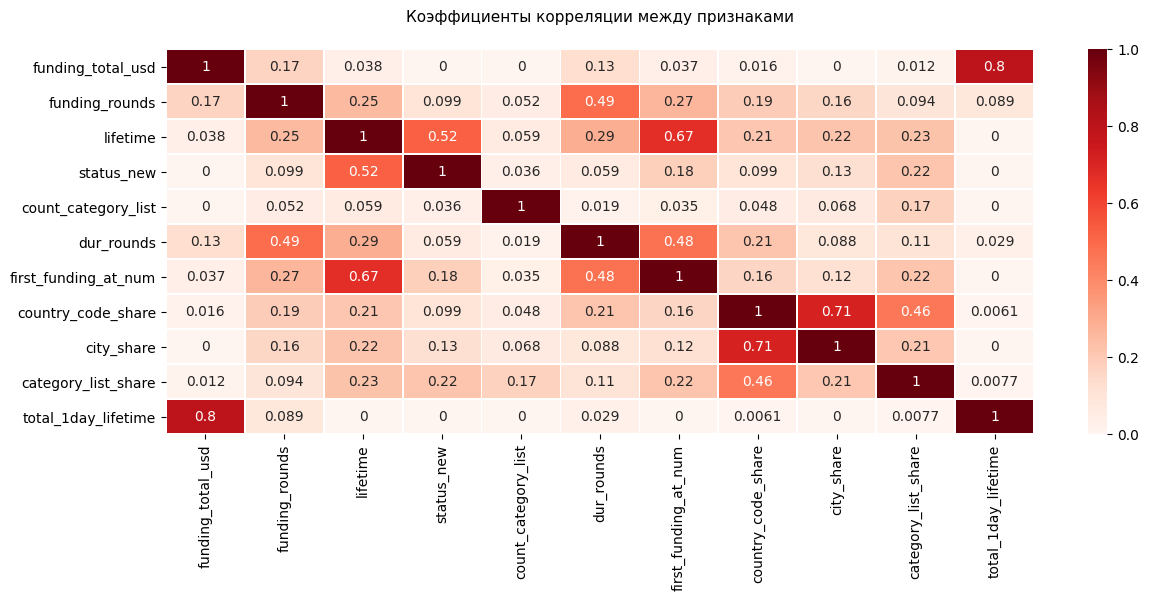

In [133]:
# –∑–∞–¥–∞–µ–º —Ä–∞–∑–º–µ—Ä –∏ —á–µ—Ç–∫–æ—Å—Ç—å-–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–æ—á–µ–∫ –Ω–∞ –¥—é–π–º
plt.figure(dpi=100, figsize=(14,5))
# –ó–∞–≥–æ–ª–æ–≤–æ–∫
plt.title('–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏', y=1.05, fontsize=11);
# –ø–æ–¥–ø–∏—Å—å –ø–æ –æ—Å—è–º

interval_cols = df.select_dtypes(include='number').columns.tolist() # —á–∏—Å–ª–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã

sns.heatmap(df.phik_matrix(interval_cols=interval_cols), linewidth=0.5, cmap='Reds', annot=True);

**`–ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–º–µ—é—Ç –Ω–∞–∏–±–æ–ª–µ–µ —Å–∏–ª—å–Ω—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é —Å —Ü–µ–ª–µ–≤—ã–º - —Å–æ —Å—Ç–∞—Ç—É—Å–æ–º —Å—Ç–∞—Ä—Ç–∞–ø–∞.`**    
**–ü–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏ –ø–æ [—à–∫–∞–ª–µ –ß–µ–¥–¥–æ–∫–∞](https://math.semestr.ru/corel/cheddok.php):**     
**–í–µ—Å—å–º–∞ –≤—ã—Å–æ–∫–∞—è (0.9-1):**      
- –Ω–µ—Ç.     
**–í—ã—Å–æ–∫–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è (0.7-0.9):**       
- –Ω–µ—Ç.     
**–ó–∞–º–µ—Ç–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è (0.5-0.7):**             
- –º–µ–∂–¥—É —Å—Ç–∞—Ç—É—Å–æ–º —Å—Ç–∞—Ä—Ç–∞–ø–∞ –∏ –≤—Ä–µ–º–µ–Ω–µ–º –∂–∏–∑–Ω–∏ —Å—Ç–∞—Ä—Ç–∞–ø–∞ (–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ 0.52).                  
**–£–º–µ—Ä–µ–Ω–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è (0.3-0.5):**               
- –Ω–µ—Ç.    
**–°–ª–∞–±–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è (0.1-0.3):**                  
- –º–µ–∂–¥—É —Å—Ç–∞—Ç—É—Å–æ–º —Å—Ç–∞—Ä—Ç–∞–ø–∞ –∏ –¥–æ–ª–µ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ (–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ 0.22).   
- –º–µ–∂–¥—É —Å—Ç–∞—Ç—É—Å–æ–º —Å—Ç–∞—Ä—Ç–∞–ø–∞ –∏ —á–∏—Å–ª–æ–≤—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –ø–µ—Ä–≤–æ–≥–æ –¥–Ω—è —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è –ø—Ä–æ–µ–∫—Ç–∞ (–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ 0.18).    
- –º–µ–∂–¥—É —Å—Ç–∞—Ç—É—Å–æ–º —Å—Ç–∞—Ä—Ç–∞–ø–∞ –∏ –¥–æ–ª–µ–π –≥–æ—Ä–æ–¥–∞ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ —Å—Ç–∞—Ä—Ç–∞–ø–∞ (–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ 0.13).   
**–ü—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç (0-0.1):**                  
- –æ—Å—Ç–∞–≤—à–∏–µ—Å—è –ø—Ä–∏–∑–Ω–∞–∫–∏.             

**–ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫ —Å–≤—è–∑–∞–Ω—ã –º–µ–∂–¥—É —Å–æ–±–æ–π –≤—Ö–æ–¥–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏.**  
**–í–µ—Å—å–º–∞ –≤—ã—Å–æ–∫–∞—è (0.9-1):**      
- –Ω–µ—Ç.

**–ú—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∞ (–ª–∏–Ω–µ–π–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É –≤—Ö–æ–¥–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏).**

## –ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–æ–¥–æ–ª–∂–µ–Ω–∏—è –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Å—Ç–∞—Ä—Ç–∞–ø–∞

### –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ CatBoostClassifier –±–µ–∑ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –∏ –ø–æ–∏—Å–∫–∞ –ø–æ —Å–µ—Ç–∫–µ

**–†–∞–∑–æ–±—ä–µ–º –Ω–∞—à –¥–∞—Ç–∞—Ñ—Ä–µ–π–º df –Ω–∞ 3 —á–∞—Å—Ç–∏: –æ–±—É—á–∞—é—â—É—é, –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é. –ï—Å–ª–∏ –Ω–∞—Å —É—Å—Ç—Ä–æ–∏—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç, —Ç–æ –≤–ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏–∏ –º—ã –æ–±—É—á–∏–º –º–æ–¥–µ–ª—å –Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö.**

In [134]:
# —Ä–∞–∑–±–∏–µ–Ω–∏–µ —Å —É—á–µ—Ç–æ–º –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞ –∫–ª–∞—Å—Å–æ–≤
train, test = train_test_split(df,train_size=0.6,random_state=RANDOM_STATE,stratify=df['status_new'])
val, test = train_test_split(test,train_size=0.5,random_state=RANDOM_STATE,stratify=test['status_new'])

In [135]:
train.shape, val.shape, test.shape

((31504, 11), (10502, 11), (10502, 11))

In [136]:
df.drop(columns={'status_new'}).select_dtypes(include='number').columns.tolist()

['funding_total_usd',
 'funding_rounds',
 'lifetime',
 'count_category_list',
 'dur_rounds',
 'first_funding_at_num',
 'country_code_share',
 'city_share',
 'category_list_share',
 'total_1day_lifetime']

In [137]:
# —Å–ø–∏—Å–æ–∫ —Å –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –∫—Ä–æ–º–µ —Ü–µ–ª–µ–≤–æ–≥–æ
X = ['funding_total_usd',
 'funding_rounds',
 'lifetime',
 'count_category_list',
 'dur_rounds', 
 'first_funding_at_num',
 'country_code_share',
 'city_share',
 'category_list_share',
 'total_1day_lifetime'
    ]
# —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫
y = ['status_new']

In [138]:
#—Å–æ–∑–¥–∞–Ω–∏–µ –ø—É–ª–æ–≤ –¥–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö, –≤–∞–ª–∏–¥–∞—Ü., —Ç–µ—Å—Ç–æ–≤. –¥–∞–Ω–Ω—ã—Ö
train_data = Pool(data=train[X],
                  label=train[y],
                 )

valid_data = Pool(data=val[X],
                  label=val[y],
                 )

test_data = Pool(data=test[X],
                  label=test[y],
                 )

In [139]:
# –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –º–æ–¥–µ–ª–∏
params = {'verbose':100,
          'eval_metric':'F1',
          'loss_function': 'Logloss',
          'random_seed':RANDOM_STATE,
          'learning_rate':0.017
       # –º–æ–∂–Ω–æ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –∏ –¥—Ä.–≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã   
       #  'l2_leaf_reg':7,
       #   'od_type':"Iter",
       #   'od_wait':75,
        #'auto_class_weights':'Balanced',
         #   'depth':6
        }

In [140]:
model = CatBoostClassifier(**params)
model.fit(train_data, eval_set=valid_data)

0:	learn: 0.7352049	test: 0.7453833	best: 0.7453833 (0)	total: 154ms	remaining: 2m 33s
100:	learn: 0.8233243	test: 0.8298611	best: 0.8303416 (92)	total: 1.14s	remaining: 10.2s
200:	learn: 0.8513208	test: 0.8539326	best: 0.8539326 (198)	total: 2.19s	remaining: 8.69s
300:	learn: 0.8571429	test: 0.8592179	best: 0.8592179 (281)	total: 3.24s	remaining: 7.52s
400:	learn: 0.8642390	test: 0.8619154	best: 0.8628763 (367)	total: 4.21s	remaining: 6.29s
500:	learn: 0.8671016	test: 0.8655230	best: 0.8655230 (500)	total: 5.2s	remaining: 5.18s
600:	learn: 0.8716806	test: 0.8669244	best: 0.8675497 (593)	total: 6.24s	remaining: 4.14s
700:	learn: 0.8756016	test: 0.8687982	best: 0.8700441 (663)	total: 7.21s	remaining: 3.08s
800:	learn: 0.8798671	test: 0.8715697	best: 0.8720483 (786)	total: 8.17s	remaining: 2.03s
900:	learn: 0.8846012	test: 0.8763676	best: 0.8763676 (896)	total: 9.14s	remaining: 1s
999:	learn: 0.8880734	test: 0.8769820	best: 0.8774617 (914)	total: 10.1s	remaining: 0us

bestTest = 0.877461

**–ü–æ–ª—É—á–∏–ª–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ –º–µ—Ç—Ä–∏–∫—É f1 = 0.87 –Ω–∞ 915 –∏—Ç–µ—Ä–∞—Ü–∏–∏.**

In [141]:
n_iters = model.best_iteration_ + 1 

In [142]:
params = {
    'iterations':n_iters,
          'verbose':100,
          'eval_metric':'F1',
          'loss_function': 'Logloss',
          'random_seed':RANDOM_STATE,
          'learning_rate':0.017
       # –º–æ–∂–Ω–æ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –∏ –¥—Ä.–≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã   
       #  'l2_leaf_reg':7,
       #   'od_type':"Iter",
       #   'od_wait':75,
        #'auto_class_weights':'Balanced',
         #   'depth':6
        }

In [143]:
# —Å –ª—É—á—à–∏–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–º iterations
model = CatBoostClassifier(**params)

In [144]:
# –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –æ–±—É—á–∞—é—â–µ–≥–æ –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–≥–æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–æ–≤ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –Ω–∞ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö
train_full = pd.concat([train,val])

In [145]:
# —Å–æ–∑–¥–∞–Ω–∏–µ –ø—É–ª–∞, —Å–æ–¥–µ—Ä–∂–∞—â–µ–≥–æ –¥–∞–Ω–Ω—ã–µ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
train_full_data = Pool(train_full[X],
                       label=train_full[y]
                       )

In [146]:
# –æ–±—É—á–µ–Ω–∏–µ –Ω–∞ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
model.fit(train_full_data, eval_set=test_data)

0:	learn: 0.7402387	test: 0.7393586	best: 0.7393586 (0)	total: 15.8ms	remaining: 14.5s
100:	learn: 0.8262001	test: 0.8378534	best: 0.8378534 (98)	total: 1.07s	remaining: 8.63s
200:	learn: 0.8520141	test: 0.8655037	best: 0.8655037 (196)	total: 2.12s	remaining: 7.53s
300:	learn: 0.8629811	test: 0.8775056	best: 0.8779944 (294)	total: 3.17s	remaining: 6.47s
400:	learn: 0.8671133	test: 0.8821251	best: 0.8826135 (376)	total: 4.22s	remaining: 5.41s
500:	learn: 0.8705817	test: 0.8823854	best: 0.8826135 (376)	total: 5.34s	remaining: 4.42s
600:	learn: 0.8745669	test: 0.8842337	best: 0.8848485 (591)	total: 6.44s	remaining: 3.37s
700:	learn: 0.8776103	test: 0.8869374	best: 0.8879121 (642)	total: 7.56s	remaining: 2.31s
800:	learn: 0.8808834	test: 0.8881579	best: 0.8886451 (776)	total: 8.7s	remaining: 1.24s
900:	learn: 0.8836569	test: 0.8875480	best: 0.8886451 (776)	total: 9.75s	remaining: 151ms
914:	learn: 0.8837209	test: 0.8875480	best: 0.8886451 (776)	total: 9.9s	remaining: 0us

bestTest = 0.8886

**–ü–æ–ª—É—á–∏–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –º–µ—Ç—Ä–∏–∫—É f1 = 0.889 –Ω–∞ 776 –∏—Ç–µ—Ä–∞—Ü–∏–∏.**

**–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –æ—Ç—á–µ—Ç –ø–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.**

In [147]:
print(classification_report(test['status_new'],model.predict(test_data)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9519
           1       0.96      0.82      0.89       983

    accuracy                           0.98     10502
   macro avg       0.97      0.91      0.94     10502
weighted avg       0.98      0.98      0.98     10502



**–¢–µ–ø–µ—Ä—å, –µ—Å–ª–∏ –Ω–∞—Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç —É—Å—Ç—Ä–∞–∏–≤–∞–µ—Ç, –º—ã –º–æ–∂–µ–º –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å –Ω–∞ –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–µ. –ò –ø–æ—Å—á–∏—Ç–∞—Ç—å f1.**

In [148]:
# –æ–±—ä–µ–¥–∏–Ω—è–µ–º –≤—Å–µ –¥–∞–Ω–Ω—ã–µ
train_full_full = pd.concat([train_full, test])

In [149]:
#—Ñ–æ—Ä–º–∏—Ä—É–µ–º –ø—É–ª –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
train_full_full_data = Pool(train_full_full[X],
                       label=train_full_full[y]
                       )

In [150]:
params = {
    'iterations':777,
          'verbose':100,
          'eval_metric':'F1',
          'loss_function': 'Logloss',
          'random_seed':RANDOM_STATE,
          'learning_rate':0.017
}

In [151]:
# —Å –ª—É—á—à–∏–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–º iterations
model = CatBoostClassifier(**params)
# –æ–±—É—á–µ–Ω–∏–µ –Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö
model.fit(train_full_full_data)

0:	learn: 0.7897249	total: 13.9ms	remaining: 10.8s
100:	learn: 0.8299052	total: 1.14s	remaining: 7.64s
200:	learn: 0.8558853	total: 2.26s	remaining: 6.47s
300:	learn: 0.8648830	total: 3.37s	remaining: 5.33s
400:	learn: 0.8705725	total: 4.5s	remaining: 4.21s
500:	learn: 0.8743072	total: 5.74s	remaining: 3.16s
600:	learn: 0.8790189	total: 6.87s	remaining: 2.01s
700:	learn: 0.8820739	total: 8.06s	remaining: 873ms
776:	learn: 0.8844077	total: 8.95s	remaining: 0us


**–ü–æ–ª—É—á–∏–ª–∏ f1 –Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö 0.88.**

**–¢–æ –µ—Å—Ç—å –º—ã –º–æ–∂–µ–º –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞—Ç—å, —Ç–∞–∫ –∫–∞–∫ –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ kaggle_test_number —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–µ —Å–∏–ª—å–Ω–æ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –æ–±—É—á–∞—é—â–µ–π, —Ç–æ –º–µ—Ç—Ä–∏–∫–∞ f1 –æ–∂–∏–¥–∞–µ—Ç—Å—è –ø—Ä–∏–º–µ—Ä–Ω–æ —Ä—è–¥–æ–º —Å 0.88.** 

**–í–æ–∑–Ω–∏–∫–∞–µ—Ç –≤–æ–ø—Ä–æ—Å: –∫–∞–∫ —É–ª—É—á—à–∏—Ç—å –µ—â–µ –º–µ—Ç—Ä–∏–∫—É?**    
–í–æ–∑–º–æ–∂–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã: 
* –ø–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–µ–π,   
* –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–æ–≤—ã—Ö —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏—Ö —Å—Ç–æ–ª–±—Ü–æ–≤,  
* –ø–æ–¥–±–æ—Ä –ø–æ—Ä–æ–≥–∞ –¥–ª—è —Å–∫–æ—Ä–æ–≤,    
* –≤–∞—Ä–∏–∞–Ω—Ç –≤–∑–≤–µ—à–∏–≤–∞–Ω–∏—è –∫–ª–∞—Å—Å–æ–≤ –≤—Ä—É—á–Ω—É—é —á–µ—Ä–µ–∑ ADASYN (–ø–æ–º–æ–≥–∞–µ—Ç –æ–±—É—á–∏—Ç—å—Å—è –Ω–∞ –≥—Ä–∞–Ω–∏—Ü–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –∫–ª–∞—Å—Å–æ–≤) –ª–∏–±–æ SMOTETomek (–æ–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ oversampling –∏ undersampling),  
* –¥—Ä—É–≥–∞—è –º–æ–¥–µ–ª—å, –Ω–∞–ø—Ä–∏–º–µ—Ä, SVC, RandomForestClassifier.
* –≤–æ–∑–º–æ–∂–Ω–æ, –∑–∞–ø–æ–ª–Ω–∏—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ –¥—Ä—É–≥–∏–º –æ–±—Ä–∞–∑–æ–º.
* –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –ø—Ä–æ–∏–∑–≤–µ—Å—Ç–∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—é —á–µ—Ä–µ–∑ Optuna.
* –∏–∑–º–µ–Ω–∏—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤–æ–µ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ, –Ω–∞–ø—Ä–∏–º–µ—Ä, —É–¥–∞–ª–∏—Ç—å –Ω–µ–≤–∞–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏,
* –∏–∑–º–µ–Ω–∏—Ç—å –æ–±—ä–µ–∫—Ç—ã –≤ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ, –Ω–∞–ø—Ä–∏–º–µ—Ä, —É–¥–∞–ª–∏—Ç—å —á–∞—Å—Ç—å —Å—Ç—Ä–æ–∫, –∫–æ—Ç–æ—Ä—ã–µ –º–µ—à–∞—é—Ç –ø—Ä–æ—Ü–µ—Å—Å—É –æ–±—É—á–µ–Ω–∏—è, —Ç–æ –µ—Å—Ç—å –∏—Ö –º–æ–∂–Ω–æ —É–¥–∞–ª—è—Ç—å, –µ—Å–ª–∏ —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –¥–∞–Ω–Ω—ã—Ö –ø—Ä–∏ —ç—Ç–æ–º —Å—Ç–∞–Ω—É—Ç –±–æ–ª–µ–µ –ø–æ—Ö–æ–∂–∏.  

### CatBoostClassifier —Å RandomizedSearchCV

**–ü–æ–¥–±–µ—Ä–µ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ —Å–æ —Å–ª—É—á–∞–π–Ω—ã–º –ø–æ–∏—Å–∫–æ–º –ø–æ —Å–µ—Ç–∫–µ.**

–ß—Ç–æ–±—ã —É–∑–Ω–∞—Ç—å –≤—Å–µ –≤–æ–∑–º–æ–∂–Ω—ã–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã, –Ω–µ–µ–æ–±—Ö–æ–¥–∏–º–æ –≤—ã–∑–≤–∞—Ç—å –∫–æ–º–∞–Ω–¥—É model.get_all_params().

In [152]:
#—Å–ø–∏—Å–æ–∫ —á–∏—Å–ª–æ–≤—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤
df.drop(columns={'status_new'}).select_dtypes(include='number').columns.tolist()

['funding_total_usd',
 'funding_rounds',
 'lifetime',
 'count_category_list',
 'dur_rounds',
 'first_funding_at_num',
 'country_code_share',
 'city_share',
 'category_list_share',
 'total_1day_lifetime']

In [153]:
# —Å–ø–∏—Å–æ–∫ —Å –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –∫—Ä–æ–º–µ —Ü–µ–ª–µ–≤–æ–≥–æ
X = ['funding_total_usd',
 'funding_rounds',
 'lifetime',
 'count_category_list',
 'dur_rounds', 
 'first_funding_at_num',
 'country_code_share',
 'city_share',
 'category_list_share',
 'total_1day_lifetime'
    ]
# —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫
y = ['status_new']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], stratify=df[y], test_size=0.1,random_state=42)

In [155]:
params = {       
# –∑–∞–∫–æ–º–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–ª–∞ —á–∞—Å—Ç—å –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –º–æ–∂–Ω–æ —Ä–∞—Å–∫–æ–º–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å –∏ –¥–µ–ª–∞—Ç—å –±–æ–ª–µ–µ —à–∏—Ä–æ–∫–∏–π –ø–æ–∏—Å–∫ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
#    'iterations': randint(1000, 2000),
    'learning_rate': [0.03, 0.04, 0.05]
#    'depth': randint(5, 10),
#    'learning_rate': uniform(0.02,0.06),
#    'l2_leaf_reg': randint(3, 10),
#   'border_count': randint(100, 300),
#    'bagging_temperature': uniform(0.2,0.81),
#    'od_wait'=[20, 30, 40, 50, 60, 70]
}
pp={
    #'iterations': 2000,
    'bagging_temperature': 0.4,
    'border_count': 232,
    'depth': 7,
    'l2_leaf_reg': 3,
    'random_seed':RANDOM_STATE,
    'loss_function':'Logloss', 
    'od_type':'Iter', 
   #   'od_wait':75,
   #'auto_class_weights':'Balanced',
     'verbose':False
   #'use_best_model':True
   }

model = CatBoostClassifier(**pp)

search = GridSearchCV(model, params, scoring='f1')
#search = RandomizedSearchCV(model, param_distributions=params, n_iter=3, scoring='f1')

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏, –ø–æ–∏—Å–∫ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
search.fit(X_train, y_train, eval_set=(X_test, y_test))

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x00000231EDA48550>,
             param_grid={'learning_rate': [0.03, 0.04, 0.05]}, scoring='f1')

In [156]:
search.best_params_ # –ª—É—á—à–∏–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã

{'learning_rate': 0.03}

In [157]:
predictions=search.predict(X_test)

In [158]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [159]:
search.best_estimator_ #–ª—É—á—à–∞—è –º–æ–¥–µ–ª—å

In [160]:
model=search.best_estimator_ #–∑–∞–ø–æ–º–∏–Ω–∞–µ–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å

In [161]:
print(classification_report(y_test, predictions)) #–æ—Ç—á–µ—Ç –ø–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4759
           1       0.93      0.82      0.87       492

    accuracy                           0.98      5251
   macro avg       0.96      0.91      0.93      5251
weighted avg       0.98      0.98      0.98      5251



**–û–±—ä–µ–¥–∏–Ω–∏–º –æ–±—É—á–∞—é—â–∏–π –∏ —Ç–µ—Å—Ç–æ–≤—ã–π –¥–∞—Ç–∞—Å–µ—Ç—ã –∏ –æ–±—É—á–∏–º –º–æ–¥–µ–ª—å –Ω–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã—Ö –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞—Ö.**

In [162]:
n_iters = model.best_iteration_ + 1 

In [163]:
pp={
    'iterations': n_iters,
    'learning_rate': 0.03,   #–Ω–∞–π–¥–µ–Ω–Ω–Ω–æ–µ –æ–ø—Ç–∏–º. –∑–Ω–∞—á–µ–Ω–∏–µ
    'bagging_temperature': 0.4,
    'border_count': 232,
    'depth': 7,
    'l2_leaf_reg': 3,
    'random_seed':42,
    'loss_function':'Logloss', 
    'od_type':'Iter', 
   #   'od_wait':75,
   #'auto_class_weights':'Balanced',
  #   'verbose':False
  
   }

In [164]:
# –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –æ–±—É—á–∞—é—â–µ–≥–æ –∏ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–æ–≤ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –Ω–∞ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö
full_X = pd.concat([X_train, X_test])
full_y = pd.concat([y_train, y_test])

In [165]:
model = CatBoostClassifier(**pp,eval_metric='F1', verbose=100)

In [166]:
# –æ–±—É—á–µ–Ω–∏–µ –Ω–∞ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
model.fit(full_X, full_y)

0:	learn: 0.7831209	total: 17.6ms	remaining: 13.3s
100:	learn: 0.8576581	total: 1.81s	remaining: 11.8s
200:	learn: 0.8736245	total: 3.09s	remaining: 8.54s
300:	learn: 0.8822166	total: 4.43s	remaining: 6.72s
400:	learn: 0.8861010	total: 5.91s	remaining: 5.24s
500:	learn: 0.8906456	total: 7.22s	remaining: 3.69s
600:	learn: 0.8948232	total: 8.6s	remaining: 2.23s
700:	learn: 0.8989083	total: 10.4s	remaining: 830ms
756:	learn: 0.9006868	total: 11.2s	remaining: 0us


**–ú–µ—Ç—Ä–∏–∫–∞ f1=0.9 –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ.**

**–°–¥–µ–ª–∞–µ–º –ø—Ä–æ–≥–Ω–æ–∑ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ kaggle_test.**

In [167]:
model.predict(kaggle_test_number)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [168]:
# –¥–æ–±–∞–≤–ª—è–µ–º —Å—Ç–æ–ª–±–µ—Ü status –≤ –¥–∞—Ç–∞—Å–µ—Ç kaggle_test_number
kaggle_test_number['status'] = model.predict(kaggle_test_number)
kaggle_test_number.head()

funding_total_usd  funding_rounds  lifetime  \
name                                                                
Crystalsol                    2819200.0               1      3501   
ALUHEAT                       2486835.0               1      3267   
Airsynergy                    2573200.0               1      2034   
Red Ambiental                20000000.0               1      2192   
Wheego Electric Cars          5000000.0               2      4217   

                      count_category_list  dur_rounds  first_funding_at_num  \
name                                                                          
Crystalsol                             18           1                 14426   
ALUHEAT                                18           1                 14848   
Airsynergy                             18           1                 16128   
Red Ambiental                          18           1                 14054   
Wheego Electric Cars                   18        1220                 13514   

                      country_code_share  city_share  category_list_share  \
name                                                                        
Crystalsol                      0.000076    0.120914             0.017829   
ALUHEAT                         0.105295    0.120914             0.017829   
Airsynergy                      0.105295    0.120914             0.017829   
Red Ambiental                   0.105295    0.120914             0.017829   
Wheego Electric Cars            0.105295    0.120914             0.017829   

                      total_1day_lifetime  status  
name                                               
Crystalsol                     805.255641       0  
ALUHEAT                        761.198347       0  
Airsynergy                    1265.093412       0  
Red Ambiental                 9124.087591       1  
Wheego Electric Cars          1185.677022       0

**–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –æ–±—Ä–∞–∑–µ—Ü —Ç–æ–≥–æ, –∫–∞–∫ –¥–æ–ª–∂–µ–Ω –≤—ã–≥–ª—è–¥–µ—Ç—å —Å—Ç–æ–ª–±–µ—Ü.**

In [169]:
df_sample = pd.read_csv('kaggle_startups_sample_submit_28062024.csv')
df_sample 

name     status
0                  Crystalsol     closed
1            JBI Fish & Wings  operating
2                    COINPLUS     closed
3      Imagine Communications     closed
4                       DNA13  operating
...                       ...        ...
13120                   Jymob  operating
13121               GlobaTrek  operating
13122                Inkd.com     closed
13123                  AdWill  operating
13124             RingCentral  operating

[13125 rows x 2 columns]

**–ù–∞–º –Ω–∞–¥–æ –æ–±–µ—Å–ø–µ—á–∏—Ç—å —Ç–æ—Ç –∂–µ –ø–æ—Ä—è–¥–æ–∫ —Å–ª–µ–¥–æ–≤–∞–Ω–∏—è —Å—Ç—Ä–æ–∫, –∫–∞–∫ –∏ –≤ –æ–±—Ä–∞–∑—Ü–µ `df_sample`. –ü–æ—ç—Ç–æ–º—É –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–∞—Ç–∞—Å–µ—Ç `df_sample`, —É–¥–∞–ª–∏–º –∏–∑ –Ω–µ–≥–æ —Å—Ç–æ–ª–±–µ—Ü `status`, –∑–∞—Ç–µ–º –æ–±–µ–¥–∏–Ω–∏–º `df_sample` —Å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è–º–∏ `kaggle_test_number[['status']]` –ø–æ –∏–Ω–¥–µ–∫—Å—É `name`. –≤ —Å—Ç–æ–ª–±—Ü–µ `status` –æ–±–µ—Å–ø–µ—á–∏–º –≤–æ–∑–º–æ–∂–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã –æ—Ç–≤–µ—Ç–æ–≤: 'operating', 'closed'.**

In [170]:
df_sample = df_sample.drop('status', axis=1)
df_sample = df_sample.reset_index()
df_sample = df_sample.set_index('name')
df_sample = df_sample.join(kaggle_test_number[['status']])
df_sample = df_sample.sort_values('index')
df_sample = df_sample.reset_index().drop('index', axis=1)
df_sample['status'] = df_sample['status'].map({0:'operating', 1:'closed'})
df_sample

name     status
0                  Crystalsol  operating
1            JBI Fish & Wings  operating
2                    COINPLUS  operating
3      Imagine Communications  operating
4                       DNA13  operating
...                       ...        ...
13120                   Jymob  operating
13121               GlobaTrek  operating
13122                Inkd.com  operating
13123                  AdWill  operating
13124             RingCentral  operating

[13125 rows x 2 columns]

**–î–ª—è –∑–∞–ø–∏—Å–∏ –≤ —Ñ–∞–π–ª –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –≤—ã–ø–æ–ª—å–Ω–∏—Ç—å –∫–æ–º–∞–Ω–¥—É: `df_sample.to_csv('catboost_predict.csv',index=False)`. –î–ª—è –ø—Ä–æ—Å–º–æ—Ç—Ä–∞ —Ç–µ–∫—É—â–µ–π –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–∏, –∫—É–∂–¥–∞ –∑–∞–ø–∏—Å–∞–ª—Å—è —Ñ–∞–π–ª, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –≤—ã–ø–æ–ª–Ω–∏—Ç—å –∫–æ–º–∞–Ω–¥—É `pwd`.**

In [171]:
# df_sample.to_csv('catboost_predict.csv',index=False)

## –ê–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [172]:
model.feature_importances_

array([ 3.44008105,  1.34920476, 40.5923454 ,  3.64222851,  3.75787065,
       29.05421056,  3.45336949,  5.23766865,  5.46657436,  4.00644657])

In [173]:
df_feature_importance = model.get_feature_importance(prettified=True)
df_feature_importance

Feature Id  Importances
0              lifetime    40.592345
1  first_funding_at_num    29.054211
2   category_list_share     5.466574
3            city_share     5.237669
4   total_1day_lifetime     4.006447
5            dur_rounds     3.757871
6   count_category_list     3.642229
7    country_code_share     3.453369
8     funding_total_usd     3.440081
9        funding_rounds     1.349205

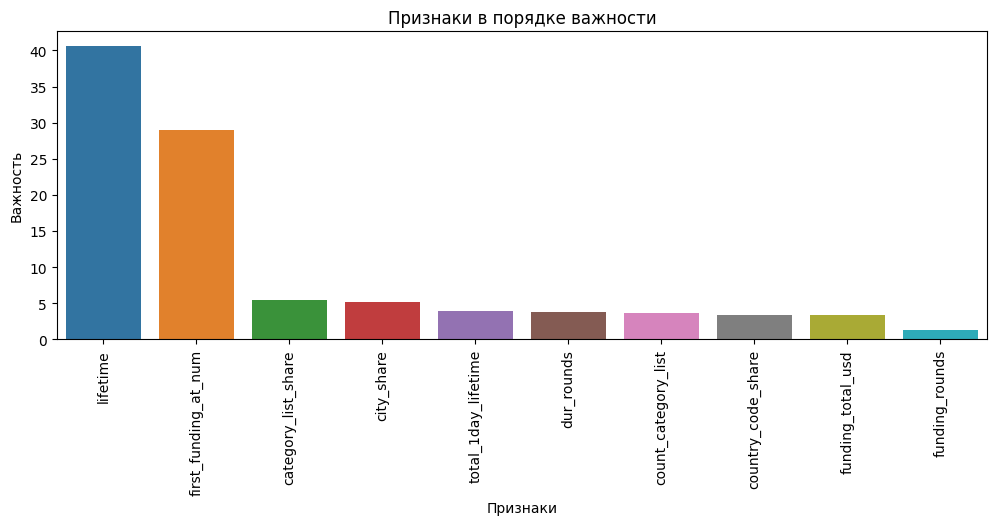

In [174]:
plt.figure(figsize=(12,4))
sns.barplot(data=df_feature_importance, x=df_feature_importance['Feature Id'], y=df_feature_importance['Importances'])
plt.xticks(rotation=90);
plt.title('–ü—Ä–∏–∑–Ω–∞–∫–∏ –≤ –ø–æ—Ä—è–¥–∫–µ –≤–∞–∂–Ω–æ—Å—Ç–∏');
plt.xlabel('–ü—Ä–∏–∑–Ω–∞–∫–∏');
plt.ylabel('–í–∞–∂–Ω–æ—Å—Ç—å');

**–ù–∞–∏–±–æ–ª–µ–µ –≤–∞–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: –≤—Ä–µ–º—è —Å—É—â–µ—Å—Ç–≤–æ–≤–∞–Ω–∏—è —Å—Ç–∞—Ä—Ç–∞–ø–∞, –ø–µ—Ä–≤–∞—è –¥–∞—Ç–∞ —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è —Å—Ç–∞—Ä—Ç–∞–ø–∞. –ù–∞–∏–º–µ–Ω–µ–µ –≤–∞–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞—É–Ω–¥–æ–≤.**

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø–æ–º–æ—â—å—é shap.

100%|===================| 5230/5251 [03:20<00:00]        

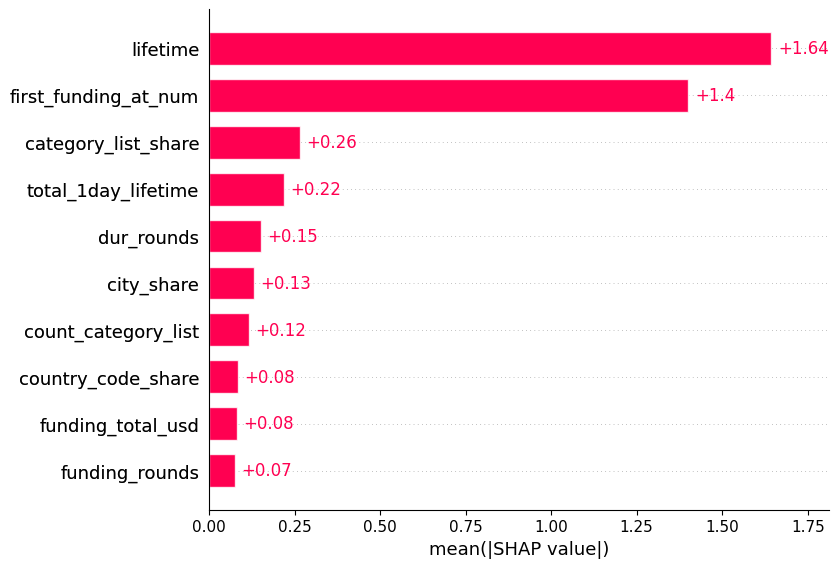

In [175]:
shap.initjs() # –¥–ª—è –∫—Ä–∞—Å–∏–≤–æ–π –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ shap
# –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –æ–±—ä–µ–∫—Ç–∞
explainer = shap.TreeExplainer(model, X_test[X])
# –≤—ã—á–∏—Å–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π –®–µ–ø–ª–∏ –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
shap_values_test = explainer(X_test[X])
shap.plots.bar(shap_values_test)

–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ shap –∏ catboost –∏–º–µ—é—Ç –æ—Ç–ª–∏—á–∏—è –≤ –æ—Ü–µ–Ω–∫–µ –≤–∞–∂–Ω–æ—Å—Ç–∏ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, —á—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ä–∞–∑–Ω—ã–º–∏ –ø–æ–¥—Ö–æ–¥–∞–º–∏ –∫ –æ—Ü–µ–Ω–∫–µ. 

**–ê–Ω–∞–ª–∏–∑ –º–æ–¥–µ–ª–∏ —Å –ø–æ–º–æ—â—å—é Shap**

–û–¥–Ω–æ–∑–Ω–∞—á–Ω—É—é –æ—Ü–µ–Ω–∫—É –≤–∫–ª–∞–¥–∞ –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤ –∫–∞–∂–¥—ã–π –ø—Ä–æ–≥–Ω–æ–∑ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç –∑–Ω–∞—á–µ–Ω–∏—è –®–µ–ø–ª–∏, –∏—Ö –æ—Ü–µ–Ω–∏–≤–∞—é—Ç –º–µ—Ç–æ–¥–æ–º SHAP (SHapley Additive exPlanations). –û–Ω –≤—ã—á–∏—Å–ª—è–µ—Ç, –∫–∞–∫ –æ—Ç–¥–µ–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –ø–æ–º–æ–≥ –ø—Ä–∏—Å–≤–æ–∏—Ç—å –º–æ–¥–µ–ª–∏ –∏—Ç–æ–≥–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–≥–æ.

–ó–Ω–∞—á–µ–Ω–∏–µ –®–µ–ø–ª–∏ –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞—é—Ç –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –æ—Ç–¥–µ–ª—å–Ω–æ–≥–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è –≤ –≤—ã–±–æ—Ä–∫–µ. –î–ª—è —ç—Ç–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º SHAP –∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ—Ç –≤—Å–µ –≤–æ–∑–º–æ–∂–Ω—ã–µ –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –≤—ã—è–≤–ª—è–µ—Ç –≤–∫–ª–∞–¥ –∫–∞–∂–¥–æ–≥–æ –∏–∑ –Ω–∏—Ö –≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è. –ï—Å–ª–∏ –≤–∞–º –Ω—É–∂–Ω–æ —É–∑–Ω–∞—Ç—å –≤–∫–ª–∞–¥ –ø—Ä–∏–∑–Ω–∞–∫–∞ –Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö, —Ç–æ SHAP –º–æ–∂–µ—Ç –∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞—Ç—å –∏–Ω–¥–∏–≤–∏–¥—É–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –®–µ–ø–ª–∏: –≤—ã—Å—á–∏—Ç–∞–µ—Ç —Å—Ä–µ–¥–Ω–µ–µ –º–æ–¥—É–ª–µ–π –∫–∞–∂–¥–æ–≥–æ –∏–∑ –Ω–∏—Ö –∏–ª–∏ —Å—É–º–º–∏—Ä—É–µ—Ç –∏—Ö –ø–æ –º–æ–¥—É–ª—é.    
–ó–Ω–∞—á–µ–Ω–∏—è –®–µ–ø–ª–∏ —Ç—Ä–µ–±—É—é—Ç –±–æ–ª—å—à–æ–π –º–æ—â–∏ –∫–æ–º–ø—å—é—Ç–µ—Ä–∞, –ø–æ—ç—Ç–æ–º—É –¥–ª—è –∏—Ö —Ä–∞—Å—á—ë—Ç–∞ –∏—Å–ø–æ–ª—å–∑—É—é—Ç –∞–ª–≥–æ—Ä–∏—Ç–º—ã –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –≤—ã—á–∏—Å–ª–µ–Ω–∏–π. 

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≥—Ä–∞—Ñ–∏–∫ summary_plot, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, –∫—É–¥–∞ –∫–∞–∂–¥—ã–π –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–≤–∏–≥–∞–µ—Ç —Ñ–∏–Ω–∞–ª—å–Ω—ã–π –ø—Ä–µ–¥–∏–∫—Ç: –≤ —Å—Ç–æ—Ä–æ–Ω—É –∫–ª–∞—Å—Å–∞ 0 –∏–ª–∏ –∫–ª–∞—Å—Å–∞ 1.

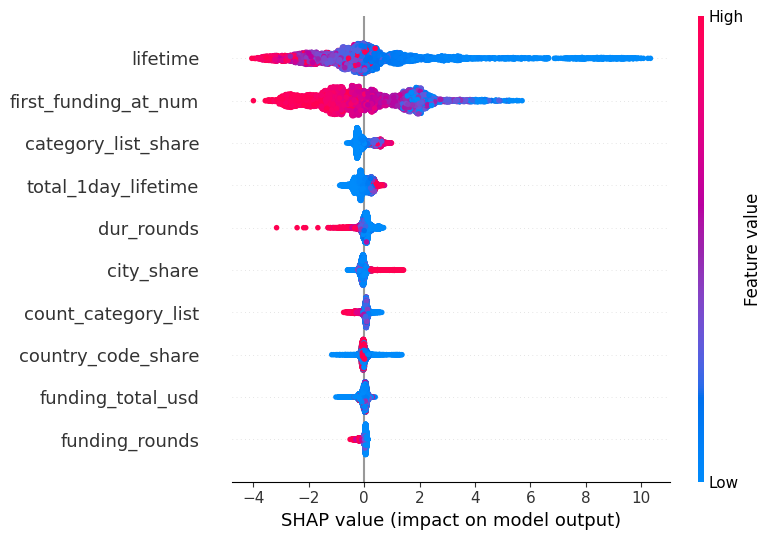

In [176]:
shap.summary_plot(shap_values_test, X_test)

–≠—Ç–æ –æ–¥–∏–Ω –∏–∑ –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –≤–∫–ª–∞–¥–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –∫–∞–∂–¥–æ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏. –ù–∞ –≥—Ä–∞—Ñ–∏–∫–µ —Ç–æ—á–∫–∞–º–∏ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω—ã –≤—Å–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è –∏–∑ –≤—ã–±–æ—Ä–∫–∏.
–ù–∞ –æ—Å–∏ ùëã –æ—Ç–ª–æ–∂–µ–Ω—ã –∑–Ω–∞—á–µ–Ω–∏—è –®–µ–ø–ª–∏, –Ω–∞ –æ—Å–∏ ùëå ‚Äî –ø—Ä–∏–∑–Ω–∞–∫–∏ –º–æ–¥–µ–ª–∏.

**–ö–∞–∫ —á–∏—Ç–∞—Ç—å —ç—Ç–æ—Ç –≥—Ä–∞—Ñ–∏–∫:**        
* –û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –®–µ–ø–ª–∏ –æ–∑–Ω–∞—á–∞—é—Ç, —á—Ç–æ –ø—Ä–∏–∑–Ω–∞–∫ —Å–∫–ª–æ–Ω—è–µ—Ç –º–æ–¥–µ–ª—å –æ—Ç–Ω–µ—Å—Ç–∏ –æ–±—ä–µ–∫—Ç—ã –∫ –∫–ª–∞—Å—Å—É 0, –∞ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è - –∫ –∫–ª–∞—Å—Å—É 1.
* –ß–µ–º –±–æ–ª—å—à–µ –≤—ã—Å–æ—Ç–∞ –ª–∏–Ω–∏–∏, —Ç–µ–º –±–æ–ª—å—à–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π —Å–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∞–Ω—ã –≤–º–µ—Å—Ç–µ: —É –Ω–∏—Ö –±–ª–∏–∑–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –®–µ–ø–ª–∏. –≠—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –º–æ–¥–µ–ª—å —É–≤–µ—Ä–µ–Ω–Ω–æ –ø—Ä–∏—Å–≤–∞–∏–≤–∞–µ—Ç SHAP-–∑–Ω–∞—á–µ–Ω–∏—è —Å —É—á–µ—Ç–æ–º –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç–µ–π –≤ –¥–∞–Ω–Ω—ã—Ö.
* –¶–≤–µ—Ç —Ç–æ—á–∫–∏ –æ—Ç–æ–±—Ä–∞–∂–∞–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –æ–±—ä–µ–∫—Ç–∞. –ö—Ä–∞—Å–Ω–æ–º—É —Ü–≤–µ—Ç—É —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –±–æ–ª—å—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞, —Å–∏–Ω–µ–º—É - –º–µ–Ω—å—à–∏–µ. 

–ù–∞ –≥—Ä–∞—Ñ–∏–∫–µ –≤–∏–¥–Ω–æ, —á—Ç–æ —á–µ–º –±–æ–ª—å—à–µ –≤—Ä–µ–º—è —Å—É—â–µ—Å—Ç–≤–æ–≤–∞–Ω–∏—è —Å—Ç–∞—Ä—Ç–∞–ø–∞ (–∫—Ä–∞—Å–Ω—ã–º —Ü–≤–µ—Ç–æ–º –≤—ã–¥–µ–ª–µ–Ω—ã –≤—ã—Å–æ–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è), —Ç–µ–º –±–æ–ª—å—à–µ –º–æ–¥–µ–ª—å —Å–∫–ª–æ–Ω—è–µ—Ç –æ—Ç–Ω–µ—Å—Ç–∏ –æ–±—ä–µ–∫—Ç –∫ –∫–ª–∞—Å—Å—É 0 (–æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –®–µ–ø–ª–∏ –æ–∑–Ω–∞—á–∞—é—Ç, —á—Ç–æ –ø—Ä–∏–∑–Ω–∞–∫ —Å–∫–ª–æ–Ω–µ–Ω –æ—Ç–Ω–µ—Å—Ç–∏ –æ–±—ä–µ–∫—Ç –∫ –∫–ª–∞—Å—Å—É 0). –ò –Ω–∞–æ–±–æ—Ä–æ—Ç.  
–î–ª—è —á–∏—Å–ª–æ–≤–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –ø–µ—Ä–≤–æ–π –¥–∞—Ç—ã —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è –º–æ–¥–µ–ª—å —Ç–∞–∫–∂–µ —Å–∫–ª–æ–Ω—è–µ—Ç –æ—Ç–Ω–µ—Å—Ç–∏ –æ–±—ä–µ–∫—Ç –∫ –∫–ª–∞—Å—Å—É 0 –ø—Ä–∏ –≤—ã—Å–æ–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞ –¥–∞—Ç—ã, —Ç–∞–∫ –∫–∞–∫ –∏–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –®–µ–ø–ª–∏. –ò –ø—Ä–∏ –±–æ–ª–µ–µ –Ω–∏–∑–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö –∫ –∫–ª–∞—Å—Å—É 1.    
–ü—Ä–∏–∑–Ω–∞–∫ —Å –¥–æ–ª–µ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏: –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞ —Å–∫–ª–æ–Ω—è—é—Ç –º–æ–¥–µ–ª—å –æ—Ç–Ω–µ—Å—Ç–∏ –æ–±—ä–µ–∫—Ç –∫ –∫–ª–∞—Å—Å—É 1. –≠—Ç–æ –æ–±—ä—è—Å–Ω—è–µ—Ç—Å—è —Ç–µ–º, —á—Ç–æ –ø–æ–ø—É–ª—è—Ä–Ω—ã–º –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤. –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ —Å—Ä–µ–¥–∏ –Ω–∏—Ö —á–∞—Å—Ç—å –∑–∞–∫—Ä—ã–≤–∞–µ—Ç—Å—è.  –¢–æ–∂–µ —Å–∞–º–æ–µ –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å –ø—Ä–æ –ø—Ä–∏–∑–Ω–∞–∫ —Å –¥–æ–ª–µ–π –≥–æ—Ä–æ–¥–∞: –≤—ã—Å–æ–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è —É–≤–µ–ª–∏—á–∏–≤–∞—é—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∫ –∫–ª–∞—Å—Å—É 1. –ù–∞–≤–µ—Ä–Ω–æ–µ, —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –≤ –∫—Ä—É–ø–Ω—ã—Ö –≥–æ—Ä–æ–¥–∞—Ö –±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤, —á–∞—Å—Ç—å –∏–∑ –Ω–∏—Ö –∑–∞–∫—Ä—ã–≤–∞–µ—Ç—Å—è.    
–ë–æ–ª—å—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å—É–º–º—ã —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è –Ω–∞ 1 –¥–µ–Ω—å –∂–∏–∑–Ω–∏ –ø—Ä–æ–µ–∫—Ç–∞ —Å–∫–ª–æ–Ω—è—é—Ç –º–æ–¥–µ–ª—å –æ—Ç–Ω–µ—Å—Ç–∏ –æ–±—ä–µ–∫—Ç –∫ –∫–ª–∞—Å—Å—É 1 (–∑–∞–∫—Ä–æ–µ—Ç—Å—è). –≠—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ —Å—É–º–º–∞ –Ω–∞ 1 –¥–µ–Ω—å –∂–∏–∑–Ω–∏ –ø—Ä–æ–µ–∫—Ç–∞ –æ–±—Ä–∞—Ç–Ω–æ –ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω–∞ –≤—Ä–µ–º–µ–Ω–∏ –∂–∏–∑–Ω–∏ –ø—Ä–æ–µ–∫—Ç–∞.   
–ë–æ–ª—å—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ (count_category_list) —Å–∫–ª–æ–Ω—è—é—Ç –æ–±—ä–µ–∫—Ç –æ—Ç–Ω–µ—Å—Ç–∏ –∫ –∫–ª–∞—Å—Å—É 0. –ù–∞–≤–µ—Ä–Ω–æ–µ, —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ —Å—Ç–∞—Ä—Ç–∞–ø –º–æ–∂–Ω–æ –ø—Ä–∏–º–µ–Ω–∏—Ç—å –∫–æ –º–Ω–æ–≥–∏–º —Å—Ñ–µ—Ä–∞–º –∂–∏–∑–Ω–µ–¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏.    
–ë–æ–ª—å—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –º–µ–∂–¥—É –ø–µ—Ä–≤–æ–π –∏ –ø–æ—Å–ª–µ–¥–Ω–µ–π –¥–∞—Ç–æ–π —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è –¥–≤–∏–≥–∞—é—Ç –ø—Ä–µ–¥–∏–∫—Ç –≤ —Å—Ç–æ—Ä–æ–Ω—É 0 –∫–ª–∞—Å—Å–∞.
–ü–æ –ø–æ–≤–æ–¥—É —Å—É–º–º—ã —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è —Å—Ç–∞—Ä—Ç–∞–ø–∞: –º–∞–ª—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω—ã –∏ –¥–ª—è –∫–ª–∞—Å—Å–∞ 0, –∏ –¥–ª—è –∫–ª–∞—Å—Å–∞ 1. –≠—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –Ω–µ –Ω–µ—Å–µ—Ç –ø–æ–ª—å–∑—ã. –ï–≥–æ –º–æ–∂–Ω–æ –∏—Å–∫–ª—é—á–∏—Ç—å, —Ç–µ–º –±–æ–ª–µ–µ —á—Ç–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –∏–∑ –Ω–µ–≥–æ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç –≤ –ø—Ä–∏–∑–Ω–∞–∫–µ —Å—É–º–º–∞ —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è –Ω–∞ 1 –¥–µ–Ω—å –∂–∏–∑–Ω–∏ —Å—Ç–∞—Ä—Ç–∞–ø–∞.   
–ë–æ–ª—å—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ä–∞—É–Ω–¥–æ–≤ –¥–≤–∏–≥–∞—é—Ç –ø—Ä–µ–¥–∏–∫—Ç –≤ —Å—Ç–æ—Ä–æ–Ω—É 0 –∫–ª–∞—Å—Å–∞.

## –í—ã–≤–æ–¥

**–ü–æ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–æ–º—É –∑–∞–¥–∞–Ω–∏—é —Ç—Ä–µ–±—É–µ—Ç—Å—è —Ä–∞–∑—Ä–∞–±–æ—Ç–∞—Ç—å –º–æ–¥–µ–ª—å, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–æ–∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä—É–µ—Ç —Å—Ç–∞—Ä—Ç–∞–ø—ã (–Ω–µ –∑–∞–∫—Ä–æ–µ—Ç—Å—è / –∑–∞–∫—Ä–æ–µ—Ç—Å—è).**   

* –í –æ—Å–Ω–æ–≤–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –ø—Ä–∏–≤–æ–¥–∏—Ç—Å—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Å—Ç–∞—Ä—Ç–∞–ø–∞—Ö: —Å—É–º–º–∞ —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è, –ø–µ—Ä–≤–∞—è –∏ –ø–æ—Å–ª–µ–¥–Ω—è—è –¥–∞—Ç—ã —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è, –¥–∞—Ç—ã –æ—Ç–∫—Ä—ã—Ç–∏—è –∏ –∑–∞–∫—Ä—ã—Ç–∏—è —Å—Ç–∞—Ä—Ç–∞–ø–∞ (–∞ –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ –≤–º–µ—Å—Ç–æ —ç—Ç–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤—Ä–µ–º—è –∂–∏–∑–Ω–∏ —Å—Ç–∞—Ä—Ç–∞–ø–∞), —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ (—Ä–µ–≥–∏–æ–Ω, —à—Ç–∞—Ç, —Å—Ç—Ä–∞–Ω–∞, –≥–æ—Ä–æ–¥), –∫–∞—Ç–µ–≥–æ—Ä–∏—è –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Å—Ç–∞—Ä—Ç–∞–ø–∞, –Ω–∞–∑–≤–∞–Ω–∏–µ (—É–Ω–∏–∫–∞–ª—å–Ω–æ–µ).   
–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∞ –≤ 3 –¥–∞—Ç–∞—Å–µ—Ç–∞—Ö. –û–¥–∏–Ω - –æ–±—É—á–∞—é—â–∏–π, –≤—Ç–æ—Ä–æ–π - —Ç–µ—Å—Ç–æ–≤—ã–π, —Ç—Ä–µ—Ç–∏–π —Å–æ–¥–µ—Ä–∂–∏—Ç –æ–±—Ä–∞–∑–µ—Ü –æ—Ç–≤–µ—Ç–∞.  
* –ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ —Å–æ–¥–µ—Ä–∂–∞—Ç –ø—Ä–æ–ø—É—Å–∫–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º (–∫–∞—Ç–µ–≥–æ—Ä–∏—è –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏, —Å—Ç—Ä–∞–Ω–∞, —Ä–µ–≥–∏–æ–Ω, –≥–æ—Ä–æ–¥, —à—Ç–∞—Ç) –∏ –ø–æ —Å—É–º–º–µ —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è. –¢–∞–∫–∂–µ –µ—Å—Ç—å –ø—Ä–æ–ø—É—Å–∫ –Ω–∞–∑–≤–∞–Ω–∏—è –æ–¥–Ω–æ–≥–æ —Å—Ç–∞—Ä—Ç–∞–ø–∞ –≤ –æ–±—É—á–∞—é—â–µ–º –¥–∞—Ç–∞—Å–µ—Ç–µ. –î–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –ø—Ä–æ–ø—É—Å–∫–∏ –æ–±—Ä–∞–±–æ—Ç–∞–Ω—ã –∑–∞–≥–ª—É—à–∫–æ–π "Unknown". –ü—Ä–æ–ø—É—Å–∫–∏ –ø–æ —Å—É–º–º–µ —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è –∑–∞–ø–æ–ª–Ω–µ–Ω—ã –º–µ–¥–∏–∞–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –∫–∞—Ç–µ–≥–æ—Ä–∏–µ–π –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –∏ —Å—Ç—Ä–∞–Ω–æ–π –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏. –í —Å–ª—É—á–∞–µ –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –æ–Ω–∏ –∑–∞–ø–æ–ª–Ω–µ–Ω—ã –º–µ–¥–∏–∞–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –ø–æ —Å—É–º–º–µ —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è.
* –ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –Ω–µ —Å–æ–¥–µ—Ä–∂–∞—Ç –¥—É–±–ª–∏–∫–∞—Ç–æ–≤. –°—Ç–æ–ª–±—Ü—ã —Å –¥–∞—Ç–∞–º–∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω—ã –∫ —Ç–∏–ø—É datetime. –£–¥–∞–ª–µ–Ω–æ 8 —Å—Ç—Ä–æ–∫ (—Å—Ç–∞—Ä—Ç–∞–ø–æ–≤) –≤ –æ–±—É—á–∞—é—â–µ–º –¥–∞—Ç–∞—Å–µ—Ç–µ, —á—Ç–æ —É–≤–µ–ª–∏—á–∏–ª–æ —Å—Ö–æ–∂–µ—Å—Ç—å —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –¥–∞–Ω–Ω—ã—Ö —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–≥–æ –∏ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤. –î–æ–±–∞–≤–ª–µ–Ω –≤ –æ–±—É—á–∞—â–∏–π –¥–∞—Ç–∞—Å–µ—Ç —Å—Ç–æ–ª–±–µ—Ü —Å–æ —Å—Ä–æ–∫–æ–º —Å—É—â–µ—Å—Ç–≤–æ–≤–∞–Ω–∏—è —Å—Ç–∞—Ä—Ç–∞–ø–∞.  –î–∞–Ω–Ω—ã–µ –≤ –¥–∞—Ç–∞—Å–µ—Ç–∞—Ö –ø—Ä–∏–≤–µ–¥–µ–Ω—ã –∫ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫–æ–≤–æ–º—É –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤—É.
* –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ –æ–ø—Ä–µ–¥–µ–ª—è—é—â–∏–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤ —è–≤–ª—è–µ—Ç—Å—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å—É—â–µ—Å—Ç–≤–æ–≤–∞–Ω–∏—è —Å—Ç–∞—Ä—Ç–∞–ø–∞.
–¢–∞–∫–∂–µ –±—ã–ª–æ –∑–∞–º–µ—á–µ–Ω–æ, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –≤ –æ–±—É—á–∞—é—â–µ–º –∏ —Ç–µ—Å—Ç–æ–≤–æ–º –¥–∞—Ç–∞—Å–µ—Ç–∞—Ö –æ—á–µ–Ω—å —Å—Ö–æ–∂. –°—É–º–º–∞ —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è —Å—Ç–∞—Ä—Ç–∞–ø–∞ –Ω–µ –¥–∞–µ—Ç –æ–¥–Ω–æ–∑–Ω–∞—á–Ω–æ–≥–æ –æ—Ç–≤–µ—Ç–∞, —Ç–∞–∫ –∫–∞–∫ –∏ –±–æ–ª—å—à–∏–µ, –∏ –º–∞–ª—ã–µ —Å—É–º–º—ã —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –∏ –æ—Ç–∫—Ä—ã—Ç—ã–º, –∏ –∑–∞–∫—Ä—ã—Ç—ã–º —Å—Ç–∞—Ä—Ç–∞–ø–∞–º. –ü–æ—ç—Ç–æ–º—É —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –º–æ–∂–Ω–æ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –≤ —Å–≤—è–∑–∫–µ —Å –∫–∞–∫–∏–º-–Ω–∏–±—É–¥—å –¥—Ä—É–≥–∏–º –ª–∏–±–æ –¥—Ä—É–≥–∏–º–∏, —Å–æ–∑–¥–∞–≤ —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–π –ø—Ä–∏–∑–Ω–∞–∫, –∫–∞–∫ —Å–¥–µ–ª–∞–Ω–æ –≤ –ø—Ä–æ–µ–∫—Ç–µ (—Å—É–º–º–∞ —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è –Ω–∞ 1 –¥–µ–Ω—å –∂–∏–∑–Ω–∏ —Å—Ç–∞—Ä—Ç–∞–ø–∞).  –ö–∞—Ç–µ–≥–æ—Ä–∏–π –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö –æ—á–µ–Ω—å –º–Ω–æ–≥–æ, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –∂–µ–ª–∞—Ç–µ–ª—å–Ω–æ –∏—Ö –∫–∞–∫–∏–º-–ª–∏–±–æ –æ–±—Ä–∞–∑–æ–º —É–º–µ–Ω—å—à–∏—Ç—å –ª–∏–±–æ –ø–µ—Ä–µ–π—Ç–∏ –æ—Ç –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∫ —á–∏—Å–ª–æ–≤—ã–º. –í —Å–≤—è–∑–∏ —Å —ç—Ç–∏–º, –≤–æ–∑–Ω–∏–∫–∞–µ—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å —Å–æ–∑–¥–∞–Ω–∏—è –Ω–æ–≤—ã—Ö —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏—Ö —Å—Ç–æ–ª–±—Ü–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ —Å—É—â–µ—Å—Ç–≤—É—é—â–∏—Ö.
* –î–æ–±–∞–≤–ª–µ–Ω—ã —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–µ —Å—Ç–æ–ª–±—Ü—ã:  –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Ä–∞—É–Ω–¥–æ–≤ (–ø–æ –∞–Ω–∞–ª–æ–≥–∏–∏ —Å lifetime), —á–∏—Å–ª–æ–≤–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –ø–µ—Ä–≤–æ–π –¥–∞—Ç—ã —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è —Å—Ç–∞—Ä—Ç–∞–ø–∞ (–∫–∞–∫ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–Ω–µ–π —Å 1 —è–Ω–≤–∞—Ä—è 1970 –≥–æ–¥–∞), –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –≤ –∫–æ–ª–æ–Ω–∫–µ —Å –∫–∞—Ç–µ–≥–æ—Ä–∏–µ–π –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏, —Å—Ç–æ–ª–±—Ü—ã —Å –¥–æ–ª–µ–π –∫–∞–∂–¥–æ–π —Å—Ç—Ä–∞–Ω—ã, –∫–∞–∂–¥–æ–≥–æ –≥–æ—Ä–æ–¥–∞, –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –≤ –¥–∞–Ω–Ω—ã—Ö. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —Å–¥–µ–ª–∞–Ω –ø–µ—Ä–µ—Ö–æ–¥ –æ—Ç –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∫–æ–ª–æ–Ω–æ–∫ –∫ —á–∏—Å–ª–æ–≤—ã–º. –û—Å—Ç–∞–≤–ª–µ–Ω—ã —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã–µ –∫–æ–ª–æ–Ω–∫–∏.
* –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ –∑–∞–º–µ—Ç–Ω–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É —Å—Ç–∞—Ç—É—Å–æ–º –ø—Ä–æ–µ–∫—Ç–∞ –∏ –≤—Ä–µ–º–µ–Ω–µ–º –∂–∏–∑–Ω–∏ –ø—Ä–æ–µ–∫—Ç–∞. –°–ª–∞–±–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É —Å—Ç–∞—Ç—É—Å–æ–º –ø—Ä–æ–µ–∫—Ç–∞ –∏ –¥–æ–ª–µ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, –¥–æ–ª–µ–π –≥–æ—Ä–æ–¥–∞, –ø–µ—Ä–≤–æ–π –¥–∞—Ç–æ–π —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è (–≤ —á–∏—Å–ª–æ–≤–æ–º –≤–∞—Ä–∏–∞–Ω—Ç–µ). –ü—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç —Å–≤—è–∑—å –º–µ–∂–¥—É —Å—Ç–∞—Ç—É—Å–æ–º –ø—Ä–æ–µ–∫—Ç–∞ –∏ –æ—Å—Ç–∞–ª—å–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏. –ú—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å –º–µ–∂–¥—É –≤—Ö–æ–¥–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∞.
* –ü—Ä–∏ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–∏ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Å—Ç–∞—Ä—Ç–∞–ø–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª—Å—è CatBoostClassifier. –í –∫–ª–∞—Å—Å–∞—Ö –∏–º–µ–µ—Ç—Å—è –¥–∏—Å–±–∞–ª–∞–Ω—Å, –ø–æ—ç—Ç–æ–º—É –≤ –∫–∞—á–µ—Å—Ç–≤–µ –º–µ—Ç—Ä–∏–∫–∏ –≤–∑—è—Ç–∞ f1, —Ç–∞–∫ –∫–∞–∫ —ç—Ç–∞ –º–µ—Ç—Ä–∏–∫–∞ —É—á–∏—Ç—ã–≤–∞–µ—Ç –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ (—è–≤–ª—è–µ—Ç—Å—è —Å—Ä–µ–¥–Ω–∏–º –≥–∞—Ä–º–æ–Ω–∏—á–µ—Å–∫–∏–º –º–µ–∂–¥—É precision –∏ recall, —Ç–æ –µ—Å—Ç—å –±–ª–∏–∂–µ –∫ –º–µ–Ω—å—à–µ–º—É –∏–∑ –Ω–∏—Ö).
* –ê–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø–æ–º–æ—â—å—é shap –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ –Ω–∞–∏–±–æ–ª–µ–µ —Å–∏–ª—å–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ –Ω–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ –æ–∫–∞–∑—ã–≤–∞–µ—Ç –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å—É—â–µ—Å—Ç–≤–æ–≤–∞–Ω–∏—è —Å—Ç–∞—Ä—Ç–∞–ø–∞ (—ç—Ç–æ –∫–ª—é—á–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫). –ü–æ—ç—Ç–æ–º—É –ø—Ä–∏ —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏–∏ –≤ —Å—Ç–∞—Ä—Ç–∞–ø—ã –Ω–∞–¥–æ, –≤ –ø–µ—Ä–≤—É—é –æ—á–µ—Ä–µ–¥—å, –æ–±—Ä–∞—â–∞—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –Ω–µ–≥–æ. –ù–∞–∏–º–µ–Ω–µ–µ –≤–∞–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞—É–Ω–¥–æ–≤, —Å—É–º–º–∞ —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è, –¥–æ–ª—è —Å—Ç—Ä–∞–Ω—ã) –º–æ–∂–Ω–æ –∏—Å–∫–ª—é—á–∏—Ç—å, —Ç–µ–º –±–æ–ª–µ–µ —á—Ç–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø–æ —Å—É–º–º–µ —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è –ø–µ—Ä–µ–¥–∞–Ω–∞ –≤ –ø—Ä–∏–∑–Ω–∞–∫ —Å—É–º–º–∞ —Ñ–∏–Ω–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∏—è –Ω–∞ 1 –¥–µ–Ω—å –∂–∏–∑–Ω–∏ —Å—Ç–∞—Ä—Ç–∞–ø–∞. 
* –ù–∞ –æ—Å–Ω–æ–≤–µ –º–æ–¥–µ–ª–∏ —Å–¥–µ–ª–∞–Ω –ø—Ä–æ–≥–Ω–æ–∑ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Å—Ç–∞—Ä—Ç–∞–ø–æ–≤. –†–µ–∑—É–ª—å—Ç–∞—Ç –æ—Ç—Ä–∞–∂–µ–Ω –Ω–∞ –ø–ª–æ—â–∞–¥–∫–µ kaggle: —Ç–µ–∫—â–µ–µ –º–µ—Å—Ç–æ 3, [—Ä–µ–∑—É–ª—å—Ç–∞—Ç –Ω–∞ kaggle 0.89429](https://www.kaggle.com/competitions/startups-operations-close-predictions-m-1-39-ds/leaderboard)–µ

**PS:** –ü—Ä–æ–±–æ–≤–∞–ª–∞ –ª–æ–≥ —Ä–µ–≥—Ä–µ—Å—Å–∏—é –∫–∞–∫ –Ω–µ–∫–∏–π baseline –¥–ª—è —Å—Ç–∞—Ä—Ç–∞ (0.75-0.78), –∑–∞—Ç–µ–º —Å–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å (f1=0.87), SVC (0.84). –ü—Ä–æ–±–æ–≤–∞–ª–∞ —É–ª—É—á—à–∏—Ç—å —Å Optuna (–Ω–µ –ø–æ–º–æ–≥–ª–æ), —Ç–∞–∫–∂–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∞ GridSearch (–Ω–µ –ø–æ–º–æ–≥–ª–æ), —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–ª–∞ —Å –ø–æ—Ä–æ–≥–æ–º -  —É–ª—É—á—à–∞—é—Ç –º–µ—Ç—Ä–∏–∫—É. –û—Ä–∏–µ–Ω—Ç–∏—Ä—É—è—Å—å –Ω–∞ shap, –∫—É–¥–∞ –∫–∞–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–≤–∏–≥–∞—é—Ç –ø—Ä–µ–¥–∏–∫—Ç, —Å—Ç–∞–≤–∏–ª–∞ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã —Å –Ω–æ–≤—ã–º–∏ —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏, —Ç–∞–∫–∂–µ –≤ —Ä–∞–∑—Ä–µ–∑–µ shap –≤–∑–≥–ª—è–Ω—É–ª–∞ –Ω–∞ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –æ—à–∏–±–∫–∏ FN - —á—Ç–æ —Å–º–µ—Å—Ç–∏–ª–æ –ø—Ä–µ–¥–∏–∫—Ç –≤ —Å—Ç–æ—Ä–æ–Ω—É –ª–æ–∂–Ω–æ–≥–æ –Ω—É–ª—è. –ü—Ä–∏—à–ª–∞ –∫ –≤—ã–≤–æ–¥—É: –∫–∞–∫–∞—è-—Ç–æ —á–∞—Å—Ç—å —Å—Ç—Ä–æ–∫ –º–µ—à–∞–µ—Ç –º–æ–¥–µ–ª–∏ –æ–±—É—á–∞—Ç—å—Å—è, –∏—Ö –±—ã —É—Å—Ç—Ä–∞–Ω–∏—Ç—å, —Ç–∞–∫–∂–µ –Ω–∞–¥–æ –±—ã –µ—â–µ –¥–æ–±–∞–≤–∏—Ç—å —Å–∏–Ω—Ç–µ—Ç–∏–∫–∏  (–Ω–∞–ø—Ä–∏–º–µ—Ä, –∫–æ–≥–æ—Ä—Ç—ã), –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ø–æ—Ä–æ–≥–∏, —Ç–æ–≥–¥–∞ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–º–æ–≥–ª–∞ –±—ã —Å–¥–≤–∏–Ω—É—Ç—å—Å—è —Å 3 –º–µ—Å—Ç–∞ –≤–ø–µ—Ä–µ–¥ **:-)**
**PS:** –£ –º–µ–Ω—è –∑–∞–ø—É—Å–∫ —ç—Ç–æ–π —Ç–µ—Ç—Ä–∞–¥–∫–∏ –∑–∞–Ω–∏–º–∞–µ—Ç 406 —Å–µ–∫—É–Ω–¥. –í –ø–µ—Ä–≤–æ–π —è—á–µ–π–∫–µ –ø—Ä–æ–ø–∏—Å–∞–Ω—ã –≤—Å–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏. –ï—Å–ª–∏ –æ–Ω–∏ –Ω–µ —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω—ã, –Ω–∞–¥–æ —Ä–∞—Å–∫–æ–º–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å –∫–æ–º–∞–Ω–¥—ã –¥–ª—è –∏—Ö —É—Å—Ç–∞–Ω–æ–≤–∫–∏. –î–ª—è –∑–∞–ø—É—Å–∫–∞ —Ñ–∞–π–ª–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã –≤—Å–µ 3 —Ñ–∞–π–ª–∞: kaggle_startups_train_28062024.csv, kaggle_startups_test_28062024.csv, kaggle_startups_test_28062024.csv. –ù–∞–º –§–µ–¥–æ—Ä —Å–∫–∞–∑–∞–ª, —á—Ç–æ –ø—Ä–æ–ø–∏—Å—ã–≤–∞—Ç—å —Å–≤–æ–π –¥–æ–º–∞—à–Ω–∏–π –ø—É—Ç—å –¥–æ—Å—Ç—É–ø–∞ –∫ —Ñ–∞–π–ª–∞–º, —á—Ç–æ, –µ—Å–ª–∏ –Ω–∞–¥–æ –∑–∞–ø—É—Å—Ç–∏—Ç—å, —É —Ä–µ–≤—å—é–µ—Ä–∞ –≤—Å–µ —Ñ–∞–π–ª—ã –µ—Å—Ç—å.